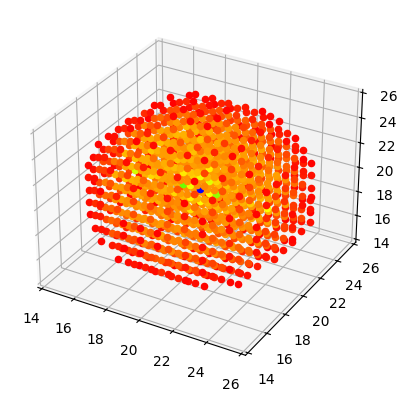

KeyboardInterrupt: 

In [227]:

import numpy as np
import matplotlib.pyplot as plt
import math
from colour import Color
from collections import Counter


def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_grid, y_grid, z_grid)
    # plt.show()
    # ############

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_mask, y_mask, z_mask)
    # plt.show()
    # ###########

    # Rotationsmatrix um die x-Achse
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    rotation_matrix_alpha = np.array([[1, 0, 0],
                                [0, cos_alpha, -sin_alpha],                               
                                [0, sin_alpha, cos_alpha]])


    # Rotationsmatrix um die y-Achse
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix_beta = np.array([[cos_beta, 0, sin_beta],
                                [0, 1, 0],
                                [-sin_beta, 0, cos_beta]])
    
    
    # Rotationsmatrix um die z-Achse
    cos_gamma = np.cos(gamma)
    sin_gamma = np.sin(gamma)
    rotation_matrix_gamma = np.array([[cos_gamma, -sin_gamma, 0],
                                [sin_gamma, cos_gamma, 0],
                                [0, 0, 1]])



    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask



number_of_winkel = 1000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2



indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))
    


dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst)))))

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(14, 26)
ax.set_ylim3d(14, 26)
ax.set_zlim3d(14, 26)

plt.tight_layout()    
plt.show()


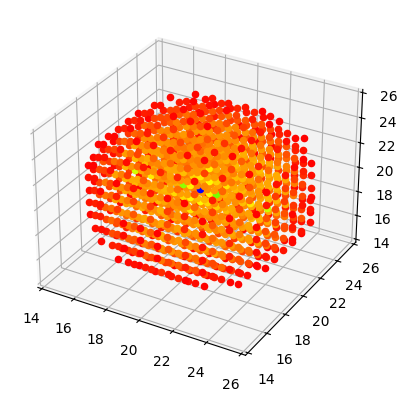

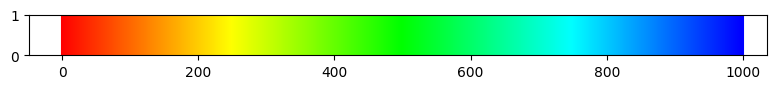

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math
from colour import Color
from collections import Counter


def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_grid, y_grid, z_grid)
    # plt.show()
    # ############

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_mask, y_mask, z_mask)
    # plt.show()
    # ###########

    # Rotationsmatrix um die x-Achse
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    rotation_matrix_alpha = np.array([[1, 0, 0],
                                [0, cos_alpha, -sin_alpha],                               
                                [0, sin_alpha, cos_alpha]])


    # Rotationsmatrix um die y-Achse
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix_beta = np.array([[cos_beta, 0, sin_beta],
                                [0, 1, 0],
                                [-sin_beta, 0, cos_beta]])
    
    
    # Rotationsmatrix um die z-Achse
    cos_gamma = np.cos(gamma)
    sin_gamma = np.sin(gamma)
    rotation_matrix_gamma = np.array([[cos_gamma, -sin_gamma, 0],
                                [sin_gamma, cos_gamma, 0],
                                [0, 0, 1]])



    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask



number_of_winkel = 1000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2



indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))
    


dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst)))))

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(14, 26)
ax.set_ylim3d(14, 26)
ax.set_zlim3d(14, 26)

plt.tight_layout()    
plt.show()


# Test ob Matrixrechnung zeitunterschiede macht

In [ ]:
alpha, beta = 0, 0

# Rotationsmatrix um die x-Achse
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
rotation_matrix_alpha = np.array([[1, 0, 0],
                            [0, cos_alpha, -sin_alpha],                               
                            [0, sin_alpha, cos_alpha]])


# Rotationsmatrix um die y-Achse
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
rotation_matrix_beta = np.array([[cos_beta, 0, sin_beta],
                            [0, 1, 0],
                            [-sin_beta, 0, cos_beta]])

In [ ]:
# beta*alpha
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                            [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                            [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])

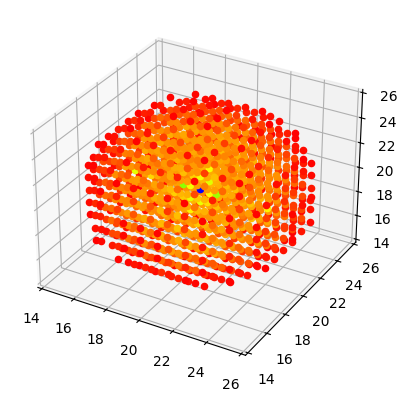

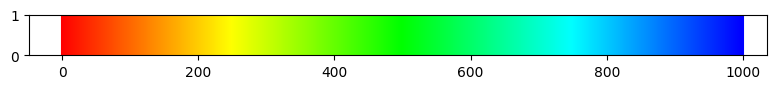

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math
from colour import Color
from collections import Counter


def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask



number_of_winkel = 1000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2



indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))
    


dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst)))))

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(14, 26)
ax.set_ylim3d(14, 26)
ax.set_zlim3d(14, 26)

plt.tight_layout()    
plt.show()


# Test ob np.cos als lambda funktion einen unterschied macht

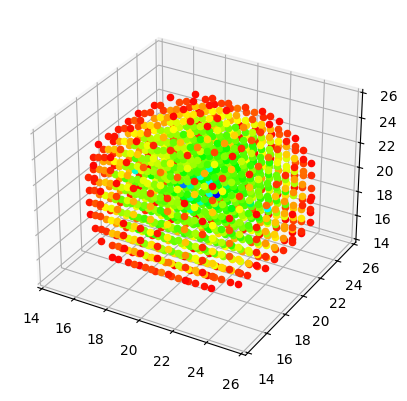

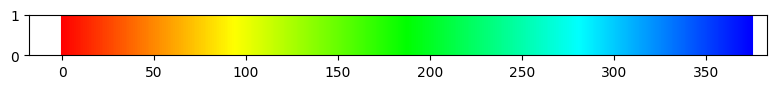

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math
from colour import Color
from collections import Counter


def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_grid, y_grid, z_grid)
    # plt.show()
    # ############

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 < x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_mask, y_mask, z_mask)
    # plt.show()
    # ###########

    # Rotationsmatrix um die x-Achse
    start_time0 = time.time()
    cos_x = lambda x: np.cos(x)
    sin_x = lambda x: np.sin(x)
    rotation_matrix_alpha = np.array([[1, 0, 0],
                                [0, cos_x(alpha), -sin_x(alpha)],                               
                                [0, sin_x(alpha), cos_x(alpha)]])


    # Rotationsmatrix um die y-Achse
    rotation_matrix_beta = np.array([[cos_x(beta), 0, sin_x(beta)],
                                [0, 1, 0],
                                [-sin_x(beta), 0, cos_x(beta)]])
    
    
    
    # Rotationsmatrix um die z-Achse
    cos_gamma = np.cos(gamma)
    sin_gamma = np.sin(gamma)
    rotation_matrix_gamma = np.array([[cos_gamma, -sin_gamma, 0],
                                [sin_gamma, cos_gamma, 0],
                                [0, 0, 1]])



    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)
    duration0 = time.time() - start_time0
    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask



number_of_winkel = 1000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2



indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))
    


dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst)))))

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(14, 26)
ax.set_ylim3d(14, 26)
ax.set_zlim3d(14, 26)

plt.tight_layout()    
plt.show()


In [ ]:
import time
alpha, beta = 2, 2


start_time0 = time.time()
for i in range(100000):
    cos_x = lambda x: np.cos(x)
    sin_x = lambda x: np.sin(x)
    rotation_matrix_alpha = np.array([[1, 0, 0],
                                [0, cos_x(alpha), -sin_x(alpha)],                               
                                [0, sin_x(alpha), cos_x(alpha)]])


    # Rotationsmatrix um die y-Achse
    rotation_matrix_beta = np.array([[cos_x(beta), 0, sin_x(beta)],
                                [0, 1, 0],
                                [-sin_x(beta), 0, cos_x(beta)]])


    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)
duration0 = time.time() - start_time0
print(duration0)


start_time1 = time.time()
for i in range(100000):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])
duration1 = time.time() - start_time1
print(duration1)

start_time2 = time.time()
# Rotationsmatrix um die x-Achse
for i in range(100000):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    rotation_matrix_alpha = np.array([[1, 0, 0],
                                [0, cos_alpha, -sin_alpha],                               
                                [0, sin_alpha, cos_alpha]])


    # Rotationsmatrix um die y-Achse
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix_beta = np.array([[cos_beta, 0, sin_beta],
                                [0, 1, 0],
                                [-sin_beta, 0, cos_beta]])



    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)
duration2 = time.time() - start_time2
print(duration2)

1.1813068389892578
0.4994161128997803
0.7884864807128906


### lambda macht es nicht besser aber das zusammenfassen der Matrix beschleunigt den prozess um einen Faktor 1,5

# kann die Funktion auf die gesamte liste angewandt werden?

In [ ]:
# Vielleicht später mal

# Wie viel schneller ist die np.meshgrid variante als die alte?

In [ ]:
import numpy as np
import math
import time


def indizes_des_Kegels(limit=25, Offset_i=12, Offset_j=12, Offset_k=12, limit_r=7, alpha=0, beta=0):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    
    _Index_lst_im_Kegel =[[i+Offset_i,j+Offset_j,k+Offset_k] 
        for i in range(-limit_r*2 if limit_r*2 < Offset_i else -Offset_i, limit_r*2 if limit_r*2 < limit-Offset_i else limit-Offset_i) 
        for j in range(-limit_r*2 if limit_r*2 < Offset_j else -Offset_j, limit_r*2 if limit_r*2 < limit-Offset_j else limit-Offset_j) 
        for k in range(-limit_r*2 if limit_r*2 < Offset_k else -Offset_k, limit_r*2 if limit_r*2 < limit-Offset_k else limit-Offset_k) 
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) <= limit_r
        if (sin_beta*(cos_alpha*i+sin_alpha*k)+cos_beta*j)**2 + (cos_alpha*k-sin_alpha*i)**2 <= (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j)**2
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) > 0
        ]  
    
    return _Index_lst_im_Kegel

def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask

In [ ]:
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

# Alte Version
start_time1 = time.time()
indizes_des_Kegels_lst = []
for alpha_w, beta_w in zip(lst_winkel_b[0],lst_winkel_a[0]):
    indizes_des_Kegels_lst += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=3, alpha=alpha_w, beta=beta_w))

duration1 = time.time() - start_time1
print(duration1)
# Neue version
start_time2 = time.time()
indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))

duration2 = time.time() - start_time2
print(duration2)

2.0622358322143555
0.2974214553833008


### Die neue version (np.meshgrid) ist deutlich schneller

# Aufteilen der Funktion und Generieren und Rotieren

In [ ]:
def koords_in_kegel_x(range_r = 4):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    cos_alpha = np.cos(alpha.T)
    sin_alpha = np.sin(alpha.T)
    cos_beta = np.cos(beta.T)
    sin_beta = np.sin(beta.T)
    rotation_matrix = np.array([[cos_beta, np.zeros_like(cos_beta), sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask

In [ ]:
x,y,z = koords_in_kegel(range_r=4)
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

indizes_der_Kegel = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

ValueError: shapes (3,3,1000,1) and (3000,97) not aligned: 1 (dim 3) != 3000 (dim 0)

In [ ]:
# Erzeuge 3D-Arrays für x, y und z Koordinaten
rotation_matrix = np.empty((len(alpha), 3, 3))

# Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
rotation_matrix[:, 0, 0] = cos_beta
rotation_matrix[:, 0, 1] = 0
rotation_matrix[:, 0, 2] = sin_beta

rotation_matrix[:, 1, 0] = sin_alpha*sin_beta
rotation_matrix[:, 1, 1] = cos_alpha
rotation_matrix[:, 1, 2] = -sin_alpha*cos_beta

rotation_matrix[:, 2, 0] = -cos_alpha*sin_beta
rotation_matrix[:, 2, 1] = sin_alpha
rotation_matrix[:, 2, 2] = cos_alpha*cos_beta

ValueError: could not broadcast input array from shape (1000,) into shape (1,)

In [ ]:
def koords_in_kegel_x(range_r = 4):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    return result
    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask

In [ ]:

lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

x,y,z = koords_in_kegel(range_r=4)
indizes_der_Kegel = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

### Zeitvergleich

In [ ]:
import numpy as np
import math
import time


def indizes_des_Kegels(limit=25, Offset_i=12, Offset_j=12, Offset_k=12, limit_r=7, alpha=0, beta=0):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    
    _Index_lst_im_Kegel =[[i+Offset_i,j+Offset_j,k+Offset_k] 
        for i in range(-limit_r*2 if limit_r*2 < Offset_i else -Offset_i, limit_r*2 if limit_r*2 < limit-Offset_i else limit-Offset_i) 
        for j in range(-limit_r*2 if limit_r*2 < Offset_j else -Offset_j, limit_r*2 if limit_r*2 < limit-Offset_j else limit-Offset_j) 
        for k in range(-limit_r*2 if limit_r*2 < Offset_k else -Offset_k, limit_r*2 if limit_r*2 < limit-Offset_k else limit-Offset_k) 
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) <= limit_r
        if (sin_beta*(cos_alpha*i+sin_alpha*k)+cos_beta*j)**2 + (cos_alpha*k-sin_alpha*i)**2 <= (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j)**2
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) > 0
        ]  
    
    return _Index_lst_im_Kegel

def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


# "######################################################################################################################################################################################################################################"
"######################################################################################################################################################################################################################################"
"######################################################################################################################################################################################################################################"
"######################################################################################################################################################################################################################################"

In [302]:
number_of_winkel = 1000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

# Alte Version 1
start_time1 = time.time()
indizes_des_Kegels_lst1 = []
for alpha_w, beta_w in zip(lst_winkel_b[0],lst_winkel_a[0]):
    indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=3, alpha=alpha_w, beta=beta_w))

duration1 = time.time() - start_time1
print(duration1)
# Alte Version 2
start_time2 = time.time()
indizes_des_Kegels_lst2 = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst2 =  np.hstack((indizes_des_Kegels_lst2, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))

duration2 = time.time() - start_time2
print(duration2)

# Neue Version 3
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=4)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print(duration2)

2.0526673793792725
0.292708158493042
0.00403285026550293


In [ ]:
x,y,z = koords_in_kegel_x(range_r=4)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

In [ ]:
number_of_winkel = 1000000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=4)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print(duration2)

3.7688655853271484


## Die Neue version kann DEUTLICH schneller die winkelliste ablaufen

In [233]:
import numpy as np
import math
import time

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 10000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)

In [234]:
test = np.rint(np.array([indizes_des_Kegels_lst1[:,:,i] for i in range(len(indizes_des_Kegels_lst1[0,0,:]))]))

dict_duplicates = {}
for i in test:
    for j in i:
        if dict_duplicates.get(str(j)) == None:
            dict_duplicates.update({str(j):1})
        else:
            dict_duplicates[str(j)] += 1

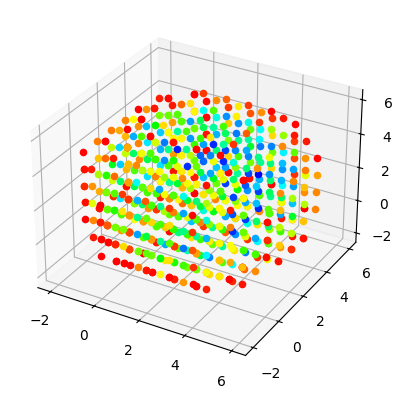

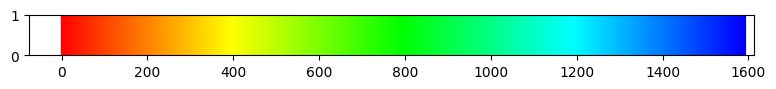

In [4]:
import numpy as np
import math
import time

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 10000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)

test = np.rint(np.array([indizes_des_Kegels_lst1[:,:,i] for i in range(len(indizes_des_Kegels_lst1[0,0,:]))]))

dict_duplicates = {}
for i in test:
    for j in i:
        if dict_duplicates.get(str(j)) == None:
            dict_duplicates.update({str(j):1})
        else:
            dict_duplicates[str(j)] += 1


sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_, rest = list(i.split("[")[1].split("."))
    x, y, z = float(x_str), float(y_str), float(z_str_.split("]")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))


plt.tight_layout()    
plt.show()

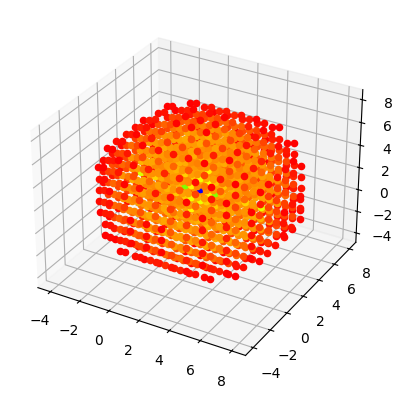

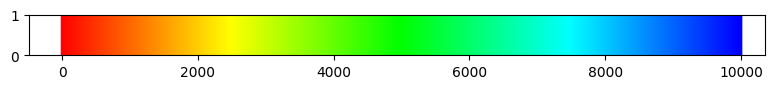

In [ ]:
indizes_des_Kegels_lst2 = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst2 =  np.hstack((indizes_des_Kegels_lst2, np.array(koords_in_kegel(2, 2, 2, range_r = 4, alpha = alpha_w, beta = beta_w))))

dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst2)))))

sorted_dict_duplicates1 = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates1[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates1[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))


plt.tight_layout() 
plt.show()

In [261]:
dict(sorted_dict_duplicates1).keys()

dict_keys([(6.0, -1.0, 6.0), (-2.0, -2.0, -1.0), (-2.0, 6.0, -1.0), (-2.0, 5.0, 6.0), (6.0, -2.0, 5.0), (5.0, -2.0, -2.0), (-2.0, -2.0, 5.0), (-2.0, -1.0, -2.0), (6.0, -1.0, -2.0), (6.0, 6.0, 5.0), (-1.0, 6.0, 6.0), (5.0, 6.0, -2.0), (-2.0, 6.0, 5.0), (5.0, -2.0, 6.0), (-1.0, -2.0, 6.0), (6.0, 5.0, -2.0), (-1.0, 6.0, -2.0), (6.0, 6.0, -1.0), (5.0, 6.0, 6.0), (-2.0, -1.0, 6.0), (-2.0, 5.0, -2.0), (6.0, -2.0, -1.0), (-1.0, -2.0, -2.0), (7.0, 4.0, 5.0), (-3.0, -1.0, 0.0), (7.0, 0.0, -1.0), (7.0, 5.0, 0.0), (-3.0, 5.0, 4.0), (-3.0, -1.0, 4.0), (7.0, 4.0, -1.0), (-3.0, 4.0, -1.0), (7.0, -1.0, 4.0), (-3.0, 0.0, 5.0), (7.0, -1.0, 0.0), (-3.0, 5.0, 0.0), (3.0, 1.0, 8.0), (-3.0, 4.0, 5.0), (-3.0, 0.0, -1.0), (7.0, 0.0, 5.0), (3.0, 8.0, 3.0), (7.0, 5.0, 4.0), (5.0, -3.0, -0.0), (3.0, -4.0, 1.0), (4.0, 7.0, 5.0), (0.0, -1.0, -3.0), (1.0, 3.0, 8.0), (4.0, 5.0, -3.0), (0.0, -3.0, 5.0), (3.0, 3.0, 8.0), (-1.0, 7.0, 0.0), (1.0, 1.0, 8.0), (5.0, 4.0, 7.0), (0.0, 7.0, -1.0), (3.0, 3.0, -4.0), (5.0, 4.0

In [260]:
dict(sorted_dict_duplicates).keys()

dict_keys(['[ 6. -1.  6.]', '[-2. -1.  6.]', '[-1. -2. -2.]', '[6. 6. 5.]', '[ 7. -0. -1.]', '[5. 6. 6.]', '[ 5. -0.  7.]', '[-2.  6.  5.]', '[-2.  5.  6.]', '[-1.  6.  6.]', '[-3. -0. -1.]', '[-3.  5. -0.]', '[-1.  6. -2.]', '[ 7. -0.  5.]', '[ 6. -2. -1.]', '[-0.  5. -3.]', '[-2. -1. -2.]', '[-1.  7. -0.]', '[ 7. -1. -0.]', '[ 5.  6. -2.]', '[ 7.  5. -0.]', '[ 6. -1. -2.]', '[-2.  6. -1.]', '[-2. -2.  5.]', '[-0.  7. -1.]', '[-0.  7.  5.]', '[ 6. -2.  5.]', '[ 5. -3. -0.]', '[ 5. -0. -3.]', '[-1. -0. -3.]', '[-3. -1. -0.]', '[-2. -2. -1.]', '[ 6.  6. -1.]', '[ 5. -2. -2.]', '[ 5. -2.  6.]', '[-1. -2.  6.]', '[-0. -1. -3.]', '[-0.  5.  7.]', '[-1. -0.  7.]', '[ 6.  5. -2.]', '[-0. -1.  7.]', '[-0. -3.  5.]', '[-1. -3. -0.]', '[-3. -0.  5.]', '[ 5.  7. -0.]', '[7. 0. 5.]', '[-0. -3. -1.]', '[-3.  0. -1.]', '[-3.  4.  5.]', '[7. 5. 0.]', '[ 7. -1.  4.]', '[-3.  5.  0.]', '[-3. -1.  0.]', '[ 7. -1.  0.]', '[-3. -0. -0.]', '[-3.  5.  4.]', '[ 7. -0. -0.]', '[-3.  0.  5.]', '[7. 4. 5.]', '

False

# Vergleich der 2. und 3. Version

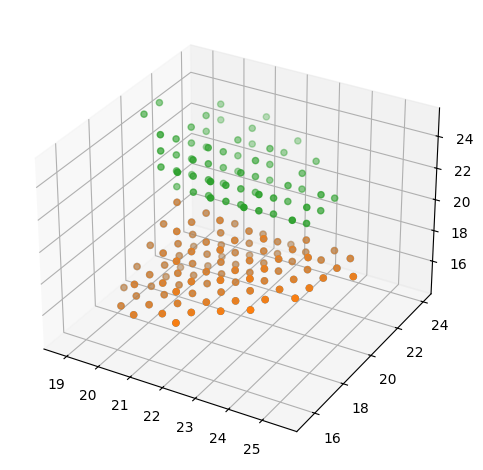

In [288]:
import numpy as np
import math
import matplotlib.pyplot as plt

def indizes_des_Kegels(limit=25, Offset_i=12, Offset_j=12, Offset_k=12, limit_r=7, alpha=0, beta=0):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    
    _Index_lst_im_Kegel =[[i+Offset_i,j+Offset_j,k+Offset_k] 
        for i in range(-limit_r*2 if limit_r*2 < Offset_i else -Offset_i, limit_r*2 if limit_r*2 < limit-Offset_i else limit-Offset_i) 
        for j in range(-limit_r*2 if limit_r*2 < Offset_j else -Offset_j, limit_r*2 if limit_r*2 < limit-Offset_j else limit-Offset_j) 
        for k in range(-limit_r*2 if limit_r*2 < Offset_k else -Offset_k, limit_r*2 if limit_r*2 < limit-Offset_k else limit-Offset_k) 
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) <= limit_r
        if (sin_beta*(cos_alpha*i+sin_alpha*k)+cos_beta*j)**2 + (cos_alpha*k-sin_alpha*i)**2 <= (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j)**2
        if (cos_beta*(cos_alpha*i+sin_alpha*k)-sin_beta*j) > 0
        ]  
    
    return _Index_lst_im_Kegel

def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = 0, beta = 0, gamma = 0 ):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # Rotation zuerst um die y-Achse und anschließend um die x-Achse
    # beta*alpha
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                                [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],
                                [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 1
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         20, 20, 20,
                                         lst_winkel_a, lst_winkel_b)

indizes_des_Kegels_lst2 = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst2 =  np.hstack((indizes_des_Kegels_lst2, np.array(koords_in_kegel(20, 20, 20, range_r = 4, alpha = alpha_w, beta = beta_w))))
    indizes_des_Kegels_lst3 = np.array(indizes_des_Kegels(40, 20, 20, 20, 4, alpha = beta_w, beta = alpha_w))



fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

ax.scatter(indizes_des_Kegels_lst1[0,0,:],indizes_des_Kegels_lst1[0,1,:],indizes_des_Kegels_lst1[0,2,:])
ax.scatter(indizes_des_Kegels_lst2[0],indizes_des_Kegels_lst2[1],indizes_des_Kegels_lst2[2])
xs1, ys1, zs1 = [list(x) for x in zip(*indizes_des_Kegels_lst3)]
ax.scatter(xs1, ys1, zs1)
plt.tight_layout()    
plt.show()

In [298]:
x0,y0,z0 = indizes_des_Kegels_lst1[0,0,:],indizes_des_Kegels_lst1[0,1,:],indizes_des_Kegels_lst1[0,2,:]
x1,y1,z1 = indizes_des_Kegels_lst2[0],indizes_des_Kegels_lst2[1],indizes_des_Kegels_lst2[2]


In [299]:
x0 == x1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [300]:
y0 == y1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [301]:
z0 == z1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

### Die 2. Version ist identisch im ergebnis zur neuen Version

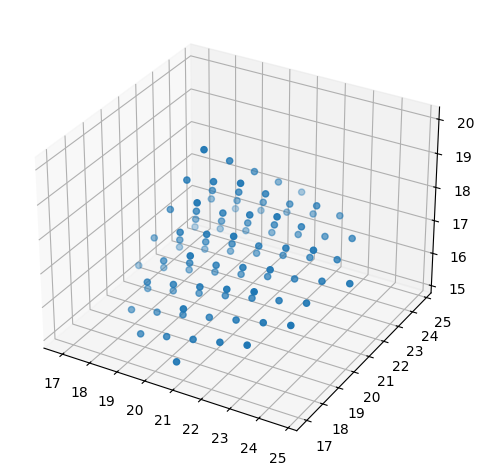

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 <= x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result

def main():
    number_of_winkel = 1
    lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
    lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2


    kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

    indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                            20, 20, 20,
                                            lst_winkel_a, lst_winkel_b)


    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    ax.scatter(indizes_des_Kegels_lst1[0,0,:],indizes_des_Kegels_lst1[0,1,:],indizes_des_Kegels_lst1[0,2,:])

    plt.tight_layout()    
    plt.show()

if __name__ == "__main__":
    main()

In [3]:
from Test import *

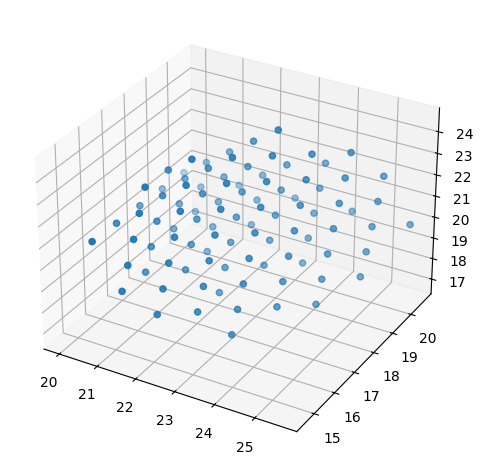

In [5]:
number_of_winkel = 1
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        20, 20, 20,
                                        lst_winkel_a, lst_winkel_b)


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

ax.scatter(indizes_des_Kegels_lst1[0,0,:],indizes_des_Kegels_lst1[0,1,:],indizes_des_Kegels_lst1[0,2,:])

plt.tight_layout()    
plt.show()

# Die Singulatriäten sind ein Problem der Befungungen für den Kegel:
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)

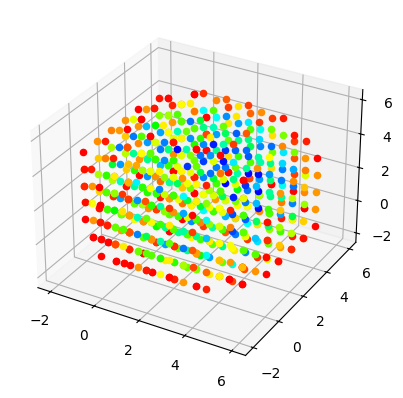

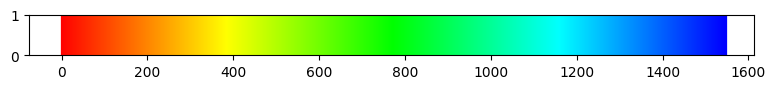

In [8]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 10000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)

test = np.rint(np.array([indizes_des_Kegels_lst1[:,:,i] for i in range(len(indizes_des_Kegels_lst1[0,0,:]))]))

dict_duplicates = {}
for i in test:
    for j in i:
        if dict_duplicates.get(str(j)) == None:
            dict_duplicates.update({str(j):1})
        else:
            dict_duplicates[str(j)] += 1


sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_, rest = list(i.split("[")[1].split("."))
    x, y, z = float(x_str), float(y_str), float(z_str_.split("]")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))


plt.tight_layout()    
plt.show()

# Überarbeiten des Dictionary aufbaus

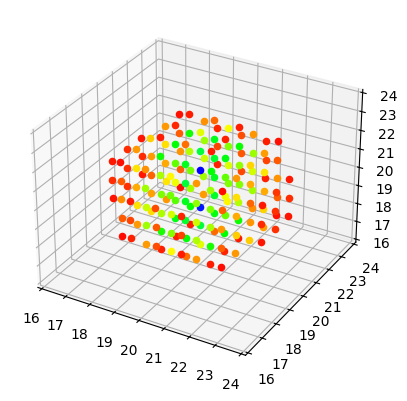

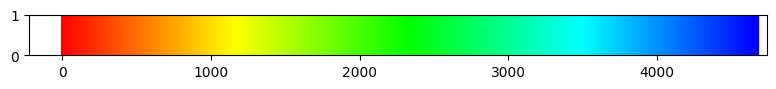

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import math
from colour import Color
from collections import Counter


def koords_in_kegel(x_koord = 0, y_koord = 0, z_koord = 0, alpha = 0, beta = 0 , range_r = 4):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    # y = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # z = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_grid, y_grid, z_grid)
    # plt.show()
    # ############

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) <= x_grid**2) & (0 < x_grid) & (range_r >= x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    # ############ Scatter Plot
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(x_mask, y_mask, z_mask)
    # plt.show()
    # ###########

    # Rotationsmatrix um die z-Achse
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    rotation_matrix_alpha = np.array([[cos_alpha, -sin_alpha, 0],
                                [sin_alpha, cos_alpha, 0],
                                [0, 0, 1]])


    # Rotationsmatrix um die y-Achse
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    rotation_matrix_beta = np.array([[cos_beta, 0, sin_beta],
                                [0, 1, 0],
                                [-sin_beta, 0, cos_beta]])


    rotation_matrix = np.matmul(rotation_matrix_alpha, rotation_matrix_beta)

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    x_rotated, y_rotated, z_rotated = np.dot(rotation_matrix, np.vstack([x_mask.flatten(), y_mask.flatten(), z_mask.flatten()]))

    # Setze die neuen x- und y-Koordinaten in das Gitter
    x_mask = x_rotated.reshape(x_mask.shape) + x_koord
    y_mask = y_rotated.reshape(y_mask.shape) + y_koord
    z_mask = z_rotated.reshape(z_mask.shape) + z_koord
    return x_mask, y_mask, z_mask



number_of_winkel = 10000
lst_winkel_a = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_b = np.random.rand(1,number_of_winkel)*math.pi*2


indizes_des_Kegels_lst = np.array([[],[],[]])
for alpha_w, beta_w in zip(lst_winkel_a[0],lst_winkel_b[0]):
    indizes_des_Kegels_lst =  np.hstack((indizes_des_Kegels_lst, np.array(koords_in_kegel(20, 20, 20, range_r = 2, alpha = alpha_w, beta = beta_w))))
    


dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst)))))

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])


fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(16, 24)
ax.set_ylim3d(16, 24)
ax.set_zlim3d(16, 24)

plt.tight_layout()    
plt.show()


In [12]:
indizes_des_Kegels_lst

array([[18.48679173, 19.24339586, 18.14193777, ..., 20.2767718 ,
        19.50842753, 19.77046679],
       [22.37399887, 21.18699944, 21.4254957 , ..., 21.32211403,
        20.87100424, 22.18446851],
       [20.27263542, 20.13631771, 19.28197024, ..., 21.78196853,
        22.23600271, 21.78196853]])

In [44]:
len(indizes_des_Kegels_lst1[0,0,:])

35

In [43]:
i[0]

array([1.91883118, 2.8753188 , 3.83180641, 4.78829403, 1.62705825,
       2.58354587, 3.54003348, 0.96234357, 1.91883118, 2.8753188 ,
       3.83180641, 4.78829403, 2.29177293, 1.62705825, 2.58354587,
       3.54003348, 0.96234357, 1.91883118, 2.8753188 , 3.83180641,
       4.78829403, 1.62705825, 2.58354587, 3.54003348, 0.96234357,
       1.91883118, 2.8753188 , 3.83180641, 4.78829403, 0.96234357,
       1.91883118, 2.8753188 , 3.83180641, 4.78829403])

In [60]:
indizes_des_Kegels_lst1[:,:,0]

array([ 2.12887225,  4.0187596 , -1.59277074])

In [57]:
indizes_des_Kegels_lst2 =  indizes_des_Kegels_lst1[:,:,0]
for i in range(1,len(indizes_des_Kegels_lst1[0,0,:])):
    print(i)
    indizes_des_Kegels_lst2 =  np.hstack((indizes_des_Kegels_lst2, indizes_des_Kegels_lst1[:,:,i]))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [91]:
dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,0].T)))))
for i in range(1,len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

In [92]:
sorted_dict_duplicates

[((4.0, 6.0, 0.0), 1),
 ((0.0, -2.0, 0.0), 1),
 ((4.0, -2.0, 4.0), 1),
 ((0.0, 4.0, -2.0), 1),
 ((-2.0, 4.0, 4.0), 1),
 ((-2.0, 0.0, 4.0), 1),
 ((-2.0, 4.0, 0.0), 1),
 ((5.0, -0.0, 3.0), 1),
 ('(6.0, 0.0, 0.0)', 1),
 ('(0.0, 0.0, -2.0)', 1),
 ('(-2.0, 0.0, 4.0)', 1),
 ('(0.0, 0.0, 6.0)', 1),
 ('(4.0, 6.0, 0.0)', 1),
 ((-2.0, 0.0, 0.0), 2),
 ((5.0, 0.0, 5.0), 2),
 ((5.0, 0.0, -1.0), 2),
 ((0.0, -2.0, 4.0), 2),
 ('(0.0, -2.0, 0.0)', 2),
 ('(-2.0, 4.0, 0.0)', 2),
 ((5.0, 5.0, 3.0), 3),
 ((4.0, 4.0, -0.0), 3),
 ((5.0, -1.0, 4.0), 3),
 ((5.0, 5.0, 4.0), 3),
 ((5.0, 5.0, 0.0), 3),
 ((5.0, -1.0, 3.0), 3),
 ('(6.0, 4.0, 0.0)', 3),
 ('(4.0, 0.0, 6.0)', 3),
 ('(6.0, 4.0, 4.0)', 3),
 ((4.0, -0.0, -0.0), 4),
 ((4.0, -1.0, 5.0), 4),
 ((4.0, 4.0, 4.0), 4),
 ((5.0, -1.0, 0.0), 4),
 ((5.0, -0.0, 4.0), 4),
 ((5.0, 1.0, 5.0), 4),
 ((5.0, 2.0, 5.0), 5),
 ((4.0, -1.0, -1.0), 5),
 ((5.0, 4.0, -1.0), 5),
 ((5.0, 4.0, 4.0), 5),
 ((5.0, 3.0, 5.0), 6),
 ((5.0, 0.0, -0.0), 6),
 ((5.0, -1.0, 1.0), 6),
 ((5.0, 5.

### Erste version

In [ ]:
dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,0].T)))))
for i in range(1,len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

In [93]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 10000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)

In [94]:

dict_duplicates = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,0].T)))))
for i in range(1,len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])



In [95]:


test = np.rint(np.array([indizes_des_Kegels_lst1[:,:,i] for i in range(len(indizes_des_Kegels_lst1[0,0,:]))]))
dict_duplicates1 = {}
for i in test:
    for j in i:
        if dict_duplicates1.get(str(j)) == None:
            dict_duplicates1.update({str(j):1})
        else:
            dict_duplicates1[str(j)] += 1


sorted_dict_duplicates1 = sorted(dict_duplicates1.items(), key = lambda x:x[1])


In [96]:
sorted_dict_duplicates == sorted_dict_duplicates1

False

In [97]:
sorted_dict_duplicates

[((-2.0, 0.0, 0.0), 1),
 ((-2.0, 4.0, 0.0), 1),
 ((4.0, -2.0, 4.0), 1),
 ((0.0, 6.0, 4.0), 1),
 ('(4.0, 0.0, -2.0)', 1),
 ('(6.0, 0.0, 4.0)', 1),
 ('(4.0, 4.0, 6.0)', 1),
 ('(6.0, 4.0, 4.0)', 1),
 ('(-2.0, 0.0, 0.0)', 1),
 ('(0.0, 6.0, 0.0)', 1),
 ('(-2.0, 4.0, 4.0)', 1),
 ('(0.0, 4.0, 6.0)', 1),
 ((4.0, 4.0, 4.0), 2),
 ((5.0, -1.0, 0.0), 2),
 ((4.0, 4.0, -0.0), 2),
 ('(6.0, 0.0, 0.0)', 2),
 ('(5.0, -1.0, -0.0)', 2),
 ((5.0, 5.0, 4.0), 3),
 ((-2.0, 0.0, 4.0), 3),
 ((5.0, 4.0, 5.0), 3),
 ((5.0, 4.0, -1.0), 3),
 ((5.0, 5.0, 0.0), 3),
 ((4.0, -0.0, 4.0), 3),
 ((5.0, -0.0, -0.0), 3),
 ('(6.0, 4.0, 0.0)', 3),
 ((5.0, -1.0, 2.0), 4),
 ((5.0, 4.0, 4.0), 4),
 ((4.0, -1.0, -1.0), 4),
 ((4.0, 5.0, 5.0), 4),
 ((-0.0, -0.0, 4.0), 4),
 ((5.0, -1.0, 1.0), 4),
 ((5.0, 0.0, 5.0), 4),
 ((5.0, 2.0, 5.0), 4),
 ((5.0, 0.0, 4.0), 4),
 ((5.0, 2.0, -1.0), 5),
 ((5.0, 1.0, 5.0), 5),
 ((5.0, 4.0, -0.0), 5),
 ((5.0, 5.0, 1.0), 5),
 ('(-1.0, -0.0, 4.0)', 5),
 ((4.0, 5.0, -1.0), 6),
 ((5.0, 0.0, -1.0), 6),
 ((4.0

In [99]:
sorted_dict_duplicates1

[('[-2.  4.  0.]', 1),
 ('[-0. -1. -1.]', 1),
 ('[ 4. -2.  4.]', 1),
 ('[0. 6. 4.]', 1),
 ('[ 4.  0. -2.]', 1),
 ('[6. 0. 4.]', 1),
 ('[4. 4. 6.]', 1),
 ('[6. 4. 4.]', 1),
 ('[0. 6. 0.]', 1),
 ('[-2.  4.  4.]', 1),
 ('[0. 4. 6.]', 1),
 ('[ 5. -0.  5.]', 1),
 ('[-0.  5. -1.]', 2),
 ('[-1.  5. -0.]', 2),
 ('[-0.  5.  5.]', 2),
 ('[-2.  0.  0.]', 2),
 ('[-0. -1.  5.]', 2),
 ('[-0.  6.  3.]', 2),
 ('[ 5.  5. -0.]', 2),
 ('[6. 0. 0.]', 2),
 ('[ 1. -0. -2.]', 2),
 ('[ 1. -0.  6.]', 3),
 ('[-2.  0.  4.]', 3),
 ('[-1. -0.  5.]', 3),
 ('[-1. -0. -1.]', 3),
 ('[6. 4. 0.]', 3),
 ('[ 5. -0. -1.]', 3),
 ('[ 5. -1. -0.]', 3),
 ('[-0.  1. -2.]', 4),
 ('[-0. -2.  3.]', 4),
 ('[ 1. -2. -0.]', 4),
 ('[ 3.  6. -0.]', 4),
 ('[ 3. -2. -0.]', 4),
 ('[-0. -2.  1.]', 6),
 ('[-0.  3. -2.]', 6),
 ('[-0.  3.  6.]', 6),
 ('[ 3. -0.  6.]', 7),
 ('[ 1.  6. -0.]', 7),
 ('[-0.  1.  6.]', 7),
 ('[ 3. -0. -2.]', 8),
 ('[-0.  6.  1.]', 8),
 ('[ 6. -0.  1.]', 10),
 ('[ 6.  3. -0.]', 10),
 ('[-2.  3. -0.]', 12),
 ('[ 6. -

AttributeError: 'tuple' object has no attribute 'split'

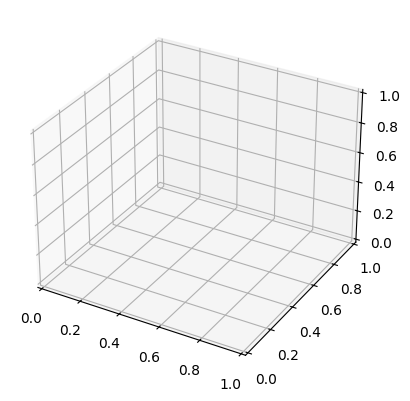

In [100]:

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_, rest = list(i.split("[")[1].split("."))
    x, y, z = float(x_str), float(y_str), float(z_str_.split("]")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))


plt.tight_layout()    
plt.show()

In [104]:
[*dict_duplicates.keys()][0][0]

2.0

(2.0, 3.0, -2.0)
(-1.0, 0.0, 1.0)
(1.0, 1.0, 6.0)
(1.0, -2.0, 2.0)
(-2.0, 2.0, -0.0)
(3.0, 4.0, 5.0)
(2.0, 5.0, 4.0)
(-1.0, 0.0, -1.0)
(-2.0, 2.0, 4.0)
(-2.0, 0.0, 1.0)
(3.0, 6.0, 3.0)
(-1.0, -0.0, 2.0)
(-1.0, 1.0, 4.0)
(2.0, -2.0, 1.0)
(-0.0, 5.0, 2.0)
(2.0, 6.0, 0.0)
(4.0, 5.0, -0.0)
(1.0, 5.0, -0.0)
(-1.0, -1.0, 2.0)
(1.0, 6.0, 2.0)
(1.0, -1.0, -1.0)
(-0.0, 5.0, 0.0)
(-1.0, -1.0, 3.0)
(-1.0, 3.0, -1.0)
(-1.0, 4.0, 3.0)
(-0.0, -1.0, 0.0)
(1.0, 5.0, 5.0)
(-1.0, 5.0, 3.0)
(3.0, 2.0, -2.0)
(1.0, -2.0, 1.0)
(4.0, 4.0, -1.0)
(3.0, -2.0, 1.0)
(2.0, 1.0, 6.0)
(1.0, 3.0, 6.0)
(-2.0, 3.0, 4.0)
(-1.0, -1.0, 1.0)
(-0.0, -1.0, 4.0)
(1.0, -2.0, 4.0)
(-1.0, -0.0, -0.0)
(1.0, 4.0, -1.0)
(-1.0, 1.0, -0.0)
(-2.0, 1.0, 4.0)
(-1.0, 2.0, -1.0)
(0.0, -2.0, 3.0)
(-1.0, 0.0, 3.0)
(3.0, 0.0, -2.0)
(-1.0, 1.0, 5.0)
(2.0, 3.0, 6.0)
(2.0, -1.0, 5.0)
(3.0, 5.0, 5.0)
(2.0, -2.0, 2.0)
(4.0, -2.0, 1.0)
(-1.0, 4.0, -0.0)
(-1.0, 0.0, 4.0)
(0.0, 2.0, -2.0)
(-2.0, 4.0, 3.0)
(2.0, -2.0, -0.0)
(-1.0, 2.0, 4.0)
(-1.0, 3.

ValueError: could not convert string to float: '('

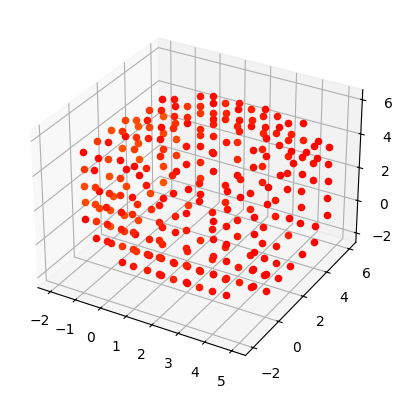

In [105]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))

for count, i in enumerate([*dict_duplicates.keys()]):
    print(i)
    x, y, z = float(i[0]), float(i[1]), float(i[2])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
    
    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(8, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(16, 24)
ax.set_ylim3d(16, 24)
ax.set_zlim3d(16, 24)

plt.tight_layout()    
plt.show()

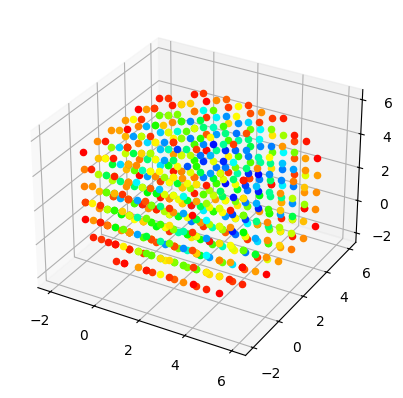

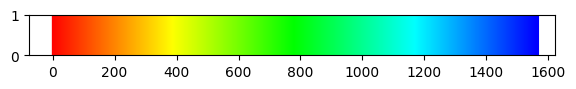

In [153]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 10000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)


dict_duplicates = dict()
for i in range(len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

# ax.set_xlim3d(16, 24)
# ax.set_ylim3d(16, 24)
# ax.set_zlim3d(16, 24)

plt.tight_layout()    
plt.show()


In [147]:
for count, i in enumerate([*dict_duplicates.keys()]):
    print(count, i, [j for j in i if j.isdigit()])
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


0 (-1.0, 3.0, 4.0) ['1', '0', '3', '0', '4', '0']
1 (-1.0, 4.0, 4.0) ['1', '0', '4', '0', '4', '0']
2 (2.0, 0.0, 6.0) ['2', '0', '0', '0', '6', '0']
3 (4.0, -1.0, 3.0) ['4', '0', '1', '0', '3', '0']
4 (-0.0, -1.0, 1.0) ['0', '0', '1', '0', '1', '0']
5 (0.0, 5.0, -0.0) ['0', '0', '5', '0', '0', '0']
6 (3.0, 5.0, -0.0) ['3', '0', '5', '0', '0', '0']
7 (0.0, -1.0, 5.0) ['0', '0', '1', '0', '5', '0']
8 (4.0, 2.0, -2.0) ['4', '0', '2', '0', '2', '0']
9 (3.0, 2.0, -2.0) ['3', '0', '2', '0', '2', '0']
10 (1.0, 6.0, 4.0) ['1', '0', '6', '0', '4', '0']
11 (-1.0, 4.0, 1.0) ['1', '0', '4', '0', '1', '0']
12 (1.0, 4.0, -1.0) ['1', '0', '4', '0', '1', '0']
13 (1.0, -1.0, 4.0) ['1', '0', '1', '0', '4', '0']
14 (1.0, -2.0, 3.0) ['1', '0', '2', '0', '3', '0']
15 (1.0, -1.0, -1.0) ['1', '0', '1', '0', '1', '0']
16 (3.0, -0.0, 5.0) ['3', '0', '0', '0', '5', '0']
17 (-1.0, -0.0, 2.0) ['1', '0', '0', '0', '2', '0']
18 (0.0, 6.0, 1.0) ['0', '0', '6', '0', '1', '0']
19 (-0.0, 1.0, -1.0) ['0', '0', '1', '0',

### Auch die Generaion des Plost ist nun ausreichend schnell

# Ist die aktuelle Verteilung wirklich Gleichverteilt?

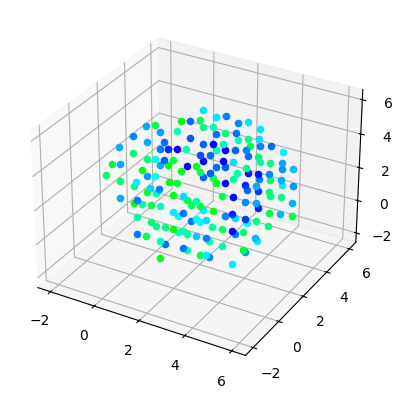

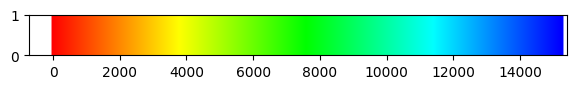

In [160]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result


number_of_winkel = 100000
lst_winkel_b = np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
lst_winkel_a = np.random.rand(1,number_of_winkel)*math.pi*2

start_time2 = time.time()

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                         2, 2, 2,
                                         lst_winkel_a, lst_winkel_b)


dict_duplicates = dict()
for i in range(len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


for count, i in enumerate([*dict_duplicates.keys()]):
    if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
        x_str, y_str, z_str_= (i.strip("()").split(","))
        x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

# ax.set_xlim3d(16, 24)
# ax.set_ylim3d(16, 24)
# ax.set_zlim3d(16, 24)


plt.tight_layout()    
plt.show()


In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter
import random

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result

# Random Seed für bessrere Zufallszahlen?

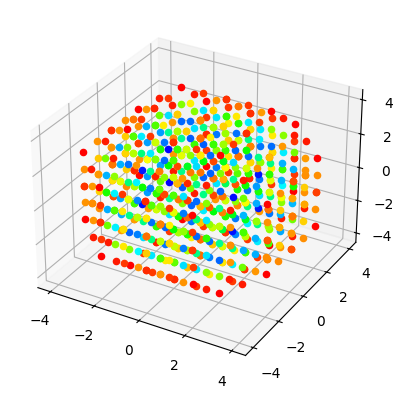

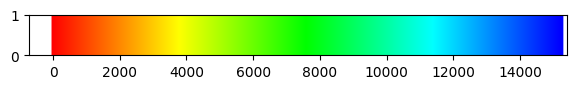

In [4]:
dict_duplicates = dict()

for i in range(10):
    number_of_winkel = 10000
    rng = np.random.default_rng(random.randint(100000,10000000000))

    lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1).T))
    lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1).T*math.pi*2
    #np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
    #np.random.rand(1,number_of_winkel)*math.pi*2
    start_time2 = time.time()

    kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

    indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                            0,0,0,
                                            lst_winkel_a, lst_winkel_b)



    for i in range(len(indizes_des_Kegels_lst1[0,0,:])):
        temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
        for key, value in temp_dict.items():
            if dict_duplicates.get(str(key)) == None:
                dict_duplicates.update({str(key):value})
            else:
                dict_duplicates[str(key)] += value
    
sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

# ax.set_xlim3d(16, 24)
# ax.set_ylim3d(16, 24)
# ax.set_zlim3d(16, 24)

plt.tight_layout()    
plt.show()

In [214]:
sorted_dict_duplicates

[('(2.0, 2.0, 4.0)', 53),
 ('(-2.0, -4.0, -2.0)', 61),
 ('(2.0, 4.0, 2.0)', 63),
 ('(-2.0, 2.0, -4.0)', 65),
 ('(2.0, 4.0, -2.0)', 65),
 ('(2.0, -4.0, -2.0)', 66),
 ('(2.0, -2.0, -4.0)', 67),
 ('(-2.0, 4.0, 2.0)', 67),
 ('(2.0, -4.0, 2.0)', 68),
 ('(-2.0, -2.0, 4.0)', 72),
 ('(-2.0, -4.0, 2.0)', 73),
 ('(-2.0, -2.0, -4.0)', 73),
 ('(2.0, -2.0, 4.0)', 74),
 ('(-2.0, 4.0, -2.0)', 76),
 ('(2.0, 2.0, -4.0)', 78),
 ('(-2.0, 2.0, 4.0)', 85),
 ('(-4.0, -2.0, 2.0)', 172),
 ('(4.0, 2.0, -2.0)', 192),
 ('(-4.0, -2.0, -2.0)', 200),
 ('(-4.0, 2.0, 2.0)', 201),
 ('(-4.0, 2.0, -2.0)', 203),
 ('(4.0, 2.0, 2.0)', 208),
 ('(4.0, -2.0, -2.0)', 213),
 ('(4.0, -2.0, 2.0)', 221),
 ('(-3.0, -3.0, -2.0)', 3734),
 ('(-2.0, -3.0, 3.0)', 3738),
 ('(3.0, 3.0, -2.0)', 3793),
 ('(-3.0, 3.0, -2.0)', 3800),
 ('(-2.0, 3.0, 3.0)', 3805),
 ('(-3.0, -3.0, 2.0)', 3813),
 ('(2.0, 3.0, 3.0)', 3826),
 ('(-3.0, 2.0, -3.0)', 3830),
 ('(-3.0, -2.0, -3.0)', 3851),
 ('(2.0, -3.0, -3.0)', 3864),
 ('(3.0, 2.0, 3.0)', 3888),
 ('(3.

In [220]:
sorted_dict_duplicates

[('(2.0, 2.0, -4.0)', 5),
 ('(-2.0, 4.0, -2.0)', 5),
 ('(-2.0, -2.0, -4.0)', 6),
 ('(-2.0, 2.0, 4.0)', 6),
 ('(2.0, 4.0, 2.0)', 6),
 ('(2.0, -4.0, 2.0)', 6),
 ('(-2.0, -4.0, -2.0)', 6),
 ('(-2.0, -4.0, 2.0)', 6),
 ('(2.0, -4.0, -2.0)', 7),
 ('(-2.0, -2.0, 4.0)', 7),
 ('(2.0, 2.0, 4.0)', 7),
 ('(-2.0, 4.0, 2.0)', 7),
 ('(2.0, -2.0, 4.0)', 8),
 ('(2.0, 4.0, -2.0)', 8),
 ('(-2.0, 2.0, -4.0)', 9),
 ('(4.0, -2.0, -2.0)', 9),
 ('(2.0, -2.0, -4.0)', 11),
 ('(-4.0, 2.0, 2.0)', 18),
 ('(-4.0, -2.0, 2.0)', 19),
 ('(4.0, 2.0, -2.0)', 24),
 ('(-4.0, 2.0, -2.0)', 25),
 ('(-4.0, -2.0, -2.0)', 26),
 ('(4.0, -2.0, 2.0)', 28),
 ('(4.0, 2.0, 2.0)', 28),
 ('(-2.0, -3.0, 3.0)', 360),
 ('(-2.0, 3.0, -3.0)', 364),
 ('(2.0, 3.0, 3.0)', 367),
 ('(3.0, 3.0, 2.0)', 374),
 ('(-2.0, -3.0, -3.0)', 375),
 ('(-3.0, -3.0, 2.0)', 378),
 ('(3.0, -2.0, -3.0)', 380),
 ('(-3.0, 2.0, -3.0)', 383),
 ('(3.0, -2.0, 3.0)', 383),
 ('(-3.0, 2.0, 3.0)', 383),
 ('(-3.0, 3.0, -2.0)', 384),
 ('(3.0, -3.0, -2.0)', 385),
 ('(3.0, 2.0,

In [223]:
sorted_dict_duplicates

[('(-2.0, -2.0, -4.0)', 3),
 ('(2.0, -4.0, -2.0)', 4),
 ('(2.0, -4.0, 2.0)', 5),
 ('(-2.0, 4.0, -2.0)', 5),
 ('(2.0, 4.0, 2.0)', 6),
 ('(-2.0, 2.0, 4.0)', 6),
 ('(-2.0, 4.0, 2.0)', 7),
 ('(2.0, -2.0, 4.0)', 7),
 ('(-2.0, -2.0, 4.0)', 8),
 ('(-2.0, -4.0, -2.0)', 8),
 ('(2.0, 2.0, 4.0)', 8),
 ('(2.0, 4.0, -2.0)', 9),
 ('(-2.0, -4.0, 2.0)', 9),
 ('(2.0, -2.0, -4.0)', 10),
 ('(2.0, 2.0, -4.0)', 13),
 ('(-2.0, 2.0, -4.0)', 13),
 ('(4.0, -2.0, 2.0)', 17),
 ('(4.0, 2.0, 2.0)', 19),
 ('(4.0, 2.0, -2.0)', 19),
 ('(-4.0, -2.0, -2.0)', 20),
 ('(-4.0, 2.0, 2.0)', 22),
 ('(-4.0, -2.0, 2.0)', 24),
 ('(4.0, -2.0, -2.0)', 25),
 ('(-4.0, 2.0, -2.0)', 27),
 ('(-3.0, -3.0, -2.0)', 346),
 ('(2.0, -3.0, 3.0)', 358),
 ('(2.0, 3.0, 3.0)', 373),
 ('(3.0, 3.0, -2.0)', 375),
 ('(3.0, -2.0, 3.0)', 375),
 ('(3.0, -3.0, 2.0)', 382),
 ('(2.0, 3.0, -3.0)', 382),
 ('(-2.0, -3.0, 3.0)', 383),
 ('(-2.0, -3.0, -3.0)', 386),
 ('(3.0, 2.0, -3.0)', 386),
 ('(3.0, 3.0, 2.0)', 388),
 ('(-2.0, 3.0, -3.0)', 389),
 ('(3.0, 2.0,

In [227]:
sorted_dict_duplicates

[('(2.0, 2.0, -4.0)', 5),
 ('(2.0, 2.0, 4.0)', 5),
 ('(2.0, -2.0, 4.0)', 6),
 ('(-2.0, 4.0, 2.0)', 6),
 ('(2.0, -4.0, 2.0)', 6),
 ('(-2.0, -4.0, -2.0)', 7),
 ('(2.0, -2.0, -4.0)', 7),
 ('(-2.0, -2.0, -4.0)', 7),
 ('(-2.0, 4.0, -2.0)', 7),
 ('(2.0, -4.0, -2.0)', 8),
 ('(-2.0, -2.0, 4.0)', 9),
 ('(-2.0, -4.0, 2.0)', 10),
 ('(-2.0, 2.0, 4.0)', 10),
 ('(-4.0, -2.0, 2.0)', 11),
 ('(-2.0, 2.0, -4.0)', 11),
 ('(2.0, 4.0, 2.0)', 12),
 ('(2.0, 4.0, -2.0)', 12),
 ('(4.0, -2.0, 2.0)', 18),
 ('(4.0, 2.0, 2.0)', 20),
 ('(-4.0, -2.0, -2.0)', 21),
 ('(-4.0, 2.0, 2.0)', 21),
 ('(4.0, -2.0, -2.0)', 23),
 ('(4.0, 2.0, -2.0)', 24),
 ('(-4.0, 2.0, -2.0)', 28),
 ('(3.0, 0.0, -0.0)', 91),
 ('(2.0, 4.0, 0.0)', 365),
 ('(-3.0, -3.0, 2.0)', 374),
 ('(-3.0, -2.0, 3.0)', 376),
 ('(2.0, -3.0, 3.0)', 376),
 ('(3.0, -2.0, 3.0)', 380),
 ('(-3.0, 3.0, 2.0)', 382),
 ('(3.0, 3.0, -2.0)', 384),
 ('(2.0, 3.0, -3.0)', 385),
 ('(-2.0, 3.0, -3.0)', 388),
 ('(2.0, -3.0, -3.0)', 391),
 ('(3.0, -3.0, -2.0)', 392),
 ('(3.0, -2.

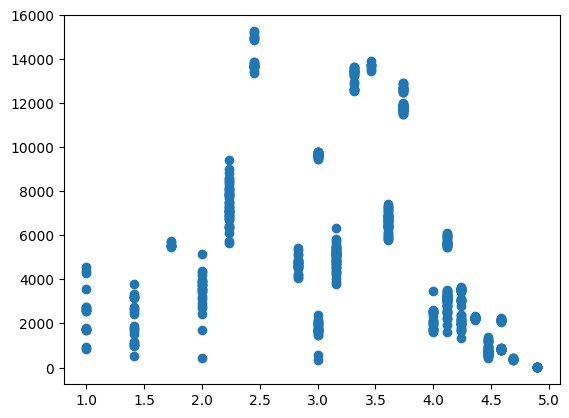

In [5]:
Radius, Ammount = [],[]
for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    Radius.append(np.sqrt(x**2+y**2+z**2))
    Ammount.append([*dict_duplicates.values()][count])

plt.scatter(Radius, Ammount)

In [ ]:
Bilder abspeichern 

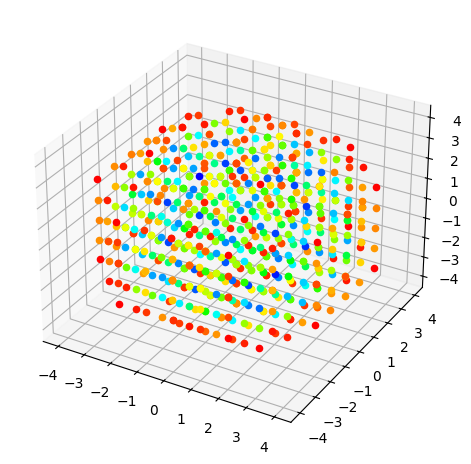

In [35]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter
import random
from time import gmtime, strftime

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    alpha = alpha.T
    beta = beta.T

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result




for i in range(1):
    number_of_winkel = 10000
    rng = np.random.default_rng(random.randint(100000,100000000000))

    lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1).T))
    lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1).T*math.pi*2
    #np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
    #np.random.rand(1,number_of_winkel)*math.pi*2
    start_time2 = time.time()

    kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

    indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                            0,0,0,
                                            lst_winkel_a, lst_winkel_b)

#         temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(indizes_des_Kegels_lst1[:,:,i].T)))))
    dict_duplicates = dict()
    for i in range(len(indizes_des_Kegels_lst1[0,0,:])):
        temp_dict = dict(Counter(map(tuple, np.rint(indizes_des_Kegels_lst1[:,:,i]))))
        for key, value in temp_dict.items():
            if dict_duplicates.get(str(key)) == None:
                dict_duplicates.update({str(key):value})
            else:
                dict_duplicates[str(key)] += value
    
    sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    red = Color("red")
    colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


    # for count, i in enumerate([*dict_duplicates.keys()]):
    #     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
    #         x_str, y_str, z_str_= (i.strip("()").split(","))
    #         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    #         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



    string_time_1 = strftime("%Y%m%d", gmtime())
    string_time_2 = str(int(strftime("%H", gmtime()))+2) if str(int(strftime("%H", gmtime()))+2) == 2 else "0" + str(int(strftime("%H", gmtime()))+2)
    # if len(string_time_2) == 1:
    #     string_time_2 = "0" + string_time_2
    string_time_3 = strftime("%M%S", gmtime())
    string_time = string_time_1 + string_time_2 + string_time_3



    for count, i in enumerate([*dict_duplicates.keys()]):
        x_str, y_str, z_str_= (i.strip("()").split(","))
        x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))
        
    for angle in range(0,360,90):
        ax.view_init(elev=30., azim=30+angle)
        plt.savefig(f'Test_{string_time}_Angle{30+angle}')

    # #Plot Colormap
    # x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
    # dict_colors = dict(zip(x_color,colors))
    # color_f = lambda n : dict_colors.get(n)

    # fig1, ax1 = plt.subplots(figsize=(6, 1))

    # for x_arg in x_color:
    #     ax1.axvline(x_arg, color=str(color_f(x_arg)))

    # ax.set_xlim3d(16, 24)
    # ax.set_ylim3d(16, 24)
    # ax.set_zlim3d(16, 24)

    plt.tight_layout()    
    # plt.show()
    # time.sleep(60)

# Doppelte Punkte durch Runden der Koordinaten

In [ ]:
# Vorherige Imports
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter
import random
from time import gmtime, strftime

In [36]:
import numpy as np

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord

    return result

In [137]:
number_of_winkel = 100
# Zufälligen seed festlegen.... sollte überarbeitet werden
rng = np.random.default_rng(random.randint(100000,100000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=10)

indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        0,0,0,
                                        lst_winkel_a, lst_winkel_b)

indizes_des_Kegels_lst1 = np.rint(indizes_des_Kegels_lst)
indizes_des_Kegels_lst2 = np.unique(indizes_des_Kegels_lst1, axis=0)

In [148]:
np.shape(indizes_des_Kegels_lst1[0,:,:])

(3, 845)

In [150]:
np.unique(indizes_des_Kegels_lst1[0,:,:], axis=1)

array([[ 1.,  2.,  2., ..., 11., 11., 11.],
       [ 0., -1., -1., ...,  3.,  3.,  4.],
       [-0., -3., -2., ...,  5.,  6.,  5.]])

In [151]:
np.shape(np.unique(indizes_des_Kegels_lst1[0,:,:], axis=1))

(3, 774)

In [152]:
np.shape(indizes_des_Kegels_lst)

(100, 3, 845)

In [158]:
np.shape(np.unique(indizes_des_Kegels_lst1, axis=0))

(100, 3, 845)

In [170]:
np.shape(unique_points)

(8962, 3)

845


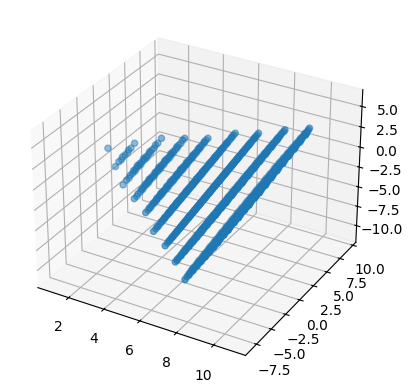

In [138]:
x,y,z = indizes_des_Kegels_lst[0,0,:], indizes_des_Kegels_lst[0,1,:], indizes_des_Kegels_lst[0,2,:]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z)
print(len(x))

845


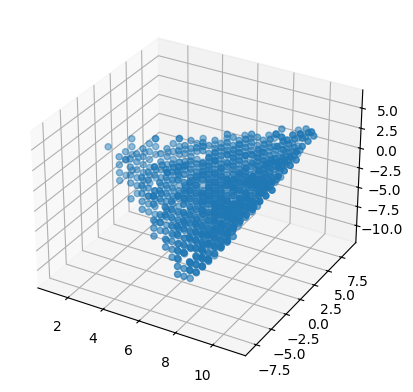

In [142]:
x,y,z = indizes_des_Kegels_lst1[0,0,:], indizes_des_Kegels_lst1[0,1,:], indizes_des_Kegels_lst1[0,2,:]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z)
print(len(x))

845


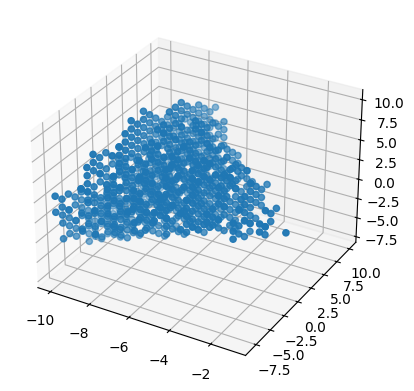

In [141]:
x,y,z = indizes_des_Kegels_lst2[0,0,:], indizes_des_Kegels_lst2[0,1,:], indizes_des_Kegels_lst2[0,2,:]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z)
print(len(x))

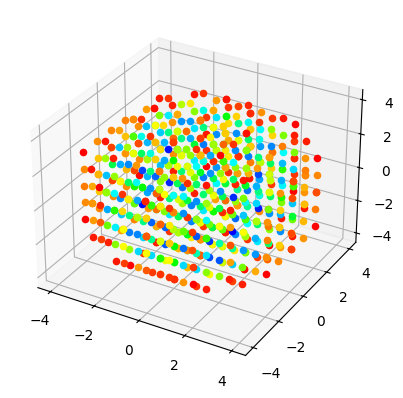

In [38]:
dict_duplicates = dict()
for i in range(len(indizes_des_Kegels_lst1[0,0,:])):
    temp_dict = dict(Counter(map(tuple, np.rint(indizes_des_Kegels_lst1[:,:,i]))))
    for key, value in temp_dict.items():
        if dict_duplicates.get(str(key)) == None:
            dict_duplicates.update({str(key):value})
        else:
            dict_duplicates[str(key)] += value

sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



string_time_1 = strftime("%Y%m%d", gmtime())
string_time_2 = str(int(strftime("%H", gmtime()))+2) if str(int(strftime("%H", gmtime()))+2) == 2 else "0" + str(int(strftime("%H", gmtime()))+2)
# if len(string_time_2) == 1:
#     string_time_2 = "0" + string_time_2
string_time_3 = strftime("%M%S", gmtime())
string_time = string_time_1 + string_time_2 + string_time_3



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))

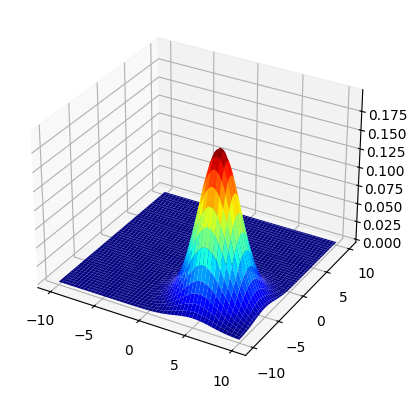

In [50]:
def gauss_3d(x,y,mu_x=0,mu_y=0,sigma=2):
    return 1/(np.sqrt(math.pi*2)*sigma)*np.exp(-1/2*(((x-mu_x)/sigma)**2+((y-mu_y)/sigma)**2))

from matplotlib import cm

x = np.linspace(-10,10,num=100)
y = np.linspace(-10,10,num=100)

x,y = np.meshgrid(x,y)
# z = gauss_3d(x,y)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x,y,gauss_3d(x,y,mu_x=5,mu_y=-5), cmap = cm.jet)
plt.show()

In [74]:
len(indizes_des_Kegels_lst[:,:,0])

10000

In [78]:
new_data = np.unique(indizes_des_Kegels_lst, axis=0)

In [114]:
new_data = indizes_des_Kegels_lst

In [81]:
len(new_data)

8252

In [110]:
len(new_data[:,0,0])

2

In [111]:
len(new_data[0,:,0])

3

In [112]:
len(new_data[0,0,:])

35

In [99]:
np.shape(new_data[:,:,0])

(8252, 3)

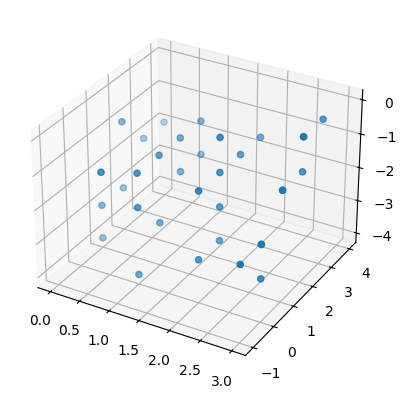

In [116]:
x,y,z = new_data[0,0,:], new_data[0,1,:], new_data[0,2,:]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z)

In [193]:
no_duplicates_with_zero = np.empty(np.shape(indizes_des_Kegels_lst))
for i in range(np.shape(indizes_des_Kegels_lst)[0]):
    no_duplicates_with_zero[i,:,:] = np.hstack((np.unique(indizes_des_Kegels_lst1[i,:,:], axis=1), np.empty((3, np.shape(indizes_des_Kegels_lst1[i,:,:])[1]-np.shape(np.unique(indizes_des_Kegels_lst1[i,:,:], axis=1))[1]))))

In [2]:
import numpy as np
# Vorherige Imports
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter
import random
from time import gmtime, strftime

def koords_in_kegel_x(range_r = 4):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    return x_mask, y_mask, z_mask


def rotation_kegel(x_mask, y_mask, z_mask, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([]), no_dup=True):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.flatten()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).flatten()
    rotation_matrix[:, 0, 2] = sin_beta.flatten()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).flatten()
    rotation_matrix[:, 1, 1] = cos_alpha.flatten()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).flatten()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).flatten()
    rotation_matrix[:, 2, 1] = sin_alpha.flatten()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).flatten()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.flatten(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.flatten(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.flatten(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[i,0,:]
    # y = result[i,1,:]
    # z = result[i,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    if no_dup:
        result = np.round(result)
        no_duplicates_with_zero = np.empty(np.shape(result))
        for i in range(np.shape(result)[0]):
            no_duplicates_with_zero[i,:,:] = np.hstack((np.unique(result[i,:,:], axis=1), np.zeros((3, np.shape(result[i,:,:])[1]-np.shape(np.unique(result[i,:,:], axis=1))[1]))))

        return no_duplicates_with_zero
    else:
        result = np.round(result)
        return result
    
def get_Duplicates(data=np.array([])):
    _dict_duplicates = dict()
    for i in range(len(data[0,0,:])):
        temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(data[:,:,i].T)))))
        for key, value in temp_dict.items():
            if str(key) == "(0.0, 0.0, 0.0)":
                continue
            elif _dict_duplicates.get(str(key)) == None:
                _dict_duplicates.update({str(key):value})
            else:
                _dict_duplicates[str(key)] += value
        
    _sorted_dict_duplicates = sorted(_dict_duplicates.items(), key = lambda x:x[1])
    return _dict_duplicates, _sorted_dict_duplicates


def plot_data(data, sorted_data, x_limit, y_limit, z_limit):
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    red = Color("red")
    colors = list(red.range_to(Color("blue"), int(list(sorted_data[-1])[-1])+1))


    # for count, i in enumerate([*dict_duplicates.keys()]):
    #     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
    #         x_str, y_str, z_str_= (i.strip("()").split(","))
    #         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    #         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    for count, i in enumerate([*data.keys()]):
        x_str, y_str, z_str_= (i.strip("()").split(","))
        x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
        if x <= x_limit and y <= y_limit and z <= z_limit:
            ax.scatter(x,y,z, c = str(colors[[*data.values()][count]]))

        
    #Plot Colormap
    x_color = range(int(list(sorted_data[-1])[-1])+1)
    dict_colors = dict(zip(x_color,colors))
    color_f = lambda n : dict_colors.get(n)

    fig1, ax1 = plt.subplots(figsize=(6, 1))

    for x_arg in x_color:
        ax1.axvline(x_arg, color=str(color_f(x_arg)))

    ax.set_xlim3d(1, 19)
    ax.set_ylim3d(1, 19)
    ax.set_zlim3d(1, 19)

    plt.tight_layout()    
    plt.show()

In [3]:
number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=8)

indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        10,10,10,
                                        lst_winkel_a, lst_winkel_b)
indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        10,10,10,
                                        lst_winkel_a, lst_winkel_b,no_dup=False)

In [3]:
number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2

kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=8)

indizes_des_Kegels_lst1 = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        10,10,10,
                                        lst_winkel_a, lst_winkel_b, True)

In [4]:
def get_Duplicates(data=np.array([])):
    _dict_duplicates = dict()
    for i in range(len(data[0,0,:])):
        temp_dict = dict(Counter(map(tuple, np.transpose(np.rint(data[:,:,i].T)))))
        for key, value in temp_dict.items():
            if str(key) == "(0.0, 0.0, 0.0)":
                continue
            elif _dict_duplicates.get(str(key)) == None:
                _dict_duplicates.update({str(key):value})
            else:
                _dict_duplicates[str(key)] += value
        
    _sorted_dict_duplicates = sorted(_dict_duplicates.items(), key = lambda x:x[1])
    return _dict_duplicates, _sorted_dict_duplicates


def plot_data(data, sorted_data, x_limit, y_limit, z_limit):
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    red = Color("red")
    colors = list(red.range_to(Color("blue"), int(list(sorted_data[-1])[-1])+1))


    # for count, i in enumerate([*dict_duplicates.keys()]):
    #     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
    #         x_str, y_str, z_str_= (i.strip("()").split(","))
    #         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    #         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    for count, i in enumerate([*data.keys()]):
        x_str, y_str, z_str_= (i.strip("()").split(","))
        x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
        if x <= x_limit and y <= y_limit and z <= z_limit:
            ax.scatter(x,y,z, c = str(colors[[*data.values()][count]]))

        
    #Plot Colormap
    x_color = range(int(list(sorted_data[-1])[-1])+1)
    dict_colors = dict(zip(x_color,colors))
    color_f = lambda n : dict_colors.get(n)

    fig1, ax1 = plt.subplots(figsize=(6, 1))

    for x_arg in x_color:
        ax1.axvline(x_arg, color=str(color_f(x_arg)))

    ax.set_xlim3d(-9, 9)
    ax.set_ylim3d(-9, 9)
    ax.set_zlim3d(-9, 9)

    plt.tight_layout()    
    plt.show()

In [8]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates(indizes_des_Kegels_lst1)
# dict_duplicates1, sorted_dict_duplicates1 = get_Duplicates(indizes_des_Kegels_lst1)

In [6]:
def plot_data(data, sorted_data, x_limit, y_limit, z_limit):
    fig = plt.figure()
    ax = fig.add_subplot(projection = "3d")

    red = Color("red")
    colors = list(red.range_to(Color("blue"), int(list(sorted_data[-1])[-1])+1))


    # for count, i in enumerate([*dict_duplicates.keys()]):
    #     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
    #         x_str, y_str, z_str_= (i.strip("()").split(","))
    #         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    #         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    for count, i in enumerate([*data.keys()]):
        x_str, y_str, z_str_= (i.strip("()").split(","))
        x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
        if x <= x_limit and y <= y_limit and z <= z_limit:
            ax.scatter(x,y,z, c = str(colors[[*data.values()][count]]))

        
    #Plot Colormap
    x_color = range(int(list(sorted_data[-1])[-1])+1)
    dict_colors = dict(zip(x_color,colors))
    color_f = lambda n : dict_colors.get(n)

    fig1, ax1 = plt.subplots(figsize=(6, 1))

    for x_arg in x_color:
        ax1.axvline(x_arg, color=str(color_f(x_arg)))

    ax.set_xlim3d(1, 19)
    ax.set_ylim3d(1, 19)
    ax.set_zlim3d(1, 19)

    plt.tight_layout()    
    plt.show()

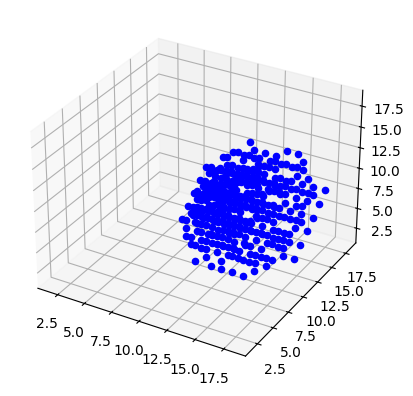

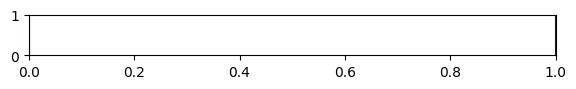

In [9]:

plot_data(dict_duplicates, sorted_dict_duplicates, 20, 20 ,11)


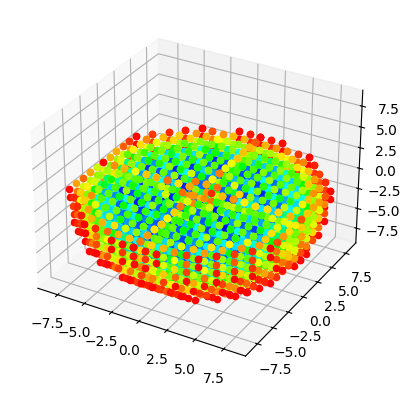

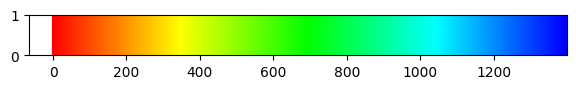

In [236]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    if z <= 0:
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(-9, 9)
ax.set_ylim3d(-9, 9)
ax.set_zlim3d(-9, 9)

plt.tight_layout()    
plt.show()

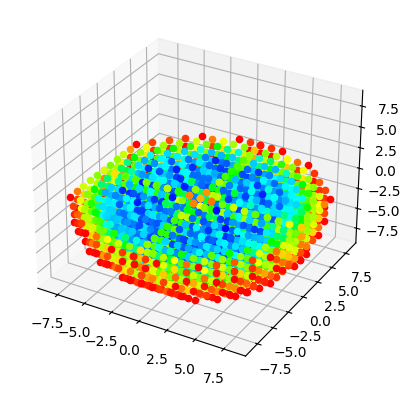

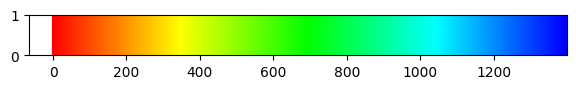

In [240]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    if z <= -1:
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(-9, 9)
ax.set_ylim3d(-9, 9)
ax.set_zlim3d(-9, 9)

plt.tight_layout()    
plt.show()

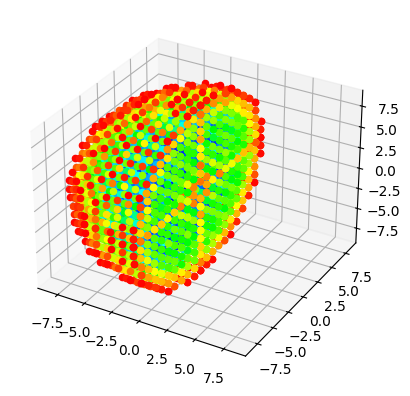

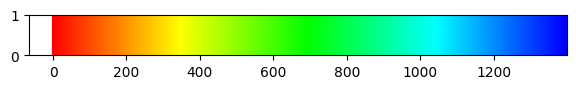

In [237]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    if x <= 0:
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(-9, 9)
ax.set_ylim3d(-9, 9)
ax.set_zlim3d(-9, 9)

plt.tight_layout()    
plt.show()

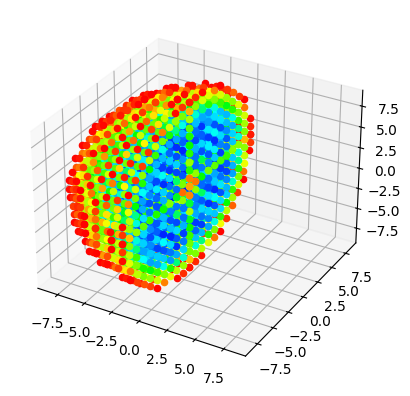

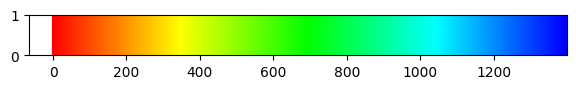

In [238]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    if x <= -1:
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(-9, 9)
ax.set_ylim3d(-9, 9)
ax.set_zlim3d(-9, 9)

plt.tight_layout()    
plt.show()

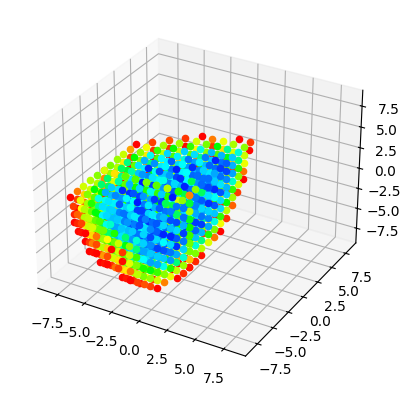

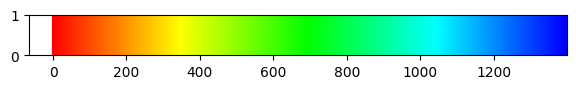

In [239]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(list(sorted_dict_duplicates[-1])[-1])+1))


# for count, i in enumerate([*dict_duplicates.keys()]):
#     if int(list(sorted_dict_duplicates[-1])[-1])*0.5 <= [*dict_duplicates.values()][count]:
#         x_str, y_str, z_str_= (i.strip("()").split(","))
#         x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
#         ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))



for count, i in enumerate([*dict_duplicates.keys()]):
    x_str, y_str, z_str_= (i.strip("()").split(","))
    x, y, z = float(x_str), float(y_str), float(z_str_.split(")")[0])
    if x <= -1 and z <= -1:
        ax.scatter(x,y,z, c = str(colors[[*dict_duplicates.values()][count]]))


    
#Plot Colormap
x_color = range(int(list(sorted_dict_duplicates[-1])[-1])+1)
dict_colors = dict(zip(x_color,colors))
color_f = lambda n : dict_colors.get(n)

fig1, ax1 = plt.subplots(figsize=(6, 1))

for x_arg in x_color:
    ax1.axvline(x_arg, color=str(color_f(x_arg)))

ax.set_xlim3d(-9, 9)
ax.set_ylim3d(-9, 9)
ax.set_zlim3d(-9, 9)

plt.tight_layout()    
plt.show()

In [1]:
from Test_lib import *

In [2]:
number_of_winkel = 100000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=4)

indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        0,0,0,
                                        lst_winkel_a, lst_winkel_b)

In [3]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_old(indizes_des_Kegels_lst)

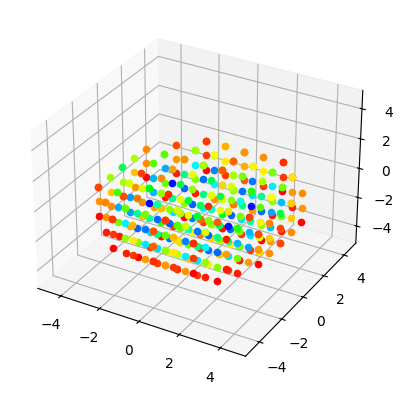

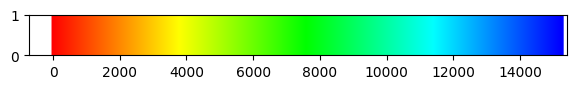

In [4]:
plot_data(dict_duplicates, sorted_dict_duplicates, 10, 10 , 0)

# Gaussfunktion gedreht 

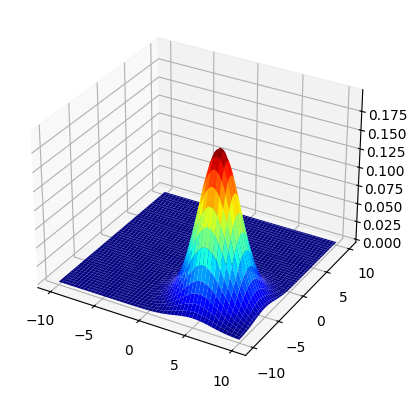

In [18]:
def gauss_3d(x,y,mu_x=0,mu_y=0,sigma=2):
    return 1/(np.sqrt(math.pi*2)*sigma)*np.exp(-1/2*(((x-mu_x)/sigma)**2+((y-mu_y)/sigma)**2))

from matplotlib import cm

x = np.linspace(-10,10,num=100)
y = np.linspace(-10,10,num=100)

x,y = np.meshgrid(x,y)
# z = gauss_3d(x,y)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x,y,gauss_3d(x,y,mu_x=5,mu_y=-5), cmap = cm.jet)
plt.show()

In [ ]:
# x_rot 
# z*sin_beta + x*cos_beta
# y_rot
# y*cos_alpha + x*sin_alpha*sin_beta - z*sin_alpha*cos_beta
# z_rot
# y*sin_alpha - x*cos_alpha*sin_beta + z*cos_alpha*cos_beta

In [32]:
def rotate_data(data,  alpha,  beta):
    sin_alpha = np.sin(alpha)
    sin_beta = np.sin(beta)
    cos_alpha = np.cos(alpha)
    cos_beta = np.cos(beta)

    x,y,z = data
    x_rot = z*sin_beta + x*cos_beta
    y_rot = y*cos_alpha + x*sin_alpha*sin_beta - z*sin_alpha*cos_beta
    z_rot = y*sin_alpha - x*cos_alpha*sin_beta + z*cos_alpha*cos_beta
    return(x_rot, y_rot, z_rot)

def gauss_3d(x,y,mu_x=0,mu_y=0,sigma=2):
    return 1/(np.sqrt(math.pi*2)*sigma)*np.exp(-1/2*(((x-mu_x)/sigma)**2+((y-mu_y)/sigma)**2))

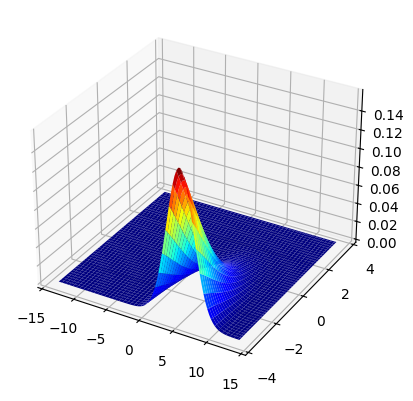

In [17]:
def gauss_3d(x,y,mu_x=0,mu_y=0,sigma=2):
    return 1/(np.sqrt(math.pi*2)*sigma)*np.exp(-1/2*(((x-mu_x)/sigma)**2+((y-mu_y)/sigma)**2))

from matplotlib import cm

x = np.linspace(-10,10,num=100)
y = np.linspace(-10,10,num=100)
z = np.linspace(-10,10,num=100)

x, y, z = rotate_data((x,y,z), math.pi/3, math.pi)

x,y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y,z,gauss_3d(y,z,mu_x=5,mu_y=-5), cmap = cm.jet)
plt.show()

In [44]:
from Test_lib import *
number_of_winkel = 100000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=9)

indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        0,0,0,
                                        lst_winkel_a, lst_winkel_b)

In [45]:
def rotate_data(data,  alpha,  beta):
    sin_alpha = np.sin(alpha)
    sin_beta = np.sin(beta)
    cos_alpha = np.cos(alpha)
    cos_beta = np.cos(beta)

    x,y,z = data
    x_rot = z*sin_beta + x*cos_beta
    y_rot = y*cos_alpha + x*sin_alpha*sin_beta - z*sin_alpha*cos_beta
    z_rot = y*sin_alpha - x*cos_alpha*sin_beta + z*cos_alpha*cos_beta
    return(x_rot, y_rot, z_rot)

def gauss_3d(x,y,mu_x=0,mu_y=0,sigma=2):
    return 1/(np.sqrt(math.pi*2)*sigma)*np.exp(-1/2*(((x-mu_x)/sigma)**2+((y-mu_y)/sigma)**2))

In [46]:
i = 0
test1 = np.unique(indizes_des_Kegels_lst[i,:,:], axis=1)

In [47]:
x,y,z = test1
xf,yf,zf = rotate_data(test1, lst_winkel_a[i], lst_winkel_b[i])

In [52]:
color_factor = gauss_3d(xf,zf)

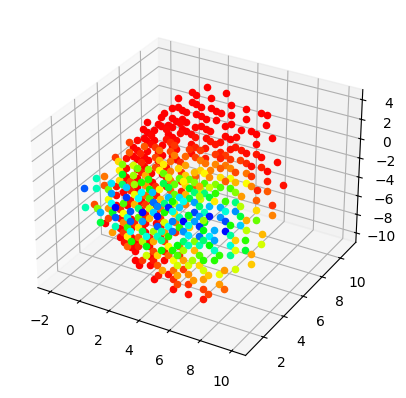

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(1000*np.max(color_factor)+1)))
for xs,ys,zs,col in zip(x,y,z,color_factor):
    ax.scatter(xs,ys,zs, c = str(colors[int(1000*col)]))

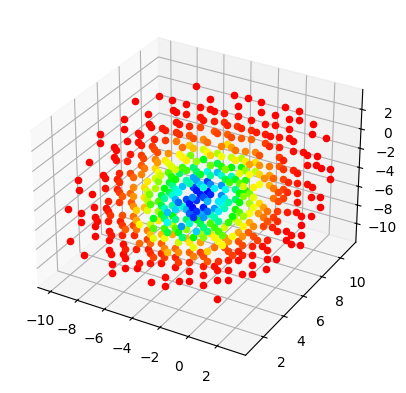

In [5]:
from Test_lib import *
number_of_winkel = 100000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
#np.arccos(1-2*(np.random.rand(1,number_of_winkel)))
#np.random.rand(1,number_of_winkel)*math.pi*2


kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r = 9)

x_offset, y_offset, z_offset = 2,2,2
indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        x_offset, y_offset, z_offset,
                                        lst_winkel_a, lst_winkel_b)


i = 0
x,y,z = np.unique(indizes_des_Kegels_lst[i,:,:], axis=1)
xf,yf,zf = reverse_rotate_and_translate_data((x,y,z), lst_winkel_a[i], lst_winkel_b[i], x_offset, y_offset, z_offset)
color_factor = gauss_2d(yf,zf)

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

red = Color("red")
colors = list(red.range_to(Color("blue"), int(1000*np.max(color_factor)+1)))
for xs,ys,zs,col in zip(x,y,z,color_factor):
    ax.scatter(xs,ys,zs, c = str(colors[int(1000*col)]))
plt.show()

### Die Rotation musste natürlich in umgekehrter reihenfolge rückgängig gemacht werden -.-


In [ ]:
# Vorübergehende Version, kann deutlich beschleunigt werden, siehe rotation_kegel
def reverse_rotate_and_translate_data(data, alpha,  beta, x_delta=0, y_delta=0, z_delta=0):
    # Drehung um -alpha und -beta um die Originale Position zu bestimmen
    sin_alpha = np.sin(-alpha)
    sin_beta = np.sin(-beta)
    cos_alpha = np.cos(-alpha)
    cos_beta = np.cos(-beta)

    x,y,z = data
    # Translation in den Ursprung des Koordinatensystems für die Rotation
    x -= x_delta
    y -= y_delta
    z -= z_delta
    # erst rotation um -alpha um die x achse, dann rotation um -beta um die y achse
    x_rot = z*cos_alpha*sin_beta + x*cos_beta + y*sin_alpha*sin_beta
    y_rot = y*cos_alpha - z*sin_alpha
    z_rot = y*sin_alpha*cos_beta - x*sin_beta + z*cos_alpha*cos_beta

    return(x_rot, y_rot, z_rot)

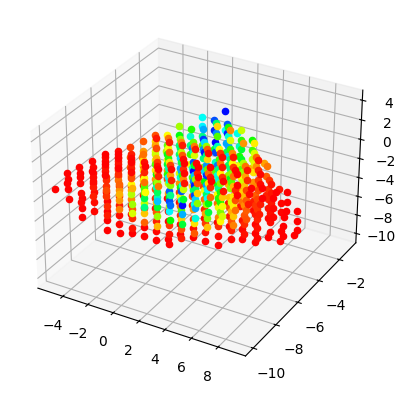

In [1]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2


# Kegel mit Länge range_r generieren
kegel_x, kegel_y, kegel_z = koords_in_kegel_x(range_r=9)
# Kegel Rotieren
x_offset, y_offset, z_offset = 2,2,2
indizes_des_Kegels_lst = rotation_kegel(kegel_x, kegel_y, kegel_z,
                                        x_offset, y_offset, z_offset,
                                        lst_winkel_a, lst_winkel_b)
#Im Beispiel von einem Winkel i wird hier die Gewichtung durch Gauss gezeigt
i = 0
# Doppelte Punkte können durch das Runden auftreten, diese werden hier herausgenommen
x,y,z  = np.unique(indizes_des_Kegels_lst[i,:,:], axis=1)
# Um die Punkte mit der Gaussfunktion bewerten zu können werden die Punkte im Kegel zurück in den Ursprung 
# versetzt und in die ursprünglioche position zurück gedreht
xf,yf,zf = reverse_rotate_and_translate_data((x,y,z), lst_winkel_a[i], lst_winkel_b[i], x_offset, y_offset, z_offset)
# color_factor ist später das Gewicht der ODFs
color_factor = gauss_2d(yf,zf)

# Bild wird ausgegeben
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
# Farbverlauf ist von Rot(kleines Gewicht) bis Blau(großes Gewicht)
red = Color("red")
colors = list(red.range_to(Color("blue"), int(1000*np.max(color_factor)+1)))
for xs,ys,zs,col in zip(x,y,z,color_factor):
    ax.scatter(xs,ys,zs, c = str(colors[int(1000*col)]))
plt.show()

Eine deutlich besserer Methode sollte es sein die Gausswertung auf den Ursprünglichen Kegel zu beziehen.
Die Reienfolge der Punkte wird durch die Rotation nicht verändert, somit ist das gewicht des iten Punktes im Originalkegel identosch mit dem Rotierten.

Dies Umgeht jegliche Rechnungen, die Doppelten Punkte des Rotierten Kegels dürfen aber dann nicht zu früh entfernt werden, da dies die Reienfolge ändert

# TO DO:
alte mehtode neu machen.

extremwerte der winkel 90 grad.

just in time compilations.

number funktionen
numba 

multicore proicessing auch möglich.

np.ravel() statt np.flatten()

np.map() für rotation

In [ ]:
# cos_alpha = np.cos(alpha)
# sin_alpha = np.sin(alpha)
# cos_beta = np.cos(beta)
# sin_beta = np.sin(beta)
# erst rotation um beta um die y achse, dann rotation um alpha um die x achse
# x_rot = z*sin_beta + x*cos_beta
# y_rot = y*cos_alpha + x*sin_alpha*sin_beta - z*sin_alpha*cos_beta
# z_rot = y*sin_alpha - x*cos_alpha*sin_beta + z*cos_alpha*cos_beta
# x_grid_rot = (z_grid*sin_beta + x_grid*cos_beta)
# y_grid_rot = (y_grid*cos_alpha + x_grid*sin_alpha*sin_beta - z_grid*sin_alpha*cos_beta)
# z_grid_rot = (y_grid*sin_alpha - x_grid*cos_alpha*sin_beta + z_grid*cos_alpha*cos_beta)

In [13]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = 0, beta = 0):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    # mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    mask = (((y_grid*sin_alpha - x_grid*cos_alpha*sin_beta + z_grid*cos_alpha*cos_beta)**2 + (y_grid*cos_alpha + x_grid*sin_alpha*sin_beta - z_grid*sin_alpha*cos_beta)**2) < (z_grid*sin_beta + x_grid*cos_beta)**2) & (0 < (z_grid*sin_beta + x_grid*cos_beta)) & (range_r > (z_grid*sin_beta + x_grid*cos_beta))
    
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask] + x_koord
    y_mask = y_grid[mask] + y_koord
    z_mask = z_grid[mask] + z_koord
    return (x_mask, y_mask, z_mask)

In [24]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(4,x_offset, y_offset, z_offset,lst_winkel_a,lst_winkel_b))
x,y,z = kegel
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

In [30]:
kegel1 = np.copy(kegel)
np.shape(kegel1)

(3, 70)

In [33]:
kegel_lst = np.vstack(([kegel], [kegel1]))

In [34]:
np.shape(kegel_lst)

(2, 3, 70)

In [35]:
kegel_lst[0] == kegel1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  Tru

In [38]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    # mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # mask = (((y_grid*sin_alpha - x_grid*cos_alpha*sin_beta + z_grid*cos_alpha*cos_beta)**2 + (y_grid*cos_alpha + x_grid*sin_alpha*sin_beta - z_grid*sin_alpha*cos_beta)**2) < (z_grid*sin_beta + x_grid*cos_beta)**2) & (0 < (z_grid*sin_beta + x_grid*cos_beta)) & (range_r > (z_grid*sin_beta + x_grid*cos_beta))
    result = np.tile(np.array([(x_grid, y_grid, z_grid)]), len(alpha))
    print(np.shape(result))
    for ca, sa, cb, sb in zip(cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        result = np.vstack(([(x_mask, y_mask, z_mask)],[result]))

    # Filtere Punkte innerhalb des Kegels
    # x_mask = x_grid[mask] + x_koord
    # y_mask = y_grid[mask] + y_koord
    # z_mask = z_grid[mask] + z_koord
    return result

In [39]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(4,x_offset, y_offset, z_offset,lst_winkel_a,lst_winkel_b))
x,y,z = kegel
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

(1, 3, 17, 17, 17000)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 6 dimension(s)

In [86]:
range_r = 5
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

result = np.vstack([x_grid_tiled, y_grid_tiled, z_grid_tiled])
result_reshape = np.reshape(result,(len(alpha),3,21,21,21))

(3, 21, 21, 21)

In [101]:
x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

# Wende die Rotationsmatrix auf die x- und y-Koordinaten an
result = np.vstack([x_grid_tiled, y_grid_tiled, z_grid_tiled])
result_reshape = np.reshape(result,(len(alpha),3,21,21,21))

In [100]:
np.all(result_reshape[0,0,:,:,:] == x_grid)

True

In [123]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
    y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
    z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.vstack([x_grid_tiled, y_grid_tiled, z_grid_tiled])
    dim = len(x_grid)
    result_reshape = np.reshape(result,(len(alpha),3,dim,dim,dim))

    # Mask für innerhalb des Zylinders
    # mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # mask = (((y_grid*sin_alpha - x_grid*cos_alpha*sin_beta + z_grid*cos_alpha*cos_beta)**2 + (y_grid*cos_alpha + x_grid*sin_alpha*sin_beta - z_grid*sin_alpha*cos_beta)**2) < (z_grid*sin_beta + x_grid*cos_beta)**2) & (0 < (z_grid*sin_beta + x_grid*cos_beta)) & (range_r > (z_grid*sin_beta + x_grid*cos_beta))

    print(np.shape(result_reshape))
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        print(np.shape(result_reshape[i,0,:,:,:]))
        print(np.shape(x_grid[mask]))
        print(result_reshape[i,0,:,:,:][mask])
        result_reshape[i,0,:,:,:] = result_reshape[i,0,:,:,:][mask] + x_koord
        result_reshape[i,1,:,:,:] = result_reshape[i,1,:,:,:][mask] + y_koord
        result_reshape[i,2,:,:,:] = result_reshape[i,2,:,:,:][mask] + z_koord
        # result = np.vstack(([(x_mask, y_mask, z_mask)],[result]))

    # Filtere Punkte innerhalb des Kegels
    # x_mask = x_grid[mask] + x_koord
    # y_mask = y_grid[mask] + y_koord
    # z_mask = z_grid[mask] + z_koord
    return result

In [131]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))
x,y,z = kegel
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

(1000, 3, 21, 21, 21)
(21, 21, 21)
(133,)
[ 1.  2.  3.  4.  0.  1.  1.  1.  2.  2.  3.  3.  4. -1.  0.  0.  0.  1.
  1.  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  5.  6. -1. -1.  0.  0.  0.
  0.  1.  1.  1.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.  5.  6.
 -1. -1. -1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  2.  2.  2.  2.  3.
  3.  3.  3.  4.  4.  5.  6. -1. -1.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.  5.  6. -1.  0.  0.  0.  1.  1.
  1.  1.  2.  2.  2.  3.  3.  3.  4.  4.  5.  6.  0.  1.  1.  1.  2.  2.
  3.  3.  4.  1.  2.  3.  4.]


ValueError: could not broadcast input array from shape (133,) into shape (21,21,21)

In [198]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    # mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # mask = (((y_grid*sin_alpha - x_grid*cos_alpha*sin_beta + z_grid*cos_alpha*cos_beta)**2 + (y_grid*cos_alpha + x_grid*sin_alpha*sin_beta - z_grid*sin_alpha*cos_beta)**2) < (z_grid*sin_beta + x_grid*cos_beta)**2) & (0 < (z_grid*sin_beta + x_grid*cos_beta)) & (range_r > (z_grid*sin_beta + x_grid*cos_beta))
    
    # print(np.shape(result))
    for i ,ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        shape = np.shape((x_mask, y_mask, z_mask)) 
        if i == 0:
            result = np.reshape(np.empty(shape), (1,shape[0], shape[1] ))
            print(np.shape(result))
            print(np.shape((x_mask, y_mask, z_mask)))
            result = np.concatenate((result,np.reshape(np.array((x_mask, y_mask, z_mask)), (1,shape[0], shape[1]))), axis=0)
        else:
            print(np.shape(result))
            print(np.shape((x_mask, y_mask, z_mask)))
            result = np.concatenate((result,np.reshape(np.array((x_mask, y_mask, z_mask)), (1,shape[0], shape[1]))), axis=0)

    # Filtere Punkte innerhalb des Kegels
    # x_mask = x_grid[mask] + x_koord
    # y_mask = y_grid[mask] + y_koord
    # z_mask = z_grid[mask] + z_koord
    return result

In [199]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))
x,y,z = kegel
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

(1, 3, 137)
(3, 137)
(2, 3, 137)
(3, 135)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 137 and the array at index 1 has size 135

In [205]:
array1 = np.random.rand(3, 100)
array2 = np.random.rand(5, 100)
array3 = np.random.rand(2, 100)
print(len(array1),len(array2),len(array3))

# Liste der Arrays
arrays_list = [array1, array2, array3]
arrays_list 

3 5 2


[array([[2.92564358e-01, 2.50467542e-01, 6.33826839e-01, 7.57376310e-01,
         1.74811598e-01, 2.94457960e-01, 1.56985681e-01, 4.18426523e-01,
         4.85241078e-01, 8.25006301e-01, 9.20060709e-01, 4.22208077e-02,
         8.91895669e-02, 3.27220829e-01, 3.05671677e-01, 9.43652415e-01,
         1.43768301e-01, 8.26458636e-01, 8.56263966e-01, 5.12435988e-01,
         9.17795995e-01, 9.70859914e-01, 1.10020854e-01, 8.94254245e-01,
         2.35942006e-01, 9.54353283e-01, 5.24795992e-01, 3.00463128e-01,
         3.25133617e-01, 6.80793306e-01, 9.02809558e-01, 5.75860181e-01,
         1.40063879e-01, 4.58678704e-01, 3.84679867e-01, 3.33774931e-01,
         7.21683561e-01, 1.56131812e-01, 2.27341196e-01, 3.50280086e-01,
         3.86137839e-01, 3.55822427e-02, 4.29411679e-01, 7.44662843e-01,
         3.93113246e-01, 7.31046297e-01, 1.74866747e-01, 6.88618853e-01,
         9.44274876e-01, 3.24365193e-02, 5.29464677e-01, 2.45659019e-01,
         1.08610944e-01, 6.92904205e-01, 8.14332866

In [209]:
np.shape(array3)

(2, 100)

In [ ]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    for i ,ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        shape = np.shape((x_mask, y_mask, z_mask)) 
        if i == 0:
            max_lenght = shape[-1]*2
            n = len(cos_alpha)
            result = np.empty((n, 3, max_lenght))
            result[:] = np.nan   
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)
        else:
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)

    return result

# Numab jit optimierung?

In [282]:
from numba import jit, int32


def get_mesh(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    return loop_winkel(range_r, x_koord, y_koord, z_koord, cos_alpha, sin_alpha, cos_beta, sin_beta, x_grid, y_grid, z_grid )

@jit(nopython=True)
def loop_winkel(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, 
                cos_alpha = np.array([1,2]), sin_alpha = np.array([1,2]), 
                cos_beta = np.array([1,2]), sin_beta = np.array([1,2]), 
                x_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]]), 
                y_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]]), 
                z_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]])):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    for i ,ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        shape = np.shape((x_mask, y_mask, z_mask)) 
        if i == 0:
            max_lenght = shape[-1]*2
            n = len(cos_alpha)
            result = np.empty((n, 3, max_lenght))
            result[:] = np.nan   
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)
        else:
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)

    return result

In [280]:
range_r = 1
x = np.linspace(-range_r, range_r, range_r*2+1)
y = np.copy(x)
z = np.copy(x)

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
x_grid

array([[[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       [[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       [[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]]])

In [281]:
np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]])

array([[[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       [[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]],

       [[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]]])

In [274]:
x = np.empty((5,5,5))

In [283]:
number_of_winkel = 100000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

kegel = np.array(get_mesh(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
[1m      - Of which 20 did not match due to:
      Overload of function 'getitem': File: <numerous>: Line N/A.
        With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':[0m
[1m       No match.[0m
[1m      - Of which 2 did not match due to:
      Overload in function 'GetItemBuffer.generic': File: numba\core\typing\arraydecl.py: Line 209.
        With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':[0m
[1m       Rejected as the implementation raised a specific error:
         NumbaTypeError: [1mMulti-dimensional indices are not supported.[0m[0m
  raised from c:\Users\tlock\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\core\typing\arraydecl.py:89
[0m
[0m[1mDuring: typing of intrinsic-call at C:\Users\tlock\AppData\Local\Temp\ipykernel_13828\2365678193.py (29)[0m
[1m
File "C:\Users\tlock\AppData\Local\Temp\ipykernel_13828\2365678193.py", line 29:[0m
[1mdef loop_winkel(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, 
    <source elided>
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
[1m        x_mask = x_grid[mask] + x_koord
[0m        [1m^[0m[0m


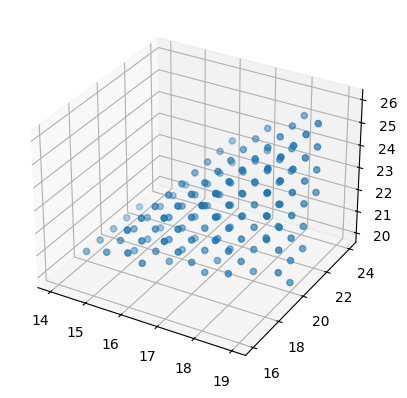

In [265]:
x,y,z = kegel[0,:,:]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

# Numba jit funktioniert nicht bei der Oberen version

In [ ]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    for i ,ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        shape = np.shape((x_mask, y_mask, z_mask)) 
        if i == 0:
            max_lenght = shape[-1]*2
            n = len(cos_alpha)
            result = np.empty((n, 3, max_lenght))
            result[:] = np.nan   
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)
        else:
            # print(np.shape(result))
            # print(np.shape((x_mask, y_mask, z_mask)))
            result[i, :, :shape[1]] = (x_mask, y_mask, z_mask)

    return result

In [292]:
from numba import jit, int32


def get_mesh(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    return loop_winkel(range_r, x_koord, y_koord, z_koord, cos_alpha, sin_alpha, cos_beta, sin_beta, x_grid, y_grid, z_grid )

#@jit(nopython=True)
def loop_winkel(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, 
                cos_alpha = np.array([0,1]), sin_alpha = np.array([1,0]), 
                cos_beta = np.array([1,0]), sin_beta = np.array([0,1]), 
                x_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]]), 
                y_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]]), 
                z_grid = np.array([[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]],[[-1., -1., -1.],[ 0.,  0.,  0.],[ 1.,  1.,  1.]]])):
    # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    lst_x,lst_y,lst_z = [],[],[]
    lst_anz = []
    for i ,ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + x_koord
        y_mask = y_grid[mask] + y_koord
        z_mask = z_grid[mask] + z_koord
        # print(x_mask)
        # print(lst_x)
        lst_x.append(x_mask)
        lst_y.append(y_mask)
        lst_z.append(z_mask)
        lst_anz.append(len(x_mask))
    return (lst_x, lst_y, lst_z, lst_anz)

In [296]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

kegel = np.array(get_mesh(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 10) + inhomogeneous part.

In [333]:
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

alpha = lst_winkel_a
beta = lst_winkel_b
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
        x_mask = x_grid[mask] + 0
        y_mask = y_grid[mask] + 0
        z_mask = z_grid[mask] + 0
        data = (x_mask, y_mask, z_mask)
        if i == 0:
                length = np.shape(data)[1]*1.5
                # print(length, np.shape(data))
                padding = np.zeros((3, int(length - np.shape(data)[1])))
                padding[:] = np.nan
                data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
                result = data_padded
        else:
                # print(length)
                padding = np.zeros((3, int(length - np.shape(data)[1])))
                padding[:] = np.nan
                data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
                result = np.concatenate((result, data_padded), axis=0)
        

### vstack version

In [322]:
np.hstack((result , np.zeros((3, np.shape(data)[1]-lenght))))

NameError: name 'data' is not defined

In [1]:
from Test_lib import *

In [15]:
def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
            mask = (((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb))
            x_mask = x_grid[mask] 
            y_mask = y_grid[mask] 
            z_mask = z_grid[mask]
            data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
            if i == 0:
                    length = np.shape(data)[1]*1.5
                    # print(length, np.shape(data))
                    padding = np.zeros((3, int(length - np.shape(data)[1])))
                    padding[:] = np.nan
                    data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
                    result = data_padded
            else:
                    # print(length)
                    padding = np.zeros((3, int(length - np.shape(data)[1])))
                    padding[:] = np.nan
                    data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
                    result = np.concatenate((result, data_padded), axis=0)

    return result

In [16]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(9, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

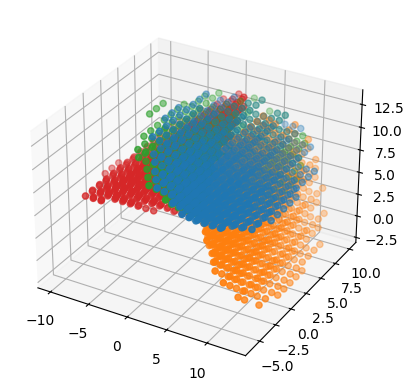

In [22]:
x,y,z = kegel[0,:,:]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

x1,y1,z1 = kegel[1,:,:]
ax.scatter(x1,y1,z1)
x2,y2,z2 = kegel[2,:,:]
ax.scatter(x2,y2,z2)
x3,y3,z3 = kegel[3,:,:]
ax.scatter(x3,y3,z3)

In [18]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])

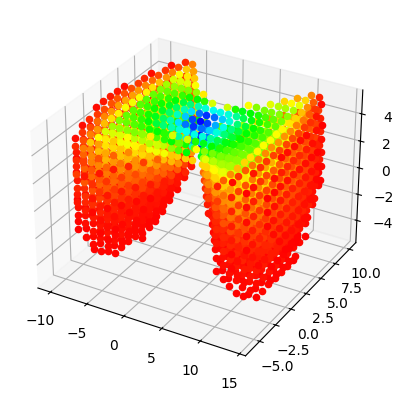

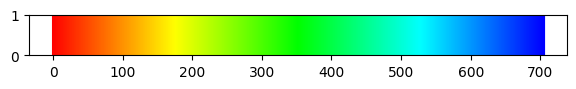

In [19]:
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,5)

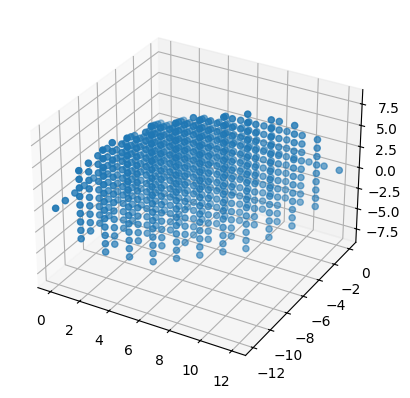

In [1]:
from Test_lib import *

def koords_in_kegel_alpha_beta(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        #print(ca,sa,cb,sb)
        # erst y achse, dann x achse
        # mask = ((((y_grid*sa - x_grid*ca*sb + z_grid*ca*cb)**2 + (y_grid*ca + x_grid*sa*sb - z_grid*sa*cb)**2) < (z_grid*sb + x_grid*cb)**2) & (0 < (z_grid*sb + x_grid*cb)) & (range_r > (z_grid*sb + x_grid*cb)))
        # erst y achse, dann z achse
        mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 <= (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            length = np.shape(data)[1]*1.5
            # print(length, np.shape(data))
            padding = np.zeros((3, int(length - np.shape(data)[1])))
            padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])))
            padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)

    return result

number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

# lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
# lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

lst_winkel_b = np.array([math.pi/180*45])
lst_winkel_a = np.array([math.pi/180*0])
x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta(9, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

x,y,z = kegel[0,:,:]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x,y,z)

# x1,y1,z1 = kegel[1,:,:]
# ax.scatter(x1,y1,z1)
# x2,y2,z2 = kegel[2,:,:]
# ax.scatter(x2,y2,z2)
# x3,y3,z3 = kegel[3,:,:]
# ax.scatter(x3,y3,z3)
plt.show()

In [2]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 2,2,2

kegel = np.array(koords_in_kegel_alpha_beta(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,100)

NameError: name 'np' is not defined

In [3]:
import numpy as np
# Vorherige Imports
import math
import time
import matplotlib.pyplot as plt
from colour import Color
from collections import Counter
import random
from time import gmtime, strftime

In [39]:
number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))
range_r = 5
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
alpha, beta = 0,20
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)

x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

In [15]:
mask = (((cos_alpha*y+sin_alpha*(sin_beta*x+cos_beta*y))**2 + (-sin_alpha*z+cos_alpha*(sin_beta*x+cos_beta*y))**2 < (-sin_beta*y+cos_beta*x)**2) & (0 < (-sin_beta*y+cos_beta*x)) & (range_r > (-sin_beta*y+cos_beta*x)))
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
mask = (((cos_alpha*y_grid+sin_alpha*(sin_beta*x_grid+cos_beta*y_grid))**2 + (-sin_alpha*z_grid+cos_alpha*(sin_beta*x_grid+cos_beta*y_grid))**2 < (-sin_beta*y_grid+cos_beta*x_grid)**2) & (0 < (-sin_beta*y_grid+cos_beta*x_grid)) & (range_r > (-sin_beta*y_grid+cos_beta*x_grid)))
mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [40]:
mask = ((y_grid * np.sin(alpha) + z_grid * np.cos(alpha) * np.cos(beta) + x_grid * np.cos(alpha) * np.sin(beta))**2 +        
        (z_grid * np.sin(beta) + x_grid * np.cos(beta))**2 <
        (x_grid * np.sin(alpha) + y_grid * np.cos(alpha) * np.cos(beta) - z_grid * np.cos(alpha) * np.sin(beta))**2)


# mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        


In [41]:
x_mask = x_grid[mask] 
y_mask = y_grid[mask] 
z_mask = z_grid[mask]

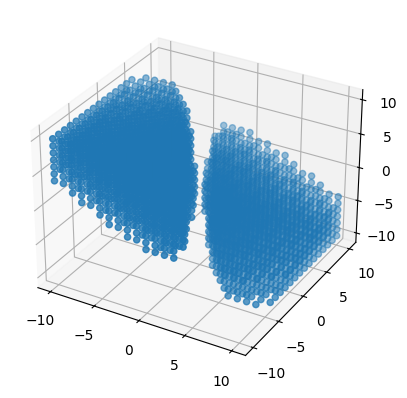

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x_mask, y_mask, z_mask)
plt.show()

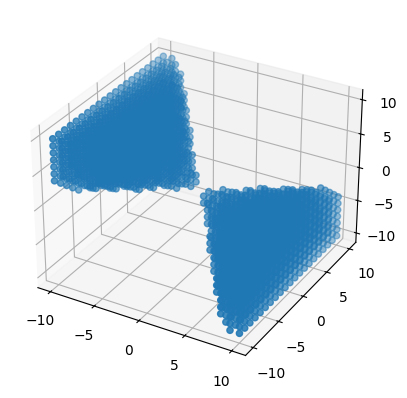

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x_mask, y_mask, z_mask)
plt.show()

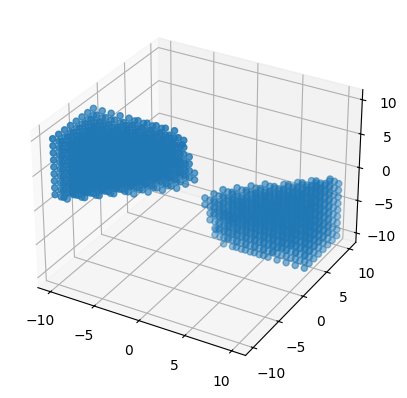

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(x_mask, y_mask, z_mask)
plt.show()

In [ ]:
for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
    mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
    # erst y achse, dann x achse
    # print(np.all(x_grid == test_x))
    # mask = (((sa*y_grid - ca*(sb*x_grid + cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
    # erst y achse, dann z achse
    # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
    x_mask = x_grid[mask] 
    y_mask = y_grid[mask] 
    z_mask = z_grid[mask]
        

In [ ]:
rotation_matrix = np.array([[cos_beta, 0, sin_beta],
                            [sin_alpha*sin_beta, cos_alpha, -sin_alpha*cos_beta],                               
                            [-cos_alpha*sin_beta, sin_alpha, cos_alpha*cos_beta]])
np.einsum("")

# Version funktioniert, schöne Homogene verteilung im inneren, bei vielen winkeln

In [43]:
from Test_lib import *

def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # erst z achse, dann x achse
        # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
        # erst y achse, dann x achse
        # print(np.all(x_grid == test_x))
        # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        # erst y achse, dann z achse
        # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        # umgeschmissene version entlang der zachse gedreht um y und x
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])))
            padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])))
            padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)

    return result



In [44]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))





In [ ]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()


########### Test, 2 bel. winkel
# lst_winkel_b = np.array([0,int(input("beta1:\n"))*math.pi/180,int(input("beta2:\n"))*math.pi/180])
# lst_winkel_a = np.array([0,int(input("alpha1:\n"))*math.pi/180,int(input("alpha2:\n"))*math.pi/180])

# x_offset, y_offset, z_offset = 0,0,0

# kegel = np.array(koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

# fig = plt.figure()
# ax = fig.add_subplot(projection = "3d")

# for i in range(len(lst_winkel_a)):
#     x,y,z = kegel[i,:,:]
#     ax.scatter(x,y,z)


# plt.show()

## Die Verison ist sehr langsam, kann sie mit numba jit beschleunigt werden?

#### 1. Aufteilen der Funktion, da np.meshgrid nicht mit numba kompatibel ist

In [15]:
from Test_lib import *



def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    return loop_grid(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)

def loop_grid(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # erst z achse, dann x achse
        # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
        # erst y achse, dann x achse
        # print(np.all(x_grid == test_x))
        # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        # erst y achse, dann z achse
        # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        # umgeschmissene version entlang der zachse gedreht um y und x
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)

    return result



In [31]:
test1 = [i for  i in range(5)]
test2 = [i for  i in range(2)]
res = [test1, test2]

In [34]:
res = [*res, test1]

In [35]:
res

[[0, 1, 2, 3, 4], [0, 1], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

In [16]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


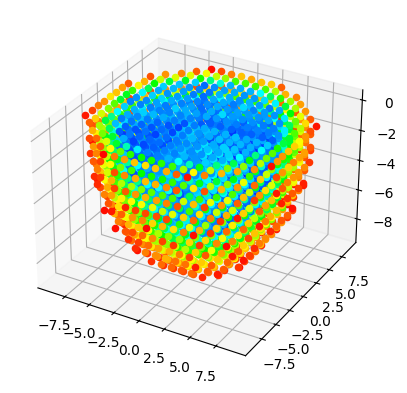

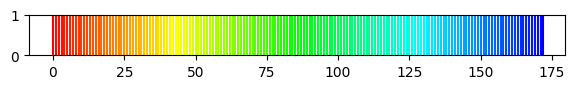

In [58]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()

In [1]:
from Test_lib import *
from numba import jit, int32


def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    return loop_grid(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)



@jit(nopython=True)
def loop_grid(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # erst z achse, dann x achse
        # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
        # erst y achse, dann x achse
        # print(np.all(x_grid == test_x))
        # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        # erst y achse, dann z achse
        # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        # umgeschmissene version entlang der zachse gedreht um y und x
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)

    return result



In [2]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 3d, C), array(bool, 3d, C))
 
There are 22 candidate implementations:
[1m    - Of which 20 did not match due to:
    Overload of function 'getitem': File: <numerous>: Line N/A.
      With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':[0m
[1m     No match.[0m
[1m    - Of which 2 did not match due to:
    Overload in function 'GetItemBuffer.generic': File: numba\core\typing\arraydecl.py: Line 209.
      With argument(s): '(array(float64, 3d, C), array(bool, 3d, C))':[0m
[1m     Rejected as the implementation raised a specific error:
       NumbaTypeError: [1mMulti-dimensional indices are not supported.[0m[0m
  raised from c:\Users\tlock\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\core\typing\arraydecl.py:89
[0m
[0m[1mDuring: typing of intrinsic-call at C:\Users\tlock\AppData\Local\Temp\ipykernel_39152\3865629644.py (40)[0m
[1m
File "C:\Users\tlock\AppData\Local\Temp\ipykernel_39152\3865629644.py", line 40:[0m
[1mdef loop_grid(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    <source elided>
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
[1m        x_mask = x_grid[mask] 
[0m        [1m^[0m[0m


In [55]:
np.zeros((3,10))*np.nan

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [2]:
from numba import njit, int32
from Test_lib import *

@njit
def indizes_des_Kegels(Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in range(-range_r*2, range_r*2) 
            for j in range(-range_r*2, range_r*2) 
            for k in range(-range_r*2, range_r*2) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i))
            if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
            if (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        #print(np.shape(data))
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)
        
        
    return result

In [7]:
########### Test zufällige winkel
number_of_winkel = 100
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(indizes_des_Kegels(x_offset, y_offset, z_offset, 7, lst_winkel_a, lst_winkel_b))


In [ ]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()

In [9]:
from numba import njit, int32
from Test_lib import *

@njit
def indizes_des_Kegels(Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in range(-range_r*2, range_r*2) 
            for j in range(-range_r*2, range_r*2) 
            for k in range(-range_r*2, range_r*2) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i)) & ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2) & (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        #print(np.shape(data))
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)
        
        
    return result

In [13]:
########### Test zufällige winkel
number_of_winkel = 100
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(indizes_des_Kegels(x_offset, y_offset, z_offset, 7, lst_winkel_a, lst_winkel_b))


#### Die if condition zusammen zu fassen macht es nicht schneller

In [2]:
from numba import jit, int32
from Test_lib import *

@jit(nopython=True, cache=True)
def indizes_des_Kegels(Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in range(-range_r*2, range_r*2) 
            for j in range(-range_r*2, range_r*2) 
            for k in range(-range_r*2, range_r*2) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i))
            if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
            if (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        #print(np.shape(data))
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)
        
        
    return result

In [9]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(indizes_des_Kegels(x_offset, y_offset, z_offset, 7, lst_winkel_a, lst_winkel_b))


# Numba macht es nicht schnell genug

#### Version mit liste

In [36]:
from Test_lib import *



def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    return loop_grid(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)

def loop_grid(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    length = (2*range_r)**3
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # erst z achse, dann x achse
        # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
        # erst y achse, dann x achse
        # print(np.all(x_grid == test_x))
        # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        # erst y achse, dann z achse
        # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        # umgeschmissene version entlang der zachse gedreht um y und x
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            result = [data]
            # print(length, np.shape(data)[1])
            # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            # result = data_padded
        else:
            result = [*result, data]
            # print(length, np.shape(data)[1])
            # print(length)
            # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            # result = np.concatenate((result, data_padded), axis=0)

    return result



In [37]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1000, 3) + inhomogeneous part.

In [1]:
from Test_lib import *

def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # erst z achse, dann x achse
        # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
        # erst y achse, dann x achse
        # print(np.all(x_grid == test_x))
        # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
        # erst y achse, dann z achse
        # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
        # umgeschmissene version entlang der zachse gedreht um y und x
        # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
        x_mask = x_grid[mask] 
        y_mask = y_grid[mask] 
        z_mask = z_grid[mask]
        data = (x_mask + x_koord, y_mask + y_koord, z_mask + z_koord)
        if i == 0:
            result = list(data)
            # print(result)
            # print(length, np.shape(data)[1])
            # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            # result = data_padded
        else:
            print(np.shape(result))
            result = [*result, data]
            # print(length, np.shape(data)[1])
            # print(length)
            # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
            # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            # result = np.concatenate((result, data_padded), axis=0)

    return result



In [48]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0

kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


(3, 358)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [24]:
number_of_winkel = 4
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
# test_x = np.copy(x_grid)
for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
    # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
    # print(ca,sa,cb,sb)
    # erst x achse dann y achse
    mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
    # erst z achse, dann x achse
    # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
    # erst y achse, dann x achse
    # print(np.all(x_grid == test_x))
    # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
    # erst y achse, dann z achse
    # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
    # umgeschmissene version entlang der zachse gedreht um y und x
    # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
    x_mask = x_grid[mask] 
    y_mask = y_grid[mask] 
    z_mask = z_grid[mask]
    data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
    if i == 0:
        result = [list(data.T)]
        # print(result)
        # print(length, np.shape(data)[1])
        # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
        # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
        # result = data_padded
    else:
        # print(np.shape(result))
        result = [*result, [data.T]]
        # print(length, np.shape(data)[1])
        # print(length)
        # padding = np.zeros((3, int(length - np.shape(data)[1])))*np.nan
        # data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
        # result = np.concatenate((result, data_padded), axis=0)

(1, 130, 3)
(2,)
(3,)


c:\Users\tlock\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [33]:
from Test_lib import *
import warnings

def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        if i == 0:
            result = [list(data.T)]
        else:
            result = [*result, [data.T]]
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    return result



In [34]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0


kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


C:\Users\tlock\AppData\Local\Temp\ipykernel_13672\2903701752.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kegel = np.array(koords_in_kegel_alpha_beta_test(7, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


In [28]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()

10

## Wieder zurück zu dem Anfang mit großer liste die beschrieben wird

In [44]:
from Test_lib import *
import warnings

def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result



In [42]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
# test_x = np.copy(x_grid)
result = np.empty((len(cos_alpha), 3, length)) * np.nan
for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
    # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
    # print(ca,sa,cb,sb)
    # erst x achse dann y achse
    mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
    # erst z achse, dann x achse
    # mask = (((ca*y_grid+sa*(sb*x_grid+cb*y_grid))**2 + (-sa*z_grid+ca*(sb*x_grid+cb*y_grid))**2 < (-sb*y_grid+cb*x_grid)**2) & (0 < (-sb*y_grid+cb*x_grid)) & (range_r > (-sb*y_grid+cb*x_grid)))
    # erst y achse, dann x achse
    # print(np.all(x_grid == test_x))
    # mask = (((sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sb*z_grid + cb*x_grid)**2) & (0 < (sb*z_grid + cb*x_grid)) & (range_r > (sb*z_grid + cb*x_grid)))
    # erst y achse, dann z achse
    # mask = ((sb*(ca*x_grid+sa*z_grid)+cb*y_grid)**2 + (ca*z_grid-sa*x_grid)**2 < (cb*(ca*x_grid+sa*z_grid)-sb*y_grid)**2) & (0<(cb*(ca*x_grid+sa*z_grid)-sb*y_grid)) & (range_r > (cb*(ca*x_grid+sa*z_grid)-sb*y_grid))
    # umgeschmissene version entlang der zachse gedreht um y und x
    # mask = (((sb*z_grid + cb*x_grid)**2 + (ca*y_grid + sa*(sb*x_grid - cb*z_grid))**2 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))**2) & (0 < (sa*y_grid - ca*(sb*x_grid - cb*z_grid))) & (range_r > (sa*y_grid - ca*(sb*x_grid - cb*z_grid))))
    x_mask = x_grid[mask] 
    y_mask = y_grid[mask] 
    z_mask = z_grid[mask]
    data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
    result[i,:,:np.shape(data)[1]] = data

In [43]:
result[0].T

array([[ 5., -2., -4.],
       [ 6., -2., -2.],
       [ 3., -1., -4.],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [45]:
from Test_lib import *
import warnings

def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result



In [49]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0


kegel = np.array(koords_in_kegel_alpha_beta_test(4, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))


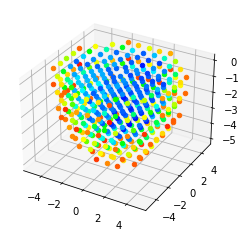

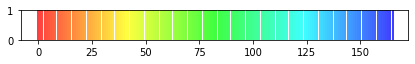

In [50]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()

In [51]:
mask = (((cos_alpha*y_grid-sin_alpha*z_grid)**2 + (cos_alpha*cos_beta*z_grid-sin_beta*x_grid+sin_alpha*cos_beta*y_grid)**2 < (cos_alpha*sin_beta*z_grid+sin_alpha*sin_beta*y_grid+cos_beta*x_grid)**2) & (0 < (cos_alpha*sin_beta*z_grid+sin_alpha*sin_beta*y_grid+cos_beta*x_grid)) & (range_r > (cos_alpha*sin_beta*z_grid+sin_alpha*sin_beta*y_grid+cos_beta*x_grid)))


ValueError: operands could not be broadcast together with shapes (1000,1) (21,21,21) 

In [99]:
x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
x_grid_reshaped = np.reshape(x_grid_tiled, (1000, 21,21,21)).T
np.shape(x_grid_reshaped)

(21, 21, 21, 1000)

In [110]:
cos_alpha = np.resize(np.ones(1000), (1000,1))

In [117]:
mask_3d = [x_grid_tiled * cos_alpha <= 1]

In [121]:
np.shape(x_mask)

(130,)

In [126]:
x_grid_gzero = x_grid_tiled[mask_3d]
x_grid_gzero_resized = np.resize(x_grid_gzero, (1000, int(len(x_grid_gzero)/1000)))

C:\Users\tlock\AppData\Local\Temp\ipykernel_13672\2659957666.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_grid_gzero = x_grid_tiled[mask_3d]


In [119]:
np.shape(x_grid_tiled[mask_3d])

C:\Users\tlock\AppData\Local\Temp\ipykernel_13672\1222837417.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.shape(x_grid_tiled[mask_3d])


(5292000,)

### Tiled grids mit vektorvertigen cos etc verküpfen

In [129]:
x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

In [131]:
mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask_3d = x_grid_tiled[mask_3d]
y_mask_3d = y_grid_tiled[mask_3d]
z_mask_3d = z_grid_tiled[mask_3d]

In [135]:
np.shape(x_mask_3d)

(92319,)

In [133]:
res = np.vstack([x_mask_3d, y_mask_3d, z_mask_3d])

In [134]:
np.shape(res)

(3, 92319)

In [136]:
x,y,z = res

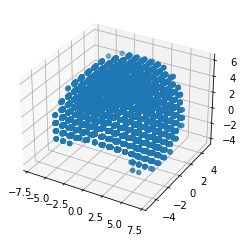

In [138]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

ax.scatter(x,y,z)

In [1]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask_3d = x_grid_tiled[mask_3d]
y_mask_3d = y_grid_tiled[mask_3d]
z_mask_3d = z_grid_tiled[mask_3d]

In [2]:
np.shape(x_mask_3d)

(130855,)

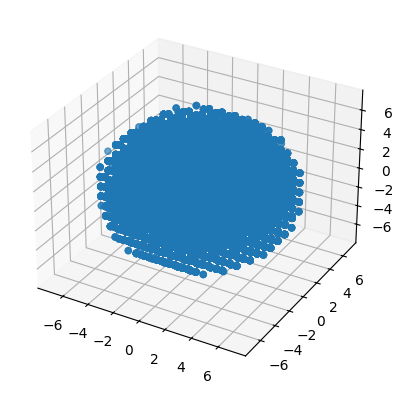

In [3]:
res = np.vstack([x_mask_3d, y_mask_3d, z_mask_3d])

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
x,y,z = res
ax.scatter(x,y,z)

In [4]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))


In [ ]:
x_mask_3d = x_grid_tiled[mask_3d]
y_mask_3d = y_grid_tiled[mask_3d]
z_mask_3d = z_grid_tiled[mask_3d]

In [5]:
np.shape(mask_3d)

(1000, 9261)

In [34]:
x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
z_mask = np.where(mask_3d, z_grid_tiled, np.nan)
res = np.reshape(np.vstack([x_mask, y_mask, z_mask]), (1000,3,np.shape(x_mask)[1]))

In [36]:
res = np.array([x_mask, y_mask, z_mask])
np.shape(res)

(3, 1000, 9261)

In [38]:
res[:,0,:].T

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [43]:
def get_Duplicates(data):
    _dict_duplicates = {}
    for lst_for in data:
        if _dict_duplicates.get(str(lst_for)) == None:
            _dict_duplicates.update({str(lst_for):1})
        else:
            _dict_duplicates[str(lst_for)] += 1
    return _dict_duplicates

In [45]:
dict_duplicates = get_Duplicates(res[:,0,:].T)
dict_duplicates

{'[nan nan nan]': 9130,
 '[-5. -3. -2.]': 1,
 '[-5. -3. -1.]': 1,
 '[-4. -3. -3.]': 1,
 '[-4. -3. -2.]': 1,
 '[-3. -3. -5.]': 1,
 '[-3. -3. -4.]': 1,
 '[-3. -3. -3.]': 1,
 '[-6. -2.  0.]': 1,
 '[-5. -2. -2.]': 1,
 '[-5. -2. -1.]': 1,
 '[-4. -2. -3.]': 1,
 '[-4. -2. -2.]': 1,
 '[-4. -2. -1.]': 1,
 '[-3. -2. -4.]': 1,
 '[-3. -2. -3.]': 1,
 '[-3. -2. -2.]': 1,
 '[-3. -2. -1.]': 1,
 '[-2. -2. -6.]': 1,
 '[-2. -2. -5.]': 1,
 '[-2. -2. -4.]': 1,
 '[-2. -2. -3.]': 1,
 '[-2. -2. -2.]': 1,
 '[-6. -1.  0.]': 1,
 '[-5. -1. -1.]': 1,
 '[-5. -1.  0.]': 1,
 '[-4. -1. -3.]': 1,
 '[-4. -1. -2.]': 1,
 '[-4. -1. -1.]': 1,
 '[-4. -1.  0.]': 1,
 '[-3. -1. -4.]': 1,
 '[-3. -1. -3.]': 1,
 '[-3. -1. -2.]': 1,
 '[-3. -1. -1.]': 1,
 '[-3. -1.  0.]': 1,
 '[-2. -1. -5.]': 1,
 '[-2. -1. -4.]': 1,
 '[-2. -1. -3.]': 1,
 '[-2. -1. -2.]': 1,
 '[-2. -1. -1.]': 1,
 '[-1. -1. -4.]': 1,
 '[-1. -1. -3.]': 1,
 '[-1. -1. -2.]': 1,
 '[-1. -1. -1.]': 1,
 '[-6.  0.  0.]': 1,
 '[-5.  0. -1.]': 1,
 '[-5.  0.  0.]': 1,
 '[-4.  0.

In [47]:
reshaped_res = np.reshape(res, (1000,3,np.shape(res)[-1]))
reshaped_duplicates = get_Duplicates(reshaped_res[0,:,:].T)
reshaped_duplicates

{'[nan nan nan]': 8925,
 '[nan -6. nan]': 4,
 '[-5. nan nan]': 8,
 '[-4. nan nan]': 6,
 '[-3. nan nan]': 10,
 '[-6. nan nan]': 4,
 '[nan -5. nan]': 17,
 '[-5. -5. nan]': 6,
 '[-4. -4. nan]': 19,
 '[nan -4. nan]': 26,
 '[-2. nan nan]': 23,
 '[-3. -3. nan]': 23,
 '[nan -3. nan]': 17,
 '[-2. -2. nan]': 10,
 '[nan -2. nan]': 7,
 '[-1. nan nan]': 19,
 '[-1. -1. nan]': 3,
 '[nan -1. nan]': 1,
 '[nan nan  0.]': 21,
 '[nan nan  1.]': 30,
 '[nan nan  2.]': 24,
 '[nan nan  3.]': 25,
 '[nan nan  4.]': 15,
 '[nan nan  5.]': 5,
 '[nan nan  6.]': 5,
 '[nan nan -1.]': 8}

In [48]:
reshaped_res = np.swapaxes(res, 0,1)
reshaped_duplicates = get_Duplicates(reshaped_res[0,:,:].T)
reshaped_duplicates

{'[nan nan nan]': 9130,
 '[-5. -3. -2.]': 1,
 '[-5. -3. -1.]': 1,
 '[-4. -3. -3.]': 1,
 '[-4. -3. -2.]': 1,
 '[-3. -3. -5.]': 1,
 '[-3. -3. -4.]': 1,
 '[-3. -3. -3.]': 1,
 '[-6. -2.  0.]': 1,
 '[-5. -2. -2.]': 1,
 '[-5. -2. -1.]': 1,
 '[-4. -2. -3.]': 1,
 '[-4. -2. -2.]': 1,
 '[-4. -2. -1.]': 1,
 '[-3. -2. -4.]': 1,
 '[-3. -2. -3.]': 1,
 '[-3. -2. -2.]': 1,
 '[-3. -2. -1.]': 1,
 '[-2. -2. -6.]': 1,
 '[-2. -2. -5.]': 1,
 '[-2. -2. -4.]': 1,
 '[-2. -2. -3.]': 1,
 '[-2. -2. -2.]': 1,
 '[-6. -1.  0.]': 1,
 '[-5. -1. -1.]': 1,
 '[-5. -1.  0.]': 1,
 '[-4. -1. -3.]': 1,
 '[-4. -1. -2.]': 1,
 '[-4. -1. -1.]': 1,
 '[-4. -1.  0.]': 1,
 '[-3. -1. -4.]': 1,
 '[-3. -1. -3.]': 1,
 '[-3. -1. -2.]': 1,
 '[-3. -1. -1.]': 1,
 '[-3. -1.  0.]': 1,
 '[-2. -1. -5.]': 1,
 '[-2. -1. -4.]': 1,
 '[-2. -1. -3.]': 1,
 '[-2. -1. -2.]': 1,
 '[-2. -1. -1.]': 1,
 '[-1. -1. -4.]': 1,
 '[-1. -1. -3.]': 1,
 '[-1. -1. -2.]': 1,
 '[-1. -1. -1.]': 1,
 '[-6.  0.  0.]': 1,
 '[-5.  0. -1.]': 1,
 '[-5.  0.  0.]': 1,
 '[-4.  0.

In [ ]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

result = np.swapaxes(np.array([x_mask, y_mask, z_mask]), 0,1)




In [52]:
from Test_lib import *

def kegel_meshgrid_where(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # y = np.copy(x)
    # z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
    y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
    z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

    result = np.swapaxes(np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord]), 0,1)
    return result



In [55]:
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0


kegel = np.array(kegel_meshgrid_where(9, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))



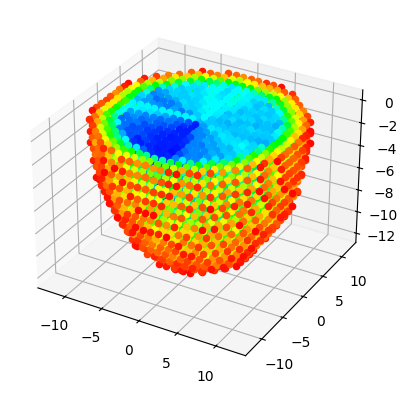

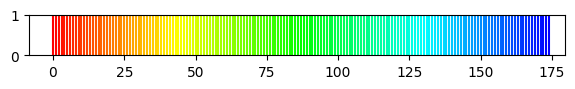

In [57]:
dict_duplicates, sorted_dict_duplicates = get_Duplicates_new(kegel)
# sorted_dict_duplicates = sorted(dict_duplicates.items(), key = lambda x:x[1])
plot_data(dict_duplicates, sorted_dict_duplicates, 100,100,0)
plt.show()

## Funktioniert gut, aber langsam, kann es mit numba kompatibel gemacht werden?


In [59]:
from numba import jit, int32

def kegel_meshgrid(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    return where_func(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)



@jit(nopython=True)
def where_func(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
    y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
    z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

    result = np.swapaxes(np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord]), 0,1)
    return result

In [60]:
########### Test zufällige winkel
number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))

lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

x_offset, y_offset, z_offset = 0,0,0


kegel = np.array(kegel_meshgrid(9, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUse of unsupported NumPy function 'numpy.tile' or unsupported use of the function.
[1m
File "C:\Users\tlock\AppData\Local\Temp\ipykernel_33180\3538877034.py", line 21:[0m
[1mdef where_func(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    <source elided>
    sin_beta = np.sin(beta)
[1m    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at C:\Users\tlock\AppData\Local\Temp\ipykernel_33180\3538877034.py (21)[0m
[1m
File "C:\Users\tlock\AppData\Local\Temp\ipykernel_33180\3538877034.py", line 21:[0m
[1mdef where_func(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    <source elided>
    sin_beta = np.sin(beta)
[1m    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
[0m    [1m^[0m[0m


### Numba ist nicht mit np.tile kompatibel, evlt kann ich die funtion aber mit np.repeat ersetzten

In [61]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

x_grid_tiled = x_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
y_grid_tiled = y_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
z_grid_tiled = z_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T





(1000, 9261)

In [75]:
x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
x_grid_tiled1 = x_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
np.all(x_grid_tiled == x_grid_tiled1)

True

In [1]:
from Test_lib import *
from numba import jit, int32

def kegel_meshgrid(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    x_mask, y_mask, z_mask = where_func(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)
    return combnine(x_mask, y_mask, z_mask)


@jit(nopython=True, cache=True)
def where_func(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    x_grid_tiled = x_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
    y_grid_tiled = y_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
    z_grid_tiled = z_grid.flatten().repeat(len(alpha)).reshape((-1, len(alpha))).T
    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan) + x_koord
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan) + y_koord
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan) + z_koord

    # result = np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord])
    # result = np.swapaxes(result, 0,1)
    # return result
    return (x_mask, y_mask, z_mask)

def combnine(x_mask, y_mask, z_mask):
    result = np.array([x_mask, y_mask, z_mask])
    result = np.swapaxes(result, 0,1)
    return result

# Jit Funktioniert... aber macht es einen großen Unterschied?

In [2]:
from Test_lib import *


def indizes_des_Kegels(limit=25, Offset_i=12, Offset_j=12, Offset_k=12, limit_r=7, alpha=0, beta=0):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)*(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    
    _Index_lst_im_Kegel =[[i+Offset_i,j+Offset_j,k+Offset_k] 
        for i in range(-limit_r*2 if limit_r*2 < Offset_i else -Offset_i, limit_r*2 if limit_r*2 < limit-Offset_i else limit-Offset_i) 
        for j in range(-limit_r*2 if limit_r*2 < Offset_j else -Offset_j, limit_r*2 if limit_r*2 < limit-Offset_j else limit-Offset_j) 
        for k in range(-limit_r*2 if limit_r*2 < Offset_k else -Offset_k, limit_r*2 if limit_r*2 < limit-Offset_k else limit-Offset_k) 
        if (cos_alpha*sin_beta*k+sin_alpha*sin_beta*j+cos_beta*i) <= limit_r
        if (cos_alpha*j-sin_alpha*k)**2 + (cos_alpha*cos_beta*k-sin_beta*i+sin_alpha*cos_beta*j)**2 < (cos_alpha*sin_beta*k+sin_alpha*sin_beta*j+cos_beta*i)**2
        if (cos_alpha*sin_beta*k+sin_alpha*sin_beta*j+cos_beta*i) > 0
        ]  
    
    return _Index_lst_im_Kegel




def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result

def kegel_meshgrid_where(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # y = np.copy(x)
    # z = np.copy(x)
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    x_grid_tiled = np.tile(x_grid.flatten(), (len(alpha), 1))
    y_grid_tiled = np.tile(y_grid.flatten(), (len(alpha), 1))
    z_grid_tiled = np.tile(z_grid.flatten(), (len(alpha), 1))

    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

    result = np.swapaxes(np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord]), 0,1)
    return result


In [4]:
from time import gmtime, strftime
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

print(f"Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in {number_of_winkel} zufälligen Richtungen:\n")

# Alte Version 1
# start_time1 = time.time()
# for i in range(number_of_winkel):
#     indizes_des_Kegels_lst1 = []
#     for alpha_w, beta_w in zip(lst_winkel_b[i],lst_winkel_a[i]):
#         indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=1, alpha=alpha_w, beta=beta_w))

# duration1 = time.time() - start_time1

# print(duration1)
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=5)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print("Alte Versoin mit Ungenauigkeiten: \t\t", duration2)


# Neue Version 1
start_time2 = time.time()

kegel = koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Nicht mit Jit kompatible Version: \t\t",duration2)

# Neue Version 2
start_time2 = time.time()
kegel_ohne = kegel_meshgrid_where(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version aber ohne jit: \t",duration2)
# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)



Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in 1000 zufälligen Richtungen:

Alte Versoin mit Ungenauigkeiten: 		 0.007042646408081055
Nicht mit Jit kompatible Version: 		 0.1179656982421875
Mit Jit kompatible Version aber ohne jit: 	 0.8674538135528564
Mit Jit kompatible Version und jit Optimiert: 	 0.3324267864227295


In [ ]:
kegel_jit = np.array(kegel_meshgrid(9, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b))

### Auf Tablet, zeitvergleich

In [149]:
from time import gmtime, strftime
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

print(f"Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in {number_of_winkel} zufälligen Richtungen:\n")

# Alte Version 1
# start_time1 = time.time()
# for i in range(number_of_winkel):
#     indizes_des_Kegels_lst1 = []
#     for alpha_w, beta_w in zip(lst_winkel_b[i],lst_winkel_a[i]):
#         indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=1, alpha=alpha_w, beta=beta_w))

# duration1 = time.time() - start_time1

# print(duration1)
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=5)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print("Alte Versoin mit Ungenauigkeiten: \t\t", duration2)


# Neue Version 1
start_time2 = time.time()

kegel = koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Nicht mit Jit kompatible Version: \t\t",duration2)

# Neue Version 2
start_time2 = time.time()
kegel_ohne = kegel_meshgrid_where(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version aber ohne jit: \t",duration2)
# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)



Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in 1000 zufälligen Richtungen:

Alte Versoin mit Ungenauigkeiten: 		 0.053122520446777344


Nicht mit Jit kompatible Version: 		 0.7189698219299316
Mit Jit kompatible Version aber ohne jit: 	 2.69435977935791
Mit Jit kompatible Version und jit Optimiert: 	 2.062593698501587


## njit ist wohl besser, zeitvergleich

In [5]:
from Test_lib import *
from numba import njit

def kegel_meshgrid(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-int(np.ceil(range_r*1.42)), int(np.ceil(range_r*1.42)), int(np.ceil(range_r*1.42)*2+1))

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    x_mask, y_mask, z_mask = where_func(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)
    return combnine(x_mask, y_mask, z_mask)


@njit(cache=True)
def where_func(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    x_grid_tiled = x_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
    y_grid_tiled = y_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
    z_grid_tiled = z_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan) + x_koord
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan) + y_koord
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan) + z_koord

    # result = np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord])
    # result = np.swapaxes(result, 0,1)
    # return result
    return (x_mask, y_mask, z_mask)

def combnine(x_mask, y_mask, z_mask):
    result = np.array([x_mask, y_mask, z_mask])
    result = np.swapaxes(result, 0,1)
    return result

In [ ]:
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

In [7]:
from time import gmtime, strftime
########### Test zufällige winkel
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

print(f"Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in {number_of_winkel} zufälligen Richtungen:\n")

# Alte Version 1
# start_time1 = time.time()
# for i in range(number_of_winkel):
#     indizes_des_Kegels_lst1 = []
#     for alpha_w, beta_w in zip(lst_winkel_b[i],lst_winkel_a[i]):
#         indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=1, alpha=alpha_w, beta=beta_w))

# duration1 = time.time() - start_time1

# print(duration1)
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=5)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print("Alte Versoin mit Ungenauigkeiten: \t\t", duration2)


# Neue Version 1
start_time2 = time.time()

kegel = koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Nicht mit Jit kompatible Version: \t\t",duration2)

# Neue Version 2
start_time2 = time.time()
kegel_ohne = kegel_meshgrid_where(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version aber ohne jit: \t",duration2)
# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)



Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in 1000 zufälligen Richtungen:

Alte Versoin mit Ungenauigkeiten: 		 0.0040073394775390625
Nicht mit Jit kompatible Version: 		 0.14876866340637207
Mit Jit kompatible Version aber ohne jit: 	 0.8576107025146484
Mit Jit kompatible Version und jit Optimiert: 	 0.1697096824645996


# Ist np.einsum eine bessere alternative?

In [ ]:
np.einsum()


In [9]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
limit_kegel = int(np.ceil(range_r*1.42))
x = np.linspace(-limit_kegel, limit_kegel, limit_kegel*2+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)


x_grid_tiled = x_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
y_grid_tiled = y_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
z_grid_tiled = z_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T


mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

result = np.swapaxes(np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord]), 0,1)

In [10]:
cos_alpha = np.cos(alpha).T
sin_alpha = np.sin(alpha).T
cos_beta = np.cos(beta).T
sin_beta = np.sin(beta).T

In [11]:
x_grid_repeat = x_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))
y_grid_repeat = y_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))
z_grid_repeat = z_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))

x_rot = (np.multiply(cos_alpha*sin_beta,z_grid_repeat)+np.multiply(sin_alpha*sin_beta,y_grid_repeat)+np.multiply(cos_beta,x_grid_repeat))
y_rot = (np.multiply(y_grid_repeat,cos_alpha)-np.multiply(sin_alpha,z_grid_repeat))
z_rot = (np.multiply(cos_alpha*cos_beta,z_grid_repeat)-np.multiply(sin_beta,x_grid_repeat)+np.multiply(sin_alpha*cos_beta,y_grid_repeat))

mask = (y_rot**2+z_rot**2 < x_rot**2) & (x_rot < range_r) & (x_rot > 0)

In [19]:
np.shape(np.array([mask.nonzero()]))

(1, 4, 130748)

In [78]:
res = np.ones((len(alpha), 3, int(limit_kegel**3/2+1)))*np.nan
for i in range(np.shape(mask)[-1]):
    res[i,0,:np.shape(x_grid[mask[:,:,:,i]])[-1]] = x_grid[mask[:,:,:,i]]
    res[i,1,:np.shape(y_grid[mask[:,:,:,i]])[-1]] = y_grid[mask[:,:,:,i]]
    res[i,2,:np.shape(z_grid[mask[:,:,:,i]])[-1]] = z_grid[mask[:,:,:,i]]

In [80]:
dup, sort_dup = get_Duplicates_new(res)

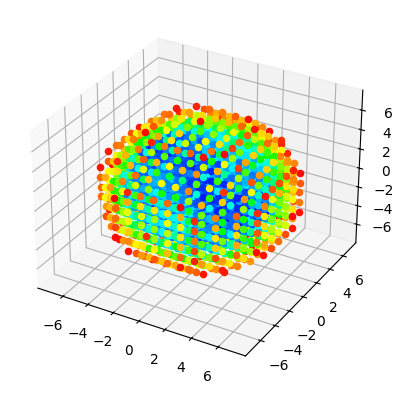

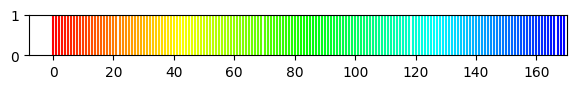

In [84]:
plot_data(dup, sort_dup, 10,10,10)

In [89]:
from Test_lib import *
from numba import njit

def kegel_meshgrid_repeat(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-int(np.ceil(range_r*1.42)), int(np.ceil(range_r*1.42)), int(np.ceil(range_r*1.42)*2+1))

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    # test_x = np.copy(x_grid)
    mask = where_func_repeat(x_grid, y_grid, z_grid, range_r, alpha, beta, x_koord, y_koord, z_koord)
    return combnine_repeat(x_grid,y_grid,z_grid,mask)


@njit(cache=True)
def where_func_repeat(x_grid=np.array([[],[],[]]), y_grid=np.array([[],[],[]]), z_grid=np.array([[],[],[]]), range_r=5, alpha=np.array([]), beta=np.array([]),x_koord=0, y_koord=0, z_koord=0):  
    cos_alpha = np.cos(alpha).T
    sin_alpha = np.sin(alpha).T
    cos_beta = np.cos(beta).T
    sin_beta = np.sin(beta).T
    x_grid_repeat = x_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))
    y_grid_repeat = y_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))
    z_grid_repeat = z_grid.repeat(len(alpha)).reshape(*np.shape(x_grid),len(alpha))

    x_rot = (np.multiply(cos_alpha*sin_beta,z_grid_repeat)+np.multiply(sin_alpha*sin_beta,y_grid_repeat)+np.multiply(cos_beta,x_grid_repeat))
    y_rot = (np.multiply(y_grid_repeat,cos_alpha)-np.multiply(sin_alpha,z_grid_repeat))
    z_rot = (np.multiply(cos_alpha*cos_beta,z_grid_repeat)-np.multiply(sin_beta,x_grid_repeat)+np.multiply(sin_alpha*cos_beta,y_grid_repeat))

    mask = (y_rot**2+z_rot**2 < x_rot**2) & (x_rot < range_r) & (x_rot > 0)
    return (mask)

def combnine_repeat(x_grid,y_grid,z_grid,mask):
    res = np.ones((len(alpha), 3, int(limit_kegel**3/2+1)))*np.nan
    for i in range(np.shape(mask)[-1]):
        res[i,0,:np.shape(x_grid[mask[:,:,:,i]])[-1]] = x_grid[mask[:,:,:,i]]
        res[i,1,:np.shape(y_grid[mask[:,:,:,i]])[-1]] = y_grid[mask[:,:,:,i]]
        res[i,2,:np.shape(z_grid[mask[:,:,:,i]])[-1]] = z_grid[mask[:,:,:,i]]
    return res

In [92]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

kegel_jit = kegel_meshgrid_repeat(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

In [4]:
from Test_lib import *
########### Test zufällige winkel
number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)
kegel_jit = kegel_meshgrid_repeat(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

print(f"Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in {number_of_winkel} zufälligen Richtungen:\n")

# Alte Version 1
# start_time1 = time.time()
# for i in range(number_of_winkel):
#     indizes_des_Kegels_lst1 = []
#     for alpha_w, beta_w in zip(lst_winkel_b[i],lst_winkel_a[i]):
#         indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=1, alpha=alpha_w, beta=beta_w))

# duration1 = time.time() - start_time1

# print(duration1)
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=5)
indizes_des_Kegels_lst3 = rotation_kegel(x,y,z,2,2,2,lst_winkel_a,lst_winkel_b)

duration2 = time.time() - start_time2
print("Alte Versoin mit Ungenauigkeiten: \t\t", duration2)


# Neue Version 1
start_time2 = time.time()

kegel = koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Nicht mit Jit kompatible Version: \t\t",duration2)

# Neue Version 2
start_time2 = time.time()
kegel_ohne = kegel_meshgrid_where(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version aber ohne jit: \t",duration2)
# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)

# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid_repeat(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)



Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in 10000 zufälligen Richtungen:

Alte Versoin mit Ungenauigkeiten: 		 0.04328751564025879
Nicht mit Jit kompatible Version: 		 1.102367639541626
Mit Jit kompatible Version aber ohne jit: 	 20.279046535491943
Mit Jit kompatible Version und jit Optimiert: 	 4.784121751785278
Mit Jit kompatible Version und jit Optimiert: 	 5.582500457763672


In [32]:
x = np.arange(-10,10, 1)
y = np.copy(x)
z = np.copy(x)
mask = (x**2 < y**2 + z**2) & (x<5) & (x>0)


array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [38]:
xm,ym,zm = np.meshgrid(x,y,z)
mask = (xm**2 < ym**2 + zm**2) & (xm<5) & (xm>0)
xm[mask]

array([1, 1, 1, ..., 4, 4, 4])

In [44]:
mask.shape

(20, 20, 20)

In [20]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0


cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)
limit_kegel = int(np.ceil(range_r*1.42))
x = np.linspace(-limit_kegel, limit_kegel, limit_kegel*2+1)
y = np.copy(x)
z = np.copy(x)
length = (2*range_r)**3

# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)


x_grid_tiled = x_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
y_grid_tiled = y_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T
z_grid_tiled = z_grid.ravel().repeat(len(alpha)).reshape((-1, len(alpha))).T


mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
z_mask = np.where(mask_3d, z_grid_tiled, np.nan)

result = np.swapaxes(np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord]), 0,1)

# Versuch der Paraleisierung des Trivialen Ansatzes, Listcomprehensions

In [2]:
from numba import njit, int32
from Test_lib import *

@njit(parallel=True)
def indizes_des_Kegels(Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    # Größe der N**3 Matrix
    # limit = 25
    # gedrehtes i, i k:
    # i = (np.cos(beta)(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
    # j = (np.sin(beta)(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
    # k = (np.cos(alpha)*k-np.sin(alpha)*i)
    length = (2*range_r)**3
    Range_of = int(range_r*1.42+1)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in range(-Range_of, Range_of) 
            for j in range(-Range_of, Range_of) 
            for k in range(-Range_of, Range_of) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i))
            if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
            if (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        #print(np.shape(data))
        if i == 0:
            # print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)
        
        
    return result

In [3]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 0,0,0

kegel = indizes_des_Kegels(x_koord, y_koord, z_koord, range_r, alpha, beta)

: 

# Neue Versionen sind extrem langsam, alternativer Vorschlag: Kombination der Schnellsten und Neuen Version

- Zunächst werden die Werte des Rotierten Kegels auf 3 Arten gerundet:
    - Normal
    - Abgerundet
    - Hochgerundet
Und anschließend in eine Liste gefügt und Duplikate gelöscht.

Anschließend werden die Punkte geplottet und überprüft ob das ergebnis alste Muster aufweist:
- Falls Nein, keine alten Muster erkennbar:
    - Perfekt, keine weitere Arbeit notwendig
- Falls Ja, alste Muster treten auf:
    - Liste wird als Input für die neuen Versionen benutzt und die Punkte auf die Kegelkonditionen geprüft.
        - Da die Anzahl der Punkte deutlich keiner ist sollte dies schneller sein als die anderen Neuen Versionen

In [1]:
from Test_lib import *


# def koords_in_kegel_x(range_r = 4):
#     # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 


#     return (x_mask, y_mask, z_mask)


def Kegel_Hybrid(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), no_dup=False):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]



    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result

In [14]:


number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 3
x_koord, y_koord, z_koord = 0,0,0

result = Kegel_Hybrid(x_koord, y_koord, z_koord, range_r, alpha, beta)

In [15]:
result.shape

(1, 3, 10)

In [16]:
Ceil = np.ceil(result)
Floor = np.floor(result)
Round = np.round(result)

x_possible = [Ceil[:,0,:], Floor[:,0,:], Round[:,0,:]]
y_possible = [Ceil[:,1,:], Floor[:,1,:], Round[:,1,:]]
z_possible = [Ceil[:,2,:], Floor[:,2,:], Round[:,2,:]]


In [17]:
result.shape[2]*27

270

In [18]:
res = np.empty((*result.shape[:2], result.shape[2]*27))
print(res.shape)
counter = 0
for i in x_possible:
    for j in y_possible:
        for k in z_possible:
            res[:,:,counter*result.shape[2]:(counter+1)*result.shape[2]] = np.swapaxes(np.array([i,j,k]), 0,1)
            counter += 1

(1, 3, 270)


In [19]:
reshaped.shape

(100, 810)

In [20]:
reshaped = np.array(res.reshape((res.shape[0], -1)))
res1 = np.copy(res)
for i in range(res.shape[0]):
    # print(reshaped.shape)
    uniques = np.unique(reshaped[i], axis=0, return_index = True)[1]
    duplicate_mask = np.isin(np.arange(reshaped[i].shape[0]), uniques)
    # print(duplicate_mask.shape)
    res1[i] = np.where(duplicate_mask.reshape(3,-1),np.nan, res[i])

In [21]:
res1[0].shape

(3, 270)

In [22]:

temp_dict = dict(Counter(map(tuple, res1[0].T)))

In [23]:
temp_dict

{(nan, -1.0, -0.0): 1,
 (nan, -1.0, -0.0): 1,
 (-1.0, -1.0, -1.0): 16,
 (nan, -0.0, -0.0): 1,
 (-2.0, -0.0, -0.0): 10,
 (-1.0, -0.0, -1.0): 16,
 (-2.0, nan, -0.0): 1,
 (-1.0, 1.0, -1.0): 4,
 (-1.0, 1.0, -2.0): 6,
 (-2.0, -1.0, -1.0): 21,
 (-1.0, -1.0, -2.0): 13,
 (-0.0, -0.0, -1.0): 4,
 (-2.0, -0.0, -1.0): 21,
 (-1.0, -0.0, -2.0): 15,
 (-2.0, 1.0, -1.0): 16,
 (-1.0, 1.0, -3.0): 2,
 (-2.0, -1.0, -0.0): 15,
 (-2.0, -2.0, -0.0): 6,
 (-1.0, -2.0, -0.0): 1,
 (-1.0, -2.0, -1.0): 6,
 (-0.0, -1.0, -0.0): 1,
 (-2.0, -2.0, -1.0): 8,
 (-1.0, -2.0, -2.0): 8,
 (-0.0, -1.0, -1.0): 2,
 (-1.0, 0.0, -3.0): 4,
 (-1.0, -1.0, -0.0): 3,
 (-0.0, -0.0, -0.0): 1,
 (-2.0, 1.0, -0.0): 3,
 (nan, -1.0, -0.0): 1,
 (-1.0, -0.0, -0.0): 4,
 (-3.0, -0.0, -0.0): 5,
 (-3.0, 1.0, -0.0): 2,
 (-2.0, 1.0, -2.0): 6,
 (-3.0, -1.0, -1.0): 3,
 (-2.0, -1.0, -2.0): 8,
 (-3.0, -0.0, -1.0): 4,
 (-2.0, -0.0, -2.0): 12,
 (-3.0, 1.0, -1.0): 4,
 (-2.0, 1.0, -3.0): 1,
 (-3.0, -1.0, -0.0): 5,
 (-3.0, -2.0, -0.0): 2,
 (-3.0, -2.0, -1.0): 

Filtert nicht nur die gewollten ZEILEN sondern auch einzelne Koordinaten

In [24]:
unique_mask

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
unique_mask.shape

(270,)

In [26]:
unique_tiled = np.tile(unique_mask.ravel() , (3,1)).T
np.all(unique_tiled[:,0] == unique_mask)

True

In [27]:
res1 = np.swapaxes(res, 1,2)
for j,i in enumerate(res1):
    unique_ = np.unique(i.T, axis=0, return_index= True)[1]
    # print(unique_, i.shape[1])
    unique_mask = np.isin(np.arange(i.shape[0]), np.sort(unique_))
    unique_tiled = np.tile(unique_mask.ravel() , (3,1)).T
    res1[j,:,:] = np.where(unique_tiled,np.nan, res1[j])
# .reshape(3,-1),np.nan, res[i]

In [28]:
duplicates = dict(Counter(map(tuple, res1[0])))
len(duplicates.values())

42

In [29]:
get_Duplicates_new(np.swapaxes(res1, 1,2))

({'(-0.0, -0.0, -0.0)': 2,
  '(-2.0, -0.0, -0.0)': 8,
  '(-1.0, -0.0, -1.0)': 14,
  '(-2.0, 1.0, -0.0)': 4,
  '(-1.0, 1.0, -1.0)': 4,
  '(-1.0, 1.0, -2.0)': 6,
  '(-2.0, -1.0, -1.0)': 21,
  '(-1.0, -1.0, -1.0)': 15,
  '(-1.0, -1.0, -2.0)': 13,
  '(-0.0, -0.0, -1.0)': 4,
  '(-2.0, -0.0, -1.0)': 13,
  '(-1.0, -0.0, -2.0)': 6,
  '(-2.0, 1.0, -1.0)': 16,
  '(-1.0, 1.0, -3.0)': 2,
  '(-2.0, -1.0, -0.0)': 15,
  '(-2.0, -2.0, -0.0)': 6,
  '(-1.0, -2.0, -0.0)': 1,
  '(-1.0, -2.0, -1.0)': 6,
  '(-0.0, -1.0, -0.0)': 1,
  '(-2.0, 0.0, -0.0)': 2,
  '(-1.0, 0.0, -1.0)': 2,
  '(-1.0, 0.0, -2.0)': 9,
  '(-2.0, -2.0, -1.0)': 8,
  '(-1.0, -2.0, -2.0)': 8,
  '(-0.0, -1.0, -1.0)': 2,
  '(-2.0, 0.0, -1.0)': 8,
  '(-1.0, 0.0, -3.0)': 4,
  '(-1.0, -1.0, -0.0)': 3,
  '(-3.0, -1.0, -0.0)': 6,
  '(-1.0, -0.0, -0.0)': 4,
  '(-3.0, -0.0, -0.0)': 4,
  '(-3.0, 1.0, -0.0)': 2,
  '(-2.0, 1.0, -2.0)': 6,
  '(-3.0, -1.0, -1.0)': 3,
  '(-2.0, -1.0, -2.0)': 8,
  '(-3.0, -0.0, -1.0)': 2,
  '(-2.0, -0.0, -2.0)': 6,
  '(-3

In [73]:
res1.shape

(100, 270, 3)

In [30]:
unique_rows

NameError: name 'unique_rows' is not defined

In [93]:
result_list.shape

(27, 3, 1000, 258)

In [94]:
result.shape

(3, 1000, 6966)

In [78]:
intervall = range(10)
for i,j,k in zip(intervall,intervall,intervall):
    print(i,j,k)

0 0 0
1 1 1
2 2 2
3 3 3
4 4 4
5 5 5
6 6 6
7 7 7
8 8 8
9 9 9


In [77]:
result.shape

(10000, 2322)

In [47]:
Test1 = np.round(kegel)
Test2 = np.ceil(kegel)
Test3 = np.floor(kegel)

In [48]:
Test1.shape

(10000, 3, 258)

In [49]:
Test = np.array(np.concatenate((Test1, Test2, Test3), axis=2))

In [50]:
Unique_test = np.unique(Test, axis=2)

In [51]:
Unique_test.shape

(10000, 3, 774)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

ax.scatter(*Unique_test[1,:,:])

In [32]:
dict_duplicates = get_Duplicates_new(Unique_test)

NameError: name 'Unique_test' is not defined

In [31]:
plot_data(*dict_duplicates, 20,20,0)

NameError: name 'dict_duplicates' is not defined

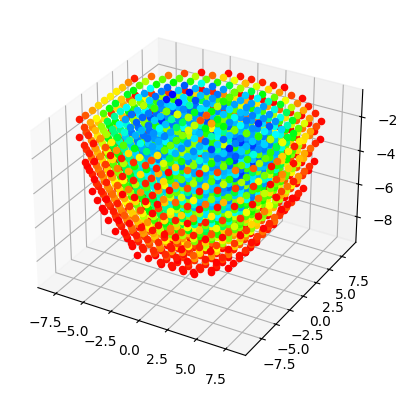

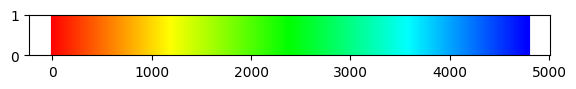

In [56]:
plot_data(*dict_duplicates, 20,20,-1)

## Alternative Hybride lösung, Grenzen für x,y,z werden durch Matrixmutiplikation bestimmt um den Würfel des Meshgrids zu verkleinern

In [93]:
from Test_lib import *

def get_limits(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), no_dup=False):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    # # Filtere Punkte innerhalb des Kegels
    x_mask = np.array([range_r])
    y_mask = np.array([0.7071067812*range_r])
    z_mask = np.array([0.7071067812*range_r])

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result

number_of_winkel = 100
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 10
x_koord, y_koord, z_koord = 0,0,0

result = get_limits(x_koord, y_koord, z_koord, range_r, alpha, beta)
result1 = Kegel_Hybrid(x_koord, y_koord, z_koord, range_r, alpha, beta)

In [95]:
result

array([[[ 10.58090047],
        [  8.81122987],
        [  3.2259531 ]],

       [[  6.0082924 ],
        [ -6.33957368],
        [ 11.12250997]],

       [[  0.96275105],
        [  6.81549785],
        [ 12.35403171]],

       [[  3.70061966],
        [  7.2844094 ],
        [-11.54308424]],

       [[  7.10156643],
        [-12.22730693],
        [  0.24641344]],

       [[  8.80985013],
        [  0.99561046],
        [-11.01795355]],

       [[ 12.15673588],
        [ -1.21558588],
        [  7.12292944]],

       [[  1.11964785],
        [ -5.48890995],
        [-12.98530925]],

       [[ -6.07512815],
        [ 11.95575984],
        [ -4.48916747]],

       [[ -7.91891847],
        [ 11.49157825],
        [ -2.28787225]],

       [[ -1.13656341],
        [ 13.69855642],
        [ -3.32532337]],

       [[  5.07927687],
        [ 13.12150553],
        [ -1.42374123]],

       [[  5.62327028],
        [ -9.37683115],
        [  8.96960807]],

       [[  5.89725594],
        [-12.8

In [99]:
np.max(result[0,2,:])

3.225953097029171

Die Maximia Stimmen überein

Jetzt müssen diese in die Grenzen eingesetz werden und untersucht werden wie viel zeit dies Spaart

In [1]:
from numba import njit, int32
from Test_lib import *



def get_limits(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), no_dup=False):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    # # Filtere Punkte innerhalb des Kegels
    x_mask = np.array([range_r, range_r])
    y_mask = np.array([0.7071067812*range_r, -0.7071067812*range_r])
    z_mask = np.array([0.7071067812*range_r, -0.7071067812*range_r])

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result



@njit
def indizes_des_Kegels(limits=np.array([[],[],[]]), Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # result = np.ones((alpha.shape[0], ))
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # x_lim_lower, x_lim_upper = 
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in range(-range_r*2, range_r*2) 
            for j in range(-range_r*2, range_r*2) 
            for k in range(-range_r*2, range_r*2) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i))
            if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
            if (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        #print(np.shape(data))
        # if i == 0:
        #     # print(length, np.shape(data)[1])
        #     padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
        #     # padding[:] = np.nan
        #     data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
        #     result = data_padded
        # else:
        #     # print(length, np.shape(data)[1])
        #     # print(length)
        #     padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
        #     # padding[:] = padding * np.nan
        #     data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
        #     result = np.concatenate((result, data_padded), axis=0)
        
        
    return result

In [11]:
np.floor(-1.5)

-2.0

In [49]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 10
x_koord, y_koord, z_koord = 0,0,0

limits = get_limits(x_koord, y_koord, z_koord, range_r, alpha, beta)
kegel = Kegel_Hybrid(x_koord, y_koord, z_koord, range_r, alpha, beta)

Offset_i=0
Offset_j=0
Offset_k=0

# Länge des Kegels
# limit_r = 10
# Offset des Kegels in x-Richtung
# Offset_i, Offset_j, Offset_k = 12,12,12
# alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
# Größe der N**3 Matrix
# limit = 25
# gedrehtes i, i k:
# i = (np.cos(beta)(np.cos(alpha)*i+np.sin(alpha)*k)-np.sin(beta)*j)
# j = (np.sin(beta)(np.cos(alpha)*i+np.sin(alpha)*k)+np.cos(beta)*j)
# k = (np.cos(alpha)*k-np.sin(alpha)*i)

In [50]:
np.min(kegel[0,0,:])

-1.9693752066689623

In [65]:
for i in kegel:
    print(np.max(i[1]), "\t", np.min(i[1]), i.shape)

11.913315497071153 	 0.8459698641363124 (3, 845)
11.712280351043955 	 -4.167248381854983 (3, 845)
3.486890822422571 	 -11.959672116758487 (3, 845)
11.743796117899056 	 -1.7943227334066876 (3, 845)
12.031659124799118 	 -0.2174865648333777 (3, 845)
6.504721243607621 	 -10.486247339868632 (3, 845)
-0.8530256513995849 	 -12.343426833220784 (3, 845)
4.611980944145671 	 -11.295041875988186 (3, 845)
8.027624634436608 	 -7.9927533135474 (3, 845)
7.778270510397481 	 -9.94946685913407 (3, 845)


In [66]:
limits[:,1,:]

array([[  4.75029651,  12.16910077],
       [  8.80628925,  -0.4229204 ],
       [  4.05755127, -13.47175271],
       [ -0.17550157,  11.230472  ],
       [  1.06900765,  12.05785075],
       [-10.52344745,   6.09952956],
       [-10.30725954,  -6.75325349],
       [ -9.06013096,   1.6345077 ],
       [ -7.06974298,   7.10848889],
       [  2.47657552,  -4.88901591]])

In [64]:
for limit in limits:
    print(np.max(limit[0]))

12.169100772442938
8.80628925151999
4.057551273820958
11.230472000805172
12.05785075478603
6.099529564324312
-6.753253486280463
1.634507700107048
7.108488894836911
2.4765755228367543


In [54]:
(limits[0,0,0] < 0) * np.floor(limits[0,0,0])

0.0

In [55]:
(np.min(limit[0]) < 0) * np.floor(np.min(limit[0])), (np.max(limit[0]) > 0) * np.ceil(np.max(limit[0]))
np.floor(np.min(limit[1])), np.ceil(np.max(limit[1]))
np.floor(np.min(limit[2])), np.ceil(np.max(limit[2]))

(-12.0, 7.0)

In [56]:
np.max(np.abs(limit[0]))

11.63888840159878

In [57]:

cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# result = np.ones((alpha.shape[0], ))
# for i in np.arange((np.min(limit[0]) < 0) * np.floor(np.min(limit[0])), (np.max(limit[0]) > 0) * np.ceil(np.max(limit[0]))) 
# for j in np.arange(np.floor(np.min(limit[1])), np.ceil(np.max(limit[1]))) 
# for k in np.arange(np.floor(np.min(limit[2])), np.ceil(np.max(limit[2]))) 
for i, ca, sa, cb, sb, limit in zip(range(cos_alpha.shape[0]), cos_alpha, sin_alpha, cos_beta, sin_beta, limits):
    data1 =[[i+Offset_i,j+Offset_j,k+Offset_k]  
        for i in np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
        for j in np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1) 
        for k in np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1) 
        if (0 < (ca*sb*k+sa*sb*j+cb*i))
        if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
        if (range_r > (ca*sb*k+sa*sb*j+cb*i))
        ] 
    data1 = np.array(data1).T
    #print(np.shape(data))

In [58]:
for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
    # x_lim_lower, x_lim_upper = 
    data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
        for i in range(-range_r*2, range_r*2) 
        for j in range(-range_r*2, range_r*2) 
        for k in range(-range_r*2, range_r*2) 
        if (0 < (ca*sb*k+sa*sb*j+cb*i))
        if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
        if (range_r > (ca*sb*k+sa*sb*j+cb*i))
        ] 
    data = np.array(data).T

In [59]:
data.shape

(3, 1047)

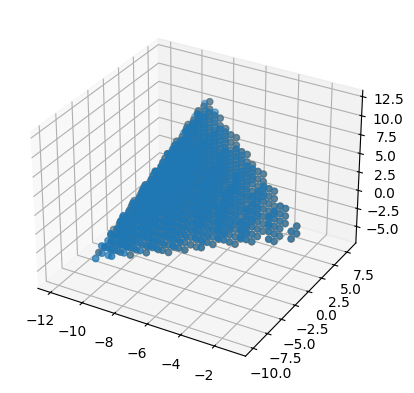

In [60]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")

ax.scatter(*data)
ax.scatter(*data1)

In [61]:
limit

array([[ -7.47422749, -11.6388884 ],
       [  2.47657552,  -4.88901591],
       [-11.74744641,   6.3744647 ]])

In [62]:
data.shape

(3, 1047)

In [63]:
data1.shape

(3, 916)

In [172]:
from numba import njit, int32
from Test_lib import *



def get_limits(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), R_Faktor = 0.7071067812):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    # # Filtere Punkte innerhalb des Kegels
    x_mask = np.array([range_r, range_r])
    y_mask = np.array([R_Faktor*range_r, -R_Faktor*range_r])
    z_mask = np.array([R_Faktor*range_r, -R_Faktor*range_r])

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result



@njit(cache = True)
def indizes_des_Kegels(limits=np.array([[],[],[]]), Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    length = range_r**4
    # result = np.ones((alpha.shape[0], ))
    # for i in np.arange((np.min(limit[0]) < 0) * np.floor(np.min(limit[0])), (np.max(limit[0]) > 0) * np.ceil(np.max(limit[0]))) 
    # for j in np.arange(np.floor(np.min(limit[1])), np.ceil(np.max(limit[1]))) 
    # for k in np.arange(np.floor(np.min(limit[2])), np.ceil(np.max(limit[2]))) 
    for i, ca, sa, cb, sb, limit in zip(range(cos_alpha.shape[0]), cos_alpha, sin_alpha, cos_beta, sin_beta, limits):
        data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
            for i in np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
            for j in np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1) 
            for k in np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1) 
            if (0 < (ca*sb*k+sa*sb*j+cb*i))
            if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
            if (range_r > (ca*sb*k+sa*sb*j+cb*i))
            ] 
        data = np.array(data).T
        # print(np.shape(data))
        if i == 0:
            print(length, np.shape(data)[1])
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = data_padded
        else:
            # print(length, np.shape(data)[1])
            # print(length)
            padding = np.zeros((3, int(length - np.shape(data)[1])), dtype=np.float64) * np.nan
            # padding[:] = padding * np.nan
            data_padded = np.reshape(np.concatenate((data , padding), axis=1), (1,3,int(length)))
            result = np.concatenate((result, data_padded), axis=0)
        
        
    return result
    # return

In [173]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

limits = get_limits(x_koord, y_koord, z_koord, range_r, alpha, beta)
kegel = indizes_des_Kegels(limits, x_koord, y_koord, z_koord, range_r, alpha, beta)

2401 356


#  Alte Version immernoch zu langsam

In [177]:
def Kegel_njit(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, x, x)
    result = np.array(kegel_where(x_grid, y_grid, z_grid, range_r, x_koord, y_koord, z_koord, alpha, beta))
    return np.swapaxes(result, 0, 1)

@njit(cache=True)
def kegel_where(x_grid, y_grid, z_grid, range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)

    # test_x = np.copy(x_grid)
    x_grid_tiled = np.repeat(x_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T
    y_grid_tiled = np.repeat(y_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T
    z_grid_tiled = np.repeat(z_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T

    mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
    x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
    y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
    z_mask = np.where(mask_3d, z_grid_tiled, np.nan)
    # result = np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord])
    return (x_mask+x_koord, y_mask+y_koord, z_mask+z_koord)

In [178]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0, 0, 0


kegel = Kegel_njit(range_r, x_koord, y_koord, z_koord, alpha, beta)


In [179]:
kegel.shape

(10, 3, 24389)

In [124]:
x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
# Erstelle das Gitter für x, y und z
x_grid, y_grid, z_grid = np.meshgrid(x, x, x)

cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print(cos_alpha,sin_alpha,cos_beta,sin_beta)

# test_x = np.copy(x_grid)
# x_grid_tiled = np.tile(x_grid.ravel(), (len(alpha), 1))
# y_grid_tiled = np.tile(y_grid.ravel(), (len(alpha), 1))
# z_grid_tiled = np.tile(z_grid.ravel(), (len(alpha), 1))

x_grid_tiled = np.repeat(x_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T
y_grid_tiled = np.repeat(y_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T
z_grid_tiled = np.repeat(z_grid.ravel(), (len(alpha))).reshape(-1,len(alpha)).T


mask_3d = (((cos_alpha*y_grid_tiled-sin_alpha*z_grid_tiled)**2 + (cos_alpha*cos_beta*z_grid_tiled-sin_beta*x_grid_tiled+sin_alpha*cos_beta*y_grid_tiled)**2 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)**2) & (0 < (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)) & (range_r > (cos_alpha*sin_beta*z_grid_tiled+sin_alpha*sin_beta*y_grid_tiled+cos_beta*x_grid_tiled)))
x_mask = np.where(mask_3d, x_grid_tiled, np.nan)
y_mask = np.where(mask_3d, y_grid_tiled, np.nan)
z_mask = np.where(mask_3d, z_grid_tiled, np.nan)
result = np.array([x_mask+x_koord, y_mask+y_koord, z_mask+z_koord])

In [137]:
asd = 

In [138]:
asdf = np.tile(x_grid.ravel(), (len(alpha), 1))

## Meshgrid im loop?

In [13]:
from numba import njit, int32
from Test_lib import *



def get_limits(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), R_Faktor = 0.7071067812):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha
    # # Filtere Punkte innerhalb des Kegels
    x_mask = np.array([range_r, range_r])
    y_mask = np.array([R_Faktor*range_r, -R_Faktor*range_r])
    z_mask = np.array([R_Faktor*range_r, -R_Faktor*range_r])

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result



# @njit(cache = True)
def mesh_loop(Offset_i=12, Offset_j=12, Offset_k=12, range_r=7, alpha=np.array([]), beta=np.array([])):
    # Länge des Kegels
    # limit_r = 10
    # Offset des Kegels in x-Richtung
    # Offset_i, Offset_j, Offset_k = 12,12,12
    # alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
    limits = get_limits(Offset_i, Offset_j, Offset_k, range_r, alpha, beta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print((sin_beta.shape[-1],*np.array(koords_in_kegel_x(range_r)).shape))
    shape = np.array(koords_in_kegel_x(range_r)).shape
    result = np.ones((sin_beta.shape[0],shape[0],shape[1]*2))*np.nan
    # print(result.shape)
    # result = np.ones((alpha.shape[0], ))
    # for i in np.arange((np.min(limit[0]) < 0) * np.floor(np.min(limit[0])), (np.max(limit[0]) > 0) * np.ceil(np.max(limit[0]))) 
    # for j in np.arange(np.floor(np.min(limit[1])), np.ceil(np.max(limit[1]))) 
    # for k in np.arange(np.floor(np.min(limit[2])), np.ceil(np.max(limit[2]))) 
    for i, ca, sa, cb, sb, limit in zip(range(cos_alpha.shape[0]), cos_alpha, sin_alpha, cos_beta, sin_beta, limits):
        # data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
        #     for i in np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
        #     for j in np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1) 
        #     for k in np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1) 
        #     if (0 < (ca*sb*k+sa*sb*j+cb*i))
        #     if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
        #     if (range_r > (ca*sb*k+sa*sb*j+cb*i))
        #     ] 
        x = np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
        y = np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1)
        z = np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1)
        # Erstelle das Gitter für x, y und z
        x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        # print(x_mask.shape)
        result[i,0,:x_mask.shape[0]] = x_mask
        result[i,1,:x_mask.shape[0]] = y_mask
        result[i,2,:x_mask.shape[0]] = z_mask
        
    return result
    # return

In [3]:
from Test_lib import *
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 20,20,20

kegel = mesh_loop(x_koord, y_koord, z_koord, range_r, alpha, beta)
kegel.shape

(1000, 3, 516)

In [4]:
kegel

array([[[11., 12., 12., ..., nan, nan, nan],
        [17., 17., 17., ..., nan, nan, nan],
        [20., 21., 22., ..., nan, nan, nan]],

       [[19., 20., 20., ..., nan, nan, nan],
        [20., 20., 20., ..., nan, nan, nan],
        [11., 11., 12., ..., nan, nan, nan]],

       [[18., 18., 18., ..., nan, nan, nan],
        [20., 20., 20., ..., nan, nan, nan],
        [11., 12., 13., ..., nan, nan, nan]],

       ...,

       [[21., 22., 17., ..., nan, nan, nan],
        [11., 11., 12., ..., nan, nan, nan],
        [18., 18., 17., ..., nan, nan, nan]],

       [[20., 20., 21., ..., nan, nan, nan],
        [21., 21., 21., ..., nan, nan, nan],
        [20., 21., 20., ..., nan, nan, nan]],

       [[17., 17., 18., ..., nan, nan, nan],
        [21., 21., 21., ..., nan, nan, nan],
        [19., 20., 19., ..., nan, nan, nan]]])

In [5]:
di

{'(1.0, -9.0, 2.0)': 14,
 '(-4.0, -3.0, -8.0)': 11,
 '(-3.0, 1.0, 0.0)': 149,
 '(-2.0, -9.0, 2.0)': 17,
 '(-2.0, -9.0, -2.0)': 17,
 '(-8.0, -4.0, -3.0)': 19,
 '(0.0, 1.0, 0.0)': 144,
 '(-4.0, -8.0, 0.0)': 43,
 '(-2.0, -5.0, -8.0)': 8,
 '(-1.0, -9.0, -3.0)': 14,
 '(-1.0, 1.0, -4.0)': 155,
 '(-1.0, 1.0, 0.0)': 134,
 '(0.0, 1.0, -2.0)': 163,
 '(2.0, -7.0, 6.0)': 16,
 '(-7.0, -6.0, -1.0)': 26,
 '(-1.0, 1.0, -1.0)': 134,
 '(-6.0, -4.0, 5.0)': 47,
 '(5.0, -6.0, -3.0)': 63,
 '(-2.0, -9.0, 1.0)': 19,
 '(-6.0, -6.0, -2.0)': 52,
 '(-9.0, -1.0, -2.0)': 22,
 '(-4.0, -3.0, 8.0)': 19,
 '(-4.0, -7.0, -5.0)': 16,
 '(-1.0, -5.0, -8.0)': 13,
 '(-3.0, -8.0, -2.0)': 38,
 '(4.0, -8.0, 3.0)': 18,
 '(-6.0, -7.0, -2.0)': 13,
 '(-3.0, -7.0, -6.0)': 5,
 '(-5.0, -8.0, 0.0)': 16,
 '(5.0, -3.0, 5.0)': 96,
 '(-8.0, -4.0, 3.0)': 20,
 '(1.0, -1.0, -9.0)': 18,
 '(-1.0, -7.0, -5.0)': 54,
 '(-1.0, -7.0, -6.0)': 25,
 '(8.0, -4.0, 4.0)': 3,
 '(8.0, -5.0, -2.0)': 7,
 '(-1.0, -3.0, 8.0)': 41,
 '(-3.0, 1.0, -2.0)': 148,
 '(0

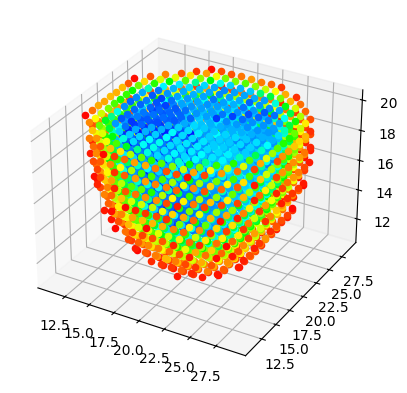

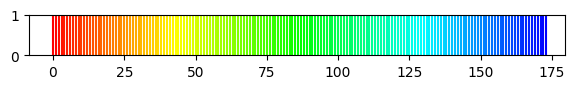

In [9]:
di, dis = get_Duplicates_new(kegel)
plot_data(di, dis, 40,40,20)

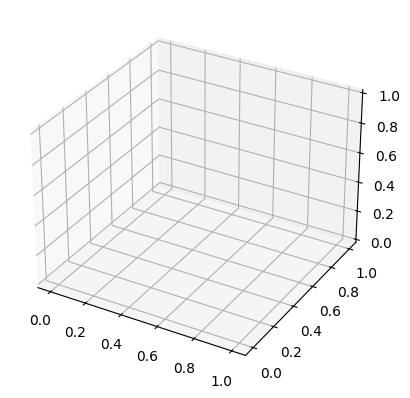

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter(*kegel[0,:,:])

In [1]:
from Test_lib import *
########### Test zufällige winkel
number_of_winkel = 1
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
x_offset, y_offset, z_offset = 20,20,20

kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)
kegel_jit = kegel_meshgrid_repeat(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))
lst_winkel_b = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
lst_winkel_a = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

print(f"Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in {number_of_winkel} zufälligen Richtungen:\n")

# Alte Version 1
# start_time1 = time.time()
# for i in range(number_of_winkel):
#     indizes_des_Kegels_lst1 = []
#     for alpha_w, beta_w in zip(lst_winkel_b[i],lst_winkel_a[i]):
#         indizes_des_Kegels_lst1 += (indizes_des_Kegels(limit=40, Offset_i=20, Offset_j=20, Offset_k=20, limit_r=1, alpha=alpha_w, beta=beta_w))

# duration1 = time.time() - start_time1

# print(duration1)
start_time2 = time.time()

x,y,z = koords_in_kegel_x(range_r=5)
indizes_des_Kegels_lst3 = rotation_kegel(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)
duration2 = time.time() - start_time2
print("Alte Versoin mit Ungenauigkeiten: \t\t", duration2)


# Neue Version 1
start_time2 = time.time()

kegel = koords_in_kegel_alpha_beta_test(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Nicht mit Jit kompatible Version: \t\t",duration2)

# # Neue Version 2
# start_time2 = time.time()
# kegel_ohne = kegel_meshgrid_where(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

# duration2 = time.time() - start_time2
# print("Mit Jit kompatible Version aber ohne jit: \t",duration2)
# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)

# Neue Version 3
start_time2 = time.time()
kegel_jit = kegel_meshgrid_repeat(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)

duration2 = time.time() - start_time2
print("Mesh ohne jit: \t",duration2)



Zeit in Sekunden, für die Berechnung und speicherung von Kegeln in 10000 zufälligen Richtungen:

Alte Versoin mit Ungenauigkeiten: 		 0.029225826263427734
Nicht mit Jit kompatible Version: 		 1.121039628982544
Mit Jit kompatible Version und jit Optimiert: 	 6.5752856731414795
Mesh ohne jit: 	 5.516546010971069


In [5]:
# Neue Version 3
start_time2 = time.time()
kegel_jit = mesh_loop(5, x_offset, y_offset, z_offset, lst_winkel_a, lst_winkel_b)
duration2 = time.time() - start_time2
print("Mit Jit kompatible Version und jit Optimiert: \t",duration2)

Mit Jit kompatible Version und jit Optimiert: 	 1.1754388809204102


In [1]:
from Test_lib import *

In [2]:
number_of_winkel = 10
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 5
x_koord, y_koord, z_koord = 20,20,20

kegel = mesh_loop(range_r, x_koord, y_koord, z_koord, alpha, beta)

(12, 14, 16)
(16, 16, 10)
(12, 16, 12)
(14, 14, 12)
(16, 16, 10)
(8, 16, 16)
(16, 16, 10)
(16, 14, 10)
(10, 16, 14)
(14, 12, 16)


In [4]:
# def mesh_loop(range_r=7, Offset_i=12, Offset_j=12, Offset_k=12, alpha=np.array([]), beta=np.array([])):
# Länge des Kegels
# limit_r = 10
# Offset des Kegels in x-Richtung
# Offset_i, Offset_j, Offset_k = 12,12,12
# alpha: drehwinkel um die j/x-Achse, beta: drehwinkel um die k/z-Achse
limits = get_limits(range_r, alpha, beta)
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
# print((sin_beta.shape[-1],*np.array(koords_in_kegel_x(range_r)).shape))
shape = np.array(koords_in_kegel_x(range_r)).shape
result = np.ones((sin_beta.shape[0],shape[0],shape[1]*2))*np.nan
# print(result.shape)
# result = np.ones((alpha.shape[0], ))
# for i in np.arange((np.min(limit[0]) < 0) * np.floor(np.min(limit[0])), (np.max(limit[0]) > 0) * np.ceil(np.max(limit[0]))) 
# for j in np.arange(np.floor(np.min(limit[1])), np.ceil(np.max(limit[1]))) 
# for k in np.arange(np.floor(np.min(limit[2])), np.ceil(np.max(limit[2]))) 
for i, ca, sa, cb, sb, limit in zip(range(cos_alpha.shape[0]), cos_alpha, sin_alpha, cos_beta, sin_beta, limits):
    # data =[[i+Offset_i,j+Offset_j,k+Offset_k]  
    #     for i in np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
    #     for j in np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1) 
    #     for k in np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1) 
    #     if (0 < (ca*sb*k+sa*sb*j+cb*i))
    #     if ((ca*j-sa*k)**2 + (ca*cb*k-sb*i+sa*cb*j)**2 < (ca*sb*k+sa*sb*j+cb*i)**2)
    #     if (range_r > (ca*sb*k+sa*sb*j+cb*i))
    #     ] 
    x = np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
    y = np.arange(-np.ceil(np.max(np.abs(limit[1])))-1, np.ceil(np.max(np.abs(limit[1])))+1)
    z = np.arange(-np.ceil(np.max(np.abs(limit[2])))-1, np.ceil(np.max(np.abs(limit[2])))+1)
    
    # x = np.arange(-np.ceil(np.max(np.abs(limit[0])))-1, np.ceil(np.max(np.abs(limit[0])))+1) 
    # y = np.arange(np.floor(np.min(limit[1])), np.ceil(np.max(limit[1])))
    # z = np.arange(np.floor(np.min(limit[2])), np.ceil(np.max(limit[2])))

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    print(x_grid.shape)
    mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]
    # print(x_mask.shape)
    data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
    result[i,:,:x_mask.shape[0]] = data

    # result[i,0,:x_mask.shape[0]] = x_mask + Offset_i
    # result[i,1,:x_mask.shape[0]] = y_mask + Offset_j
    # result[i,2,:x_mask.shape[0]] = z_mask + Offset_k
    


(12, 14, 16)
(16, 16, 10)
(12, 16, 12)
(14, 14, 12)
(16, 16, 10)
(8, 16, 16)
(16, 16, 10)
(16, 14, 10)
(10, 16, 14)
(14, 12, 16)


In [5]:
x_grid_ges = np.empty((alpha.shape[0], r_range**3, r_range**3, r_range**3))

array([[[-6., -6., -6., ..., -6., -6., -6.],
        [-5., -5., -5., ..., -5., -5., -5.],
        [-4., -4., -4., ..., -4., -4., -4.],
        ...,
        [ 3.,  3.,  3., ...,  3.,  3.,  3.],
        [ 4.,  4.,  4., ...,  4.,  4.,  4.],
        [ 5.,  5.,  5., ...,  5.,  5.,  5.]],

       [[-6., -6., -6., ..., -6., -6., -6.],
        [-5., -5., -5., ..., -5., -5., -5.],
        [-4., -4., -4., ..., -4., -4., -4.],
        ...,
        [ 3.,  3.,  3., ...,  3.,  3.,  3.],
        [ 4.,  4.,  4., ...,  4.,  4.,  4.],
        [ 5.,  5.,  5., ...,  5.,  5.,  5.]],

       [[-6., -6., -6., ..., -6., -6., -6.],
        [-5., -5., -5., ..., -5., -5., -5.],
        [-4., -4., -4., ..., -4., -4., -4.],
        ...,
        [ 3.,  3.,  3., ...,  3.,  3.,  3.],
        [ 4.,  4.,  4., ...,  4.,  4.,  4.],
        [ 5.,  5.,  5., ...,  5.,  5.,  5.]],

       ...,

       [[-6., -6., -6., ..., -6., -6., -6.],
        [-5., -5., -5., ..., -5., -5., -5.],
        [-4., -4., -4., ..., -4., -4., -4.

# Erneuter versuch an der Rundungsmethode

In [50]:
from Test_lib import *


# def koords_in_kegel_x(range_r = 4):
#     # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 


#     return (x_mask, y_mask, z_mask)


def Kegel_Hybrid1(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), no_dup=False):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]



    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result

In [52]:

number_of_winkel = 100
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 4
x_koord, y_koord, z_koord = 0,0,0

result = Kegel_Hybrid1(x_koord, y_koord, z_koord, range_r, alpha, beta)

In [14]:
dict1, dict2 = get_Duplicates_new(result)
print(result.shape)
dict2

(1, 3, 35)


[('(2.0, 4.0, 1.0)', 1),
 ('(2.0, 3.0, -0.0)', 1),
 ('(4.0, 1.0, -2.0)', 1),
 ('(1.0, 2.0, 0.0)', 1),
 ('(2.0, 1.0, -0.0)', 1),
 ('(2.0, 1.0, -1.0)', 1),
 ('(2.0, 3.0, 1.0)', 1),
 ('(2.0, 2.0, 1.0)', 1),
 ('(3.0, 2.0, 0.0)', 1),
 ('(3.0, 1.0, -0.0)', 1),
 ('(4.0, 0.0, -1.0)', 1),
 ('(1.0, 0.0, 0.0)', 1),
 ('(1.0, 1.0, 1.0)', 1),
 ('(2.0, 1.0, 1.0)', 1),
 ('(2.0, 0.0, 0.0)', 1),
 ('(3.0, 1.0, 1.0)', 1),
 ('(3.0, 0.0, 0.0)', 1),
 ('(4.0, -0.0, -0.0)', 1),
 ('(1.0, 1.0, 2.0)', 1),
 ('(2.0, 0.0, 1.0)', 1),
 ('(2.0, -1.0, 1.0)', 1),
 ('(2.0, 2.0, 3.0)', 1),
 ('(2.0, 1.0, 2.0)', 1),
 ('(3.0, 0.0, 2.0)', 1),
 ('(3.0, -0.0, 1.0)', 1),
 ('(4.0, -1.0, 1.0)', 1),
 ('(2.0, 1.0, 4.0)', 1),
 ('(2.0, 0.0, 3.0)', 1),
 ('(3.0, -0.0, 2.0)', 1),
 ('(3.0, -1.0, 2.0)', 1),
 ('(4.0, -2.0, 1.0)', 1),
 ('(3.0, 2.0, -1.0)', 2),
 ('(2.0, 2.0, 2.0)', 2)]

Doppelte treten auf

In [42]:
result[0,:,:].T

array([[ 1.65717005,  3.73562365,  0.54672059],
       [ 2.14117932,  3.0683829 , -0.01942852],
       [ 2.6251886 ,  2.40114216, -0.58557762],
       [ 3.10919788,  1.73390141, -1.15172673],
       [ 3.59320715,  1.06666067, -1.71787583],
       [ 1.26611646,  2.05234183,  0.42993271],
       [ 1.75012573,  1.38510108, -0.13621639],
       [ 2.23413501,  0.71786034, -0.7023655 ],
       [ 1.65717005,  3.08864258,  1.30922666],
       [ 2.14117932,  2.42140184,  0.74307755],
       [ 2.6251886 ,  1.75416109,  0.17692844],
       [ 3.10919788,  1.08692035, -0.38922066],
       [ 3.59320715,  0.4196796 , -0.95536977],
       [ 0.87506287,  0.36906001,  0.31314484],
       [ 1.26611646,  1.40536076,  1.19243878],
       [ 1.75012573,  0.73812002,  0.62628967],
       [ 2.23413501,  0.07087927,  0.06014057],
       [ 1.65717005,  2.44166152,  2.07173272],
       [ 2.14117932,  1.77442077,  1.50558362],
       [ 2.6251886 ,  1.10718003,  0.93943451],
       [ 3.10919788,  0.43993928,  0.373

In [69]:
result.T.shape

(35, 3, 100)

In [87]:
test = np.array([[np.unique(np.round(unique_array).T,axis=0, return_inverse=True)[1]] for unique_array in result ])
test.shape

(100, 1, 35)

In [101]:
test[0]

array([[ 2, 13, 13, 22, 29,  7, 17, 25,  1, 12, 12, 21, 28,  8,  6, 16,
        24,  0, 11, 11, 20, 27,  5, 15, 23,  4, 10, 15, 19, 26,  3,  9,
        14, 18, 30]], dtype=int64)

In [95]:
for datensatz in result:
    unique_ele, index_counts = np.unique(np.round(datensatz).T,axis=0, return_counts=True)
    duplikat_mask = np.isin(datensatz, unique_ele[index_counts > 1])

In [102]:
index_counts

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
temp_dict = dict(Counter(map(tuple, unique_res[:,:,0])))
sorted_dict = sorted(dict(temp_dict).items(), key = lambda x:x[1])
print(unique_res.shape)
sorted_dict

(35, 3, 100)


[((-0.0, -4.0, -0.0), 1),
 ((-0.0, -4.0, 1.0), 1),
 ((-0.0, -4.0, 2.0), 1),
 ((-0.0, -3.0, -2.0), 1),
 ((-0.0, -3.0, -1.0), 1),
 ((0.0, -2.0, -1.0), 1),
 ((0.0, -2.0, -0.0), 1),
 ((0.0, -2.0, 1.0), 1),
 ((0.0, -1.0, -0.0), 1),
 ((1.0, -3.0, -2.0), 1),
 ((1.0, -3.0, -1.0), 1),
 ((1.0, -2.0, -0.0), 1),
 ((1.0, -2.0, 1.0), 1),
 ((1.0, -2.0, -2.0), 1),
 ((2.0, -1.0, -1.0), 1),
 ((2.0, -1.0, -0.0), 1),
 ((2.0, -1.0, 1.0), 1),
 ((2.0, -2.0, -2.0), 1),
 ((2.0, -2.0, -1.0), 1),
 ((2.0, -2.0, -0.0), 1),
 ((2.0, -2.0, 1.0), 1),
 ((2.0, -2.0, 2.0), 1),
 ((3.0, -2.0, -1.0), 1),
 ((3.0, -2.0, -0.0), 1),
 ((3.0, -2.0, 1.0), 1),
 ((3.0, -2.0, 2.0), 1),
 ((3.0, -1.0, -2.0), 1),
 ((1.0, -3.0, -0.0), 2),
 ((1.0, -3.0, 1.0), 2),
 ((1.0, -3.0, 2.0), 2),
 ((1.0, -2.0, -1.0), 2)]

In [55]:
import numpy as np

def entferne_duplikate(array):
    reshaped_array = array.reshape(100, -1)
    unique_sets, inverse_indices = np.unique(reshaped_array, axis=1, return_inverse=True)
    counts = np.bincount(inverse_indices)
    print(reshaped_array.shape, counts.shape)
    duplicates = unique_sets[:, counts[inverse_indices] > 1]
    
    for i in range(100):
        for j in range(3):
            duplikate = np.isin(array[i, j], duplicates[i])
            array[i, j, duplikate] = np.nan
    
    return array

# Verwende die Funktion mit deinem Array A
A = entferne_duplikate(np.rint(result))

(100, 105) (79,)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 79 but corresponding boolean dimension is 105

In [ ]:
import numpy as np

def nächste_nachbarn(koordinate):
    x, y, z = koordinate.astype(int)
    nachbarn = np.array(list(np.ndindex((3, 3, 3)))) + [x-1, y-1, z-1]
    nachbarn = nachbarn[np.any(nachbarn != koordinate, axis=1)]
    return nachbarn.astype(int)

def finde_nächste_nachbarn(koordinaten):
    ergebnisse = {}
    for koordinate in koordinaten:
        ergebnisse[tuple(koordinate)] = nächste_nachbarn(koordinate)
    return ergebnisse

koordinaten = np.array([(1.5, 1.5, 1.5), (3.2, 2.8, 5.6)])  # Hier deine Koordinaten einfügen
ergebnisse = finde_nächste_nachbarn(koordinaten)

for koordinate, nachbarn in ergebnisse.items():
    print(f"Die nächsten Nachbarn von {koordinate} sind: {nachbarn}")


### Unique etc dauert zu lange, da es nicht auf das ganze array auf einmal angewand werden kann

# Optimierung des bisher schnlellsten codes

In [ ]:
def koords_in_kegel_alpha_beta_test(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
# Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # print(cos_alpha,sin_alpha,cos_beta,sin_beta)
    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3
    
    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result


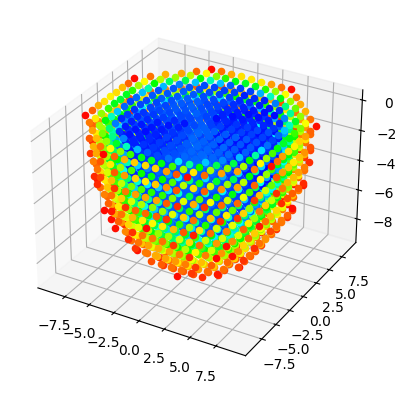

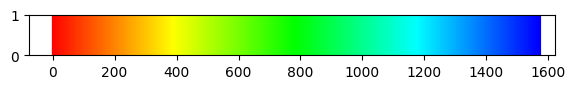

In [104]:
number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

result = koords_in_kegel_alpha_beta_test(range_r, x_koord, y_koord, z_koord, alpha, beta)
plot_data(*get_Duplicates_new(result), 10, 10, 0)

In [ ]:
    for i, ca, sa, cb, sb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta):
        # print(cos_alpha[i], sin_alpha[i], cos_beta[i], sin_beta[i])
        # print(ca,sa,cb,sb)
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (ca*cb*z_grid-sb*x_grid+sa*cb*y_grid)**2 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)**2) & (0 < (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)) & (range_r > (ca*sb*z_grid+sa*sb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data

In [ ]:
ca, sa, cb, sb, cacb, sacb, casb, sasb = 0

(((ca*y_grid-sa*z_grid)**2 + (cacb*z_grid-sb*x_grid+sacb*y_grid)**2 < (casb*z_grid+sasb*y_grid+cb*x_grid)**2) & (0 < (casb*z_grid+sasb*y_grid+cb*x_grid)) & (range_r > (casb*z_grid+sasb*y_grid+cb*x_grid)))

In [105]:
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)
cos_beta = np.cos(beta)
sin_beta = np.sin(beta)
cos_alpha_cos_beta = cos_alpha*cos_beta
sin_alpha_cos_beta = sin_alpha*cos_beta
cos_alpha_sin_beta = cos_alpha*sin_beta
sin_alpha_sin_beta = sin_alpha*sin_beta

In [6]:
def koords_in_kegel_alpha_beta_test1(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    cos_alpha_cos_beta = cos_alpha*cos_beta
    sin_alpha_cos_beta = sin_alpha*cos_beta
    cos_alpha_sin_beta = cos_alpha*sin_beta
    sin_alpha_sin_beta = sin_alpha*sin_beta

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan

    for i, ca, sa, cb, sb, cacb, sacb, casb, sasb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta, cos_alpha_cos_beta, sin_alpha_cos_beta, cos_alpha_sin_beta, sin_alpha_sin_beta):
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (cacb*z_grid-sb*x_grid+sacb*y_grid)**2 < (casb*z_grid+sasb*y_grid+cb*x_grid)**2) & (0 < (casb*z_grid+sasb*y_grid+cb*x_grid)) & (range_r > (casb*z_grid+sasb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result


In [7]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

result = koords_in_kegel_alpha_beta_test1(range_r, x_koord, y_koord, z_koord, alpha, beta)


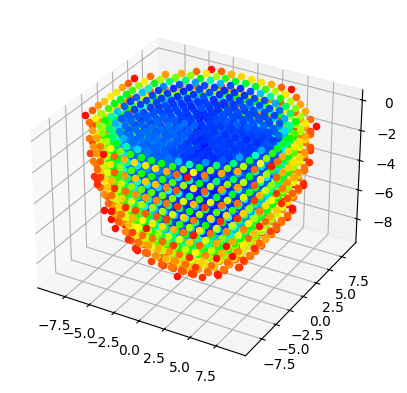

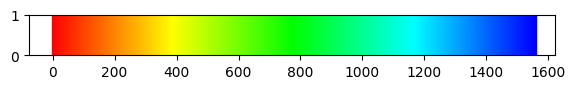

In [8]:
plot_data(*get_Duplicates_new(result), 10, 10, 0)

In [125]:
number_of_winkel = 100
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

In [129]:
start_time2 = time.time()
for i in range(number_of_winkel):
    result = koords_in_kegel_alpha_beta_test(range_r, x_koord, y_koord, z_koord, alpha, beta)

print("Mit Jit kompatible Version und jit Optimiert: \t", (time.time() - start_time2)/number_of_winkel)



start_time2 = time.time()
for i in range(number_of_winkel):
    result = koords_in_kegel_alpha_beta_test1(range_r, x_koord, y_koord, z_koord, alpha, beta)

print("Mit Jit kompatible Version und jit Optimiert: \t", (time.time() - start_time2)/number_of_winkel)

Mit Jit kompatible Version und jit Optimiert: 	 0.21858505821228028
Mit Jit kompatible Version und jit Optimiert: 	 0.21430851006507873


### minimale Verbesserung

In [1]:
from Test_lib import *


# def koords_in_kegel_x(range_r = 4):
#     # Generiert die Indizes innerhalb eines Kegels entlang der x-Achse mit länge range_r 


#     return (x_mask, y_mask, z_mask)


def Kegel_matrix(x_koord = 0, y_koord = 0, z_koord = 0, range_r = 4, alpha = np.array([]), beta = np.array([]), no_dup=False):
    # Rotation zuerst um die y-Achse winkel Beta und anschließend um die x-Achse winkel Alpha

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

    # Mask für innerhalb des Zylinders
    mask = ((z_grid**2 + y_grid**2) < x_grid**2) & (0 < x_grid) & (range_r > x_grid)
    # Filtere Punkte innerhalb des Kegels
    x_mask = x_grid[mask]
    y_mask = y_grid[mask]
    z_mask = z_grid[mask]

    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Erzeuge 3D-Arrays für x, y und z Koordinaten
    rotation_matrix = np.empty((len(alpha), 3, 3))

    # Fülle die Rotationsmatrizen für alle Winkel gleichzeitig
    rotation_matrix[:, 0, 0] = cos_beta.ravel()
    rotation_matrix[:, 0, 1] = np.zeros_like(cos_beta).ravel()
    rotation_matrix[:, 0, 2] = sin_beta.ravel()

    rotation_matrix[:, 1, 0] = (sin_alpha*sin_beta).ravel()
    rotation_matrix[:, 1, 1] = cos_alpha.ravel()
    rotation_matrix[:, 1, 2] = (-sin_alpha*cos_beta).ravel()

    rotation_matrix[:, 2, 0] = (-cos_alpha*sin_beta).ravel()
    rotation_matrix[:, 2, 1] = sin_alpha.ravel()
    rotation_matrix[:, 2, 2] = (cos_alpha*cos_beta).ravel()
    

    # Dimension der x,y,z anheben
    x_mask_3d = np.tile(x_mask.ravel(), (len(alpha.T), 1))
    y_mask_3d = np.tile(y_mask.ravel(), (len(alpha.T), 1))
    z_mask_3d = np.tile(z_mask.ravel(), (len(alpha.T), 1))

    # Wende die Rotationsmatrix auf die x- und y-Koordinaten an
    result = np.dot(rotation_matrix, np.vstack([x_mask_3d, y_mask_3d, z_mask_3d]))
    # x = result[:,0,:]
    # y = result[:,1,:]
    # z = result[:,2,:]

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord


    # Falls gewollt werden hier die doppelten Punkte die durch das Runden auftreten herausgefilert und mit den Koordinaten 0,0,0 erstetzt
    return result


In [2]:
number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

result = Kegel_matrix(x_koord, y_koord, z_koord, range_r, alpha, beta)
round = np.round(result)
ceil = np.ceil(result)
trunc = np.trunc(result)
floor = np.floor(result)

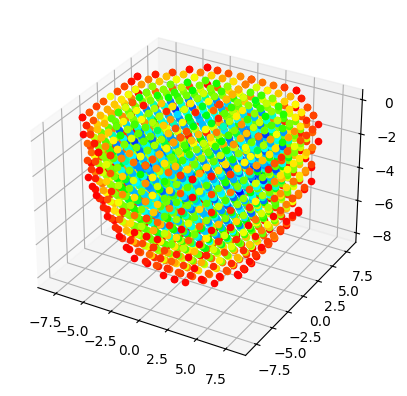

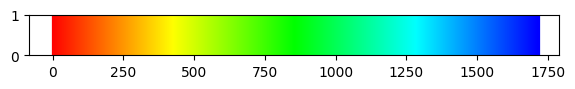

In [10]:
plot_data(*get_Duplicates_new(round), 20,20,0)

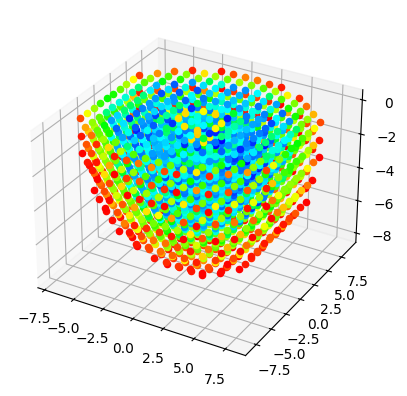

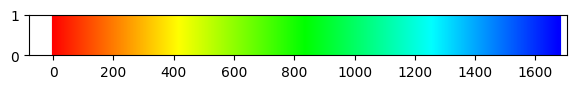

In [14]:
plot_data(*get_Duplicates_new(ceil), 20,20,0)

In [4]:
dict1, dict2 = get_Duplicates_new(trunc)

In [13]:
list(dict2)[-2]

('(4.0, -0.0, -0.0)', 3047)

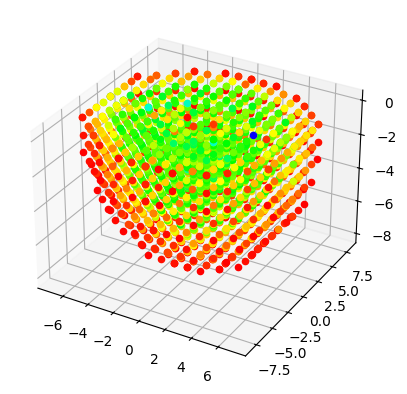

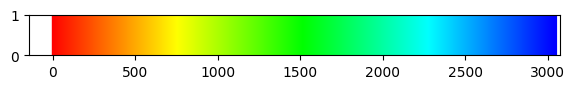

In [3]:
plot_data(*get_Duplicates_new(trunc), 20,20,0)

In [16]:
dict1, dict2 = get_Duplicates_new(trunc)

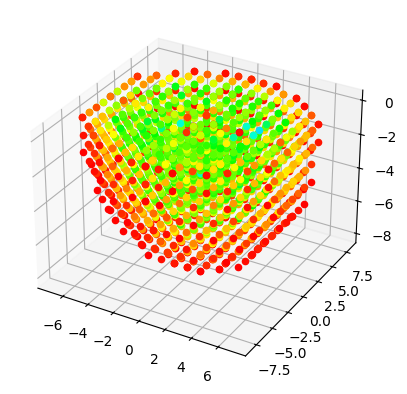

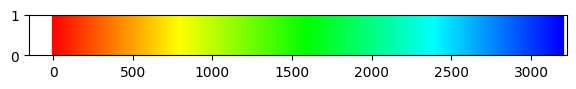

In [15]:
plot_data(*get_Duplicates_new(trunc), 20,20,0)

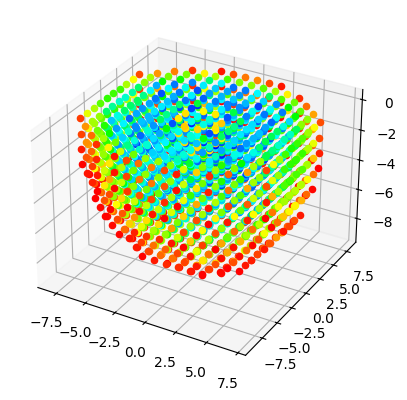

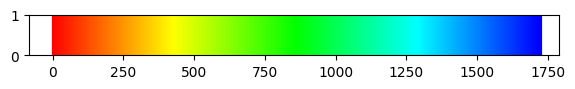

In [3]:
plot_data(*get_Duplicates_new(floor), 20,20,0)

In [4]:
floor_unique = np.copy(floor)*np.nan
for i,res in enumerate(floor):
    uniques = np.unique(res.T,axis=0).T
    floor_unique[i,:,:uniques.shape[-1]] = uniques

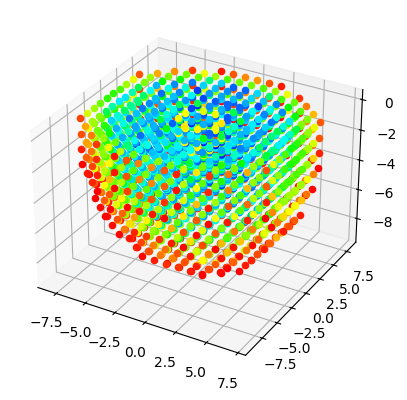

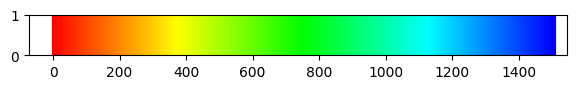

In [5]:
plot_data(*get_Duplicates_new(floor_unique), 20,20,0)

### Keine ausreichende Verbesserung

Langsame Methoden müssen ausreichen

# Neuer Ansatz?

"Datenbank generieren":

Kegel mit winkeln abspeichern, und in zukünfitgen Druchläufen darauf zurückgreifen.

In [7]:
def koords_in_kegel_alpha_beta_test1(range_r = 4, x_koord = 0, y_koord = 0, z_koord = 0, alpha = np.array([]), beta = np.array([])):
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    cos_alpha_cos_beta = cos_alpha*cos_beta
    sin_alpha_cos_beta = sin_alpha*cos_beta
    cos_alpha_sin_beta = cos_alpha*sin_beta
    sin_alpha_sin_beta = sin_alpha*sin_beta

    x = np.linspace(-range_r*2, range_r*2, range_r*4+1)
    y = np.copy(x)
    z = np.copy(x)
    length = (2*range_r)**3

    # Erstelle das Gitter für x, y und z
    x_grid, y_grid, z_grid = np.meshgrid(x, y, z)
    # test_x = np.copy(x_grid)
    result = np.empty((len(cos_alpha), 3, length)) * np.nan

    for i, ca, sa, cb, sb, cacb, sacb, casb, sasb in zip(range(len(cos_alpha)), cos_alpha, sin_alpha, cos_beta, sin_beta, cos_alpha_cos_beta, sin_alpha_cos_beta, cos_alpha_sin_beta, sin_alpha_sin_beta):
        # erst x achse dann y achse
        mask = (((ca*y_grid-sa*z_grid)**2 + (cacb*z_grid-sb*x_grid+sacb*y_grid)**2 < (casb*z_grid+sasb*y_grid+cb*x_grid)**2) & (0 < (casb*z_grid+sasb*y_grid+cb*x_grid)) & (range_r > (casb*z_grid+sasb*y_grid+cb*x_grid)))
        # x,y,z werte mit der spezifischen Maske auf die Kegel zuschneiden
        x_mask = x_grid[mask]
        y_mask = y_grid[mask]
        z_mask = z_grid[mask]
        data = np.array([x_mask + x_koord, y_mask + y_koord, z_mask + z_koord])
        result[i,:,:np.shape(data)[1]] = data
    return result


In [4]:
from Test_lib import *

In [8]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
range_r = 7
x_koord, y_koord, z_koord = 0,0,0

result = koords_in_kegel_alpha_beta_test1(range_r, x_koord, y_koord, z_koord, alpha, beta)

In [11]:
print(alpha.shape, beta.shape)

(1000, 1) (1000, 1)


In [17]:
chache_Alpha_Beta = np.concatenate((alpha, beta), axis=1)
chache_Alpha_Beta.shape

(1000, 2)

In [24]:
test = np.round(chache_Alpha_Beta)
mask_alpha_beta = (test[:,0] == 4) & (test[:,1] == 2)
np.where(mask_alpha_beta)

(array([  0,   4,  32,  59,  80,  98, 107, 133, 148, 154, 163, 164, 185,
        188, 235, 237, 266, 297, 302, 314, 315, 332, 362, 445, 457, 463,
        470, 495, 514, 525, 533, 543, 563, 569, 573, 604, 641, 657, 669,
        683, 710, 738, 773, 786, 800, 803, 813, 839, 847, 886, 904, 914,
        933, 947, 954, 959, 963, 967, 968, 991, 993], dtype=int64),)

In [26]:
result[mask_alpha_beta,0,0]

array([-3., -3., -1., -1., -2., -2., -1., -2., -3., -4., -3., -2.,  1.,
        2., -1., -1.,  0., -3., -4., -2., -1., -2.,  0., -3., -2., -3.,
       -4., -2., -5.,  1., -4., -2., -3., -2., -3., -3., -1., -5., -3.,
       -1., -3.,  1., -2.,  0., -2., -2., -3., -4., -1., -3., -1., -2.,
       -1., -1., -5.,  0., -2., -4., -3., -2., -3.])

In [34]:
alpha1 = alpha[~mask_alpha_beta]

In [36]:
alpha1.shape

(939, 1)

In [37]:
np.sum(mask_alpha_beta)

61

In [44]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta1 = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha1 = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

In [39]:
chache_Alpha_Beta = np.concatenate((alpha, beta), axis=1)
chache_Alpha_Beta.shape

(1000, 2)

In [45]:
chache_Alpha_Beta1 = np.concatenate((alpha1, beta1), axis=1)
chache_Alpha_Beta1.shape

(1000, 2)

In [51]:
test = np.isin(np.round(chache_Alpha_Beta,2),np.round(chache_Alpha_Beta1,2))
test.shape

(1000, 2)

In [50]:
np.sum(test)

1878

In [53]:
test_results = test[:,0] * test[:,1]
test_results.shape

(1000,)

In [54]:
np.sum(test_results)

880

In [55]:
round0 = np.round(chache_Alpha_Beta,2)
round1 = np.round(chache_Alpha_Beta1,2)


In [56]:
round0[test_results,:]

array([[4.39, 1.74],
       [0.81, 2.3 ],
       [5.96, 1.19],
       ...,
       [4.37, 1.01],
       [1.55, 0.72],
       [4.4 , 3.07]])

In [57]:
round1[test_results,:]

array([[3.  , 2.57],
       [1.1 , 0.76],
       [0.18, 0.42],
       ...,
       [0.83, 0.34],
       [5.44, 0.76],
       [3.9 , 1.3 ]])

In [1]:
from Test_lib import *
def Chache_Check(chache_aplha_beta, alpha, beta, round_int=3):
    in_question = np.concatenate((alpha, beta), axis=1)
    mask = np.isin(np.round(in_question,round_int),np.round(chache_aplha_beta,round_int))
    mask_results = mask[:,0] * mask[:,1]
    not_in_cache = in_question[mask_results,:]
    in_cache = in_question[~mask_results,:]

    return not_in_cache, in_cache

In [2]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta1 = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha1 = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
cache = np.concatenate((alpha1, beta1), axis=1)
range_r = 4
x_koord, y_koord, z_koord = 0,0,0
result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)

In [3]:
alpha_beta_in_chache, alpha_beta_out_chache = Chache_Check(cache, alpha, beta)

In [4]:
print(np.array(alpha_beta_in_chache).shape, np.array(alpha_beta_out_chache).shape)

(124, 2) (876, 2)


## Es kann herausgefunden werden wenn etwas im Chache ist, jetzt muss der Ort davon herausgefunden werden

In [5]:
alpha_beta_out_chache[0,:].shape

(2,)

In [6]:
import numpy as np

# Annahme: Dein Array "Cache" hat die Shape (m, 2) und deine gesuchten Elemente haben die Shape (n,).
# Hier sind nur Platzhalter, du solltest sie mit deinen tatsächlichen Daten ersetzen.
Cache = np.sort(np.array([[1, 2], [3, 4], [5, 6], [7, 8], [5, 6]]))
gesuchte_elemente = np.sort(np.array([[5, 6],[3, 4]]))

# Finde die Positionen der gesuchten Elemente im Cache.
positionen = np.where((Cache[:, None, :] == gesuchte_elemente).all(axis=2))

# Gib die gefundenen Positionen aus.
print("Gefundene Positionen:")
print(positionen)


Gefundene Positionen:
(array([1, 2, 4], dtype=int64), array([1, 0, 0], dtype=int64))


In [7]:
Cache.shape

(5, 2)

In [8]:
np.sort(Cache, 0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [5, 6],
       [7, 8]])

In [9]:
np.sort(gesuchte_elemente, 0)

array([[3, 4],
       [5, 6]])

In [10]:
Cache.shape

(5, 2)

In [11]:
positionen[0]

array([1, 2, 4], dtype=int64)

Es ist wichtig das im Cache keine Duplicate enthalten sind.

In [12]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta1 = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha1 = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
cache = np.concatenate((alpha1, beta1), axis=1)
range_r = 4
x_koord, y_koord, z_koord = 0,0,0
result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)

In [15]:
def fill_Cache(Cache_index=None, Cache_value=None, alpha=None, beta=None, result=None):
    if Cache_index is None:
        Cache_index = np.concatenate((alpha, beta), axis=1)
        mask = np.unique(Cache_index, True , axis=0)[1]

In [16]:
Cache_index = None
if Cache_index is None:
    Cache_index = np.concatenate((alpha, beta), axis=1)
    mask_sort = np.argsort(Cache_index, axis = 0)
    mask = np.unique(np.round(Cache_index, 3), True , axis=0)[1]

In [17]:
Cache_index.shape

(1000, 2)

In [64]:
Cache_value = result[mask,:,:] 

In [20]:
sorted = Cache_index[mask_sort]
sorted1 = np.take_along_axis(Cache_index, mask_sort, axis=0)
print(sorted.shape, sorted1.shape)

(1000, 2, 2) (1000, 2)


In [22]:
positionen = np.where((sorted1[:, None, :] == Cache_index).all(axis=2))

In [30]:
Cache_index = None
if Cache_index is None:
    raw_alpha_beta = np.concatenate((alpha, beta), axis=1)
    mask = np.unique(np.round(raw_alpha_beta, 3), True , axis=0)[1]
    Cache_value = result[mask,:,:]
    Cache_index = raw_alpha_beta[mask]
    
    mask_sort = np.argsort(Cache_index, axis = 0)
    Cache_index_sorted = np.take_along_axis(Cache_index, mask_sort, axis=0)
    Cache_value_sorted = np.take_along_axis(Cache_value, mask_sort, axis=0)

ValueError: `indices` and `arr` must have the same number of dimensions

In [29]:
print(Cache_index_sorted.shape, Cache_value.shape)

(1000, 2) (1000, 3, 512)


In [31]:
import numpy as np

# Annahme: Du hast zwei Arrays mit der Shape (4, 2).
erstes_array = np.array([
    [4, 8],
    [2, 6],
    [6, 7],
    [1, 5]
])

zweites_array = np.array([
    [8, 3],
    [5, 2],
    [9, 1],
    [3, 4]
])

# Verwende np.argsort, um die Indizes für die Sortierung zu erhalten.
sortierte_indizes = np.argsort(erstes_array[:, 0])

# Verwende die sortierten Indizes, um beide Arrays entlang der axis=0 zu sortieren.
sortiertes_erstes_array = erstes_array[sortierte_indizes]
sortiertes_zweites_array = zweites_array[sortierte_indizes]

# Gib die sortierten Arrays aus.
print("Sortiertes erstes Array:")
print(sortiertes_erstes_array)

print("Sortiertes zweites Array:")
print(sortiertes_zweites_array)

Sortiertes erstes Array:
[[1 5]
 [2 6]
 [4 8]
 [6 7]]
Sortiertes zweites Array:
[[3 4]
 [5 2]
 [8 3]
 [9 1]]


In [39]:
Cache_index = None
if Cache_index is None:
    # Erstellen des Caches mit den ersten Einträgen
    raw_alpha_beta = np.concatenate((alpha, beta), axis=1)
    # Cache Runden damit gleiche winkel auftreten können
    mask = np.unique(np.round(raw_alpha_beta, 3), True , axis=0)[1]
    Cache_value = result[mask,:,:]
    Cache_index = raw_alpha_beta[mask]
    # Sortieren des Caches 
    mask_sort = np.argsort(Cache_index[:,0])
    Cache_index_sorted = Cache_index[mask_sort,:]
    Cache_value_sorted = Cache_value[mask_sort,:,:]

In [40]:
print(Cache_index_sorted.shape, Cache_value_sorted.shape)

(749, 2) (749, 3, 512)


In [1]:
from Test_lib import *

def fill_Cache(Cache_index=None, Cache_value=None, alpha=None, beta=None, result=None):
    if Cache_index is None:
        # Erstellen des Caches mit den ersten Einträgen
        raw_alpha_beta = np.concatenate((alpha, beta), axis=1)
        # Cache Runden damit gleiche winkel auftreten können
        mask = np.unique(np.round(raw_alpha_beta, 3), True , axis=0)[1]
        Cache_value = result[mask,:,:]
        Cache_index = raw_alpha_beta[mask]
        # Sortieren des Caches 
        mask_sort = np.argsort(Cache_index[:,0])
        Cache_index_sorted = Cache_index[mask_sort,:]
        Cache_value_sorted = Cache_value[mask_sort,:,:]

    else:
        raw_alpha_beta = np.concatenate((alpha, beta), axis=1)
        mask = np.unique(np.round(raw_alpha_beta, 3), True , axis=0)[1]
        pot_index = raw_alpha_beta[mask]
        pot_val = result[mask,:,:]
        mask_dup = np.isin(pot_index[:,0], Cache_index[:,0]) * np.isin(pot_index[:,1], Cache_index[:,1])
        new_index = pot_index[mask_dup]
        new_val = pot_val[mask_dup,:,:]
        mask_sort = np.argsort(new_index[:,0])
        new_index_sorted = new_index[mask_sort,:]
        new_val_sorted = new_val[mask_sort,:,:]
        new_cache_index = np.concatenate((Cache_index, new_index_sorted), axis=0)
        new_cache_value = np.concatenate((Cache_value, new_val_sorted), axis=0)
        mask_sort_final = np.argsort(new_cache_index[:,0])
        Cache_index_sorted = new_cache_index[mask_sort_final,:]
        Cache_value_sorted = new_cache_value[mask_sort_final,:,:]

    return Cache_index_sorted, Cache_value_sorted         
    

In [2]:
number_of_winkel = 1000
range_r = 4
x_koord, y_koord, z_koord = 0,0,0

rng = np.random.default_rng(random.randint(100000,10000000000))
beta1 = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha1 = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
cache = np.concatenate((alpha1, beta1), axis=1)

result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)
result1 = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha1, beta1)

In [3]:
Cache_index_sorted1, Cache_value_sorted1 = fill_Cache(alpha=alpha, beta=beta, result=result)

In [4]:
Cache_index_sorted1.shape, Cache_value_sorted1.shape

((1000, 2), (1000, 3, 512))

In [9]:
Cache_index_sorted1, Cache_value_sorted1 = fill_Cache(Cache_index_sorted1,Cache_value_sorted1, alpha=alpha1, beta=beta1, result=result1)

In [2]:
from Test_lib import *

number_of_winkel = 1000
range_r = 4
x_koord, y_koord, z_koord = 0,0,0
Cache_index1, Cache_value1 = None, None
for o in range(15):
#     time.sleep(0.2)
    rng = np.random.default_rng(random.randint(100000,10000000000))
    beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
    alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
    result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)
    Cache_index1, Cache_value1 = fill_Cache(Cache_index1,Cache_value1,alpha=alpha, beta=beta, result=result, round_int=1)
    print(Cache_index1.shape, Cache_value1.shape, alpha[0])

(731, 2) (731, 3, 512) [2.04598367]
(0, 2)
(731, 2) (731, 3, 512) [0.64194537]
(0, 2)
(731, 2) (731, 3, 512) [4.11598888]
(0, 2)
(731, 2) (731, 3, 512) [2.55391027]
(0, 2)
(731, 2) (731, 3, 512) [2.90169932]
(0, 2)
(731, 2) (731, 3, 512) [1.48995356]
(0, 2)
(731, 2) (731, 3, 512) [0.36287243]
(0, 2)
(731, 2) (731, 3, 512) [0.9453329]
(0, 2)
(731, 2) (731, 3, 512) [2.55282764]
(0, 2)
(731, 2) (731, 3, 512) [5.58462898]
(0, 2)
(731, 2) (731, 3, 512) [0.22262977]
(0, 2)
(731, 2) (731, 3, 512) [4.56415983]
(0, 2)
(731, 2) (731, 3, 512) [2.59478277]
(0, 2)
(731, 2) (731, 3, 512) [4.83436064]
(0, 2)
(731, 2) (731, 3, 512) [0.1755116]


In [4]:
# Erstellen des Caches mit den ersten Einträgen
raw_alpha_beta = np.round(np.concatenate((alpha, beta), axis=1), round_int)
# Cache Runden damit gleiche winkel auftreten können
mask = np.unique(raw_alpha_beta, True , axis=0)[1]
Cache_value = result[mask,:,:]
Cache_index = raw_alpha_beta[mask]
# Sortieren des Caches 
mask_sort = np.argsort(Cache_index[:,0])
Cache_index_sorted = Cache_index[mask_sort,:]
Cache_value_sorted = Cache_value[mask_sort,:,:]

In [5]:
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)

In [6]:
round_int = 2
raw_alpha_beta = np.round(np.concatenate((alpha, beta), axis=1), round_int)
mask = np.unique(raw_alpha_beta, True , axis=0)[1]
pot_index = raw_alpha_beta[mask]
pot_val = result[mask,:,:]
mask_dup = np.isin(pot_index[:,0], Cache_index[:,0], invert=True) * np.isin(pot_index[:,1], Cache_index[:,1], invert=True)


In [7]:
mask_dup

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [3]:
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)
Cache_index1, Cache_value1 = fill_Cache(Cache_index1,Cache_value1,alpha=alpha, beta=beta, result=result, round_int=1)

(0, 2)


In [39]:
from Test_lib import *
round_int = 3
number_of_winkel = 1000
range_r = 4
x_koord, y_koord, z_koord = 0,0,0
Cache_index1, Cache_value1 = None, None

In [57]:
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
result = koords_in_kegel_cache(range_r, x_koord, y_koord, z_koord, alpha, beta)
Cache_index1, Cache_value1 = fill_Cache(Cache_index1,Cache_value1,alpha=alpha, beta=beta, result=result, round_int=3)

(61, 2)


In [37]:
Cache_index1.shape

(3379, 2)

In [ ]:
def read_Cache(Chache_index, Cache_value, alpha_in_cache, beta_in_cache):
    # Runden
    raw_alpha_beta = np.round(np.concatenate((alpha_in_cache, beta_in_cache), axis=1), round_int)


In [59]:
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

raw_alpha_beta = np.round(np.concatenate((alpha, beta), axis=1), round_int)

In [61]:
indices = np.where((Cache_index1[:, None] == raw_alpha_beta).all(-1).any(-1))[0]

In [62]:
indices

array([], dtype=int64)